<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 4: West Nile Virus Prediction — Exploratory Data Analysis

## Background

The West Nile Virus (WNV) first appeared in the Americas in 1999, and has since become the **leading** mosquito-borne disease in the country ([source](https://www.nejm.org/doi/full/10.1056/NEJM200106143442401)). It is a virus transmitted to humans by mosquitoes that feed on infected birds. Around 20% of people who become infected with the virus develop symptoms ranging from fever, and headaches, to serious neurological illnesses that can result in death. The first WNV case was identified in Illinois in September 2001 when laboratory tests confirmed its presence in two crows found dead in the Chicago area. By the end of 2002, Illinois accounted for more human cases and deaths than any other state ([source](https://dph.illinois.gov/topics-services/diseases-and-conditions/west-nile-virus)). Since there is no vaccine or medication to prevent or treat WNV in people, the most effective way to prevent this virus is to reduce the number of mosquitoes and to take precautions to avoid mosquito bites ([source](https://www.cdc.gov/westnile/index.html#:~:text=There%20are%20no%20vaccines%20to,a%20fever%20and%20other%20symptoms.)). 

Following the outbreak of WNV in Chicago, the City of Chicago and Chicago Department of Public Health (CDPH) put in place a comprehensive surveillance and control program to trap and test mosquitos for WNV. This program is still in place today.

## Problem Statement

In light of the potential outbreak of West Nile Virus (WNV) in Chicago, the CDPH has asked its data scientist team to develop a predictive model based on past data on weather conditions and virus detection locations.

Given the use of public funds to finance the spraying of pesticide in order to  reduce the number of WNV cases, coupled with the potentially high cost of spraying pesticide over large areas, it is imperative for this project to bring focus to where and when pesticides should be sprayed that would effectively combat the WNV problem.

A model that accurately predicts the outbreak of the virus using information about the locations of mosquito traps and weather information ensures that the targeted spraying will be informed and well-justified.

Our definition of a good model is one that is able to accurately predict the presence of the virus, i.e. minimum false negatives and false positives. The ROC-AUC score will be our primary evaluation metric.

## Methodology

The workflow of this project is as follows:
  1. Data cleaning:  
- `train.csv` - Duplicate records are removed from the dataset, with number of mosquitoes observed summed up by date observed, trap id, and species of mosquito observed.  
- `weather.csv` - Observations with trace amounts of precipitation are replaced with 0. Wetbulb is manually calculated for missing observations. Missing Heat and Cool values are filled in using previously observed values
Columns of data are converted to the correct data type
  2. Pre-processing:
- Weather data are joined to the train data based on date of observation
Numerical Data of this combined dataset is standard scaled
- Tavg, DewPoint, and PrecipTotal data are lagged by 7 days
- Train/test split is done
<br><br>
(**_The following sections continue in Notebook 2_**)


  3. Modelling:
- Hyperparameter tuning is done alongside Synthetic Minority Oversampling Technique (SMOTE)  
- The models ran are:
      - Logistic Regression (with and without hyperparameter tuning)
      - Random Forest
      - AdaBoost
      - Gradient Boost
      - XGBoost
      - Support Vector Machine
      - K-Nearest Neighbours
- Feature Importance Analysis
- Prediction on Test Dataset
- ROC AUC Score Comparison
  4. Cost Benefit Analysis:
- Cost
- Benefit
- Analysis
  5. Recommendations
  6. Limitations
  7. Future Plans
  8. Conclusions

**Datasets:**
 - `spray.csv`: Spray dataset
 - `test.csv`: Test dataset
 - `train.csv`: Train dataset
 - `weather.csv`: Weather dataset
<br>

**Brief Description of Datasets selected:** 
- Every year from late-May to early-October, public health workers in Chicago setup mosquito traps scattered across the city. Every week from Monday through Wednesday, these traps collect mosquitos, and the mosquitos are tested for the presence of [*West Nile virus*](http://www.cdc.gov/westnile/) before the end of the week. The test results include the number of mosquitos, the mosquitos species, and whether or not West Nile virus is present in the cohort. 

**Main Dataset**
- These test results are organized in such a way that when the number of mosquitos exceed 50, they are split into another record (another row in the dataset), such that the number of mosquitos are capped at 50. 
- The location of the traps are described by the block number and street name. For your convenience, we have mapped these attributes into Longitude and Latitude in the dataset. Please note that these are derived locations. For example, Block=79, and Street= "W FOSTER AVE" gives us an approximate address of "7900 W FOSTER AVE, Chicago, IL", which translates to [*(41.974089,-87.824812) on the map*](https://www.google.com/maps/place/41%C2%B058'26.7%22N+87%C2%B049'29.3%22W/@41.9749544,-87.8071845,12z/).
- Some traps are "satellite traps". These are traps that are set up near (usually within 6 blocks) an established trap to enhance surveillance efforts. Satellite traps are postfixed with letters. For example, T220A is a satellite trap to T220. 
- Please note that not all the locations are tested at all times. Also, records exist only when a particular species of mosquitos is found at a certain trap at a certain time. In the test set, we ask you for all combinations/permutations of possible predictions and are only scoring the observed ones.

**Spray Data**
- The City of Chicago also does spraying to kill mosquitos. You are given the GIS data for their spray efforts in 2011 and 2013. Spraying can reduce the number of mosquitos in the area, and therefore might eliminate the appearance of West Nile virus.

<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/4366/media/all_loc_trap.png" style="float: centre; margin: 20px; height: 570px; width: 650px">

**Weather Data**
- It is believed that hot and dry conditions are more favorable for West Nile virus than cold and wet. We provide you with the dataset from [*NOAA*](http://cdo.ncdc.noaa.gov/qclcd/QCLCD?prior=N) of the weather conditions of 2007 to 2014, during the months of the tests. 
  - Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level
  - Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level

**Map Data**
- The map files **mapdata_copyright_openstreetmap_contributors.rds** and **mapdata_copyright_openstreetmap_contributors.txt** are from Open Streetmap and are primarily provided for use in visualizations (but you are allowed to use them in your models if you wish).
- Here's [*an example*](https://www.kaggle.com/code/jbobtaylor/show-map-image-in-python/script) using **mapdata_copyright_openstreetmap_contributors.txt**.

**File Descriptions**
- **train.csv**, **test.csv** - the training and test set of the main dataset. The training set consists of data from 2007, 2009, 2011, and 2013, while in the test set you are requested to predict the test results for 2008, 2010, 2012, and 2014.
 - Id: the id of the record
 - Date: date that the WNV test is performed
 - Address: approximate address of the location of trap. This is used to send to the GeoCoder.
 - Species: the species of mosquitos
 - Block: block number of address
 - Street: street name
 - Trap: Id of the trap
 - AddressNumberAndStreet: approximate address returned from GeoCoder
 - Latitude, Longitude: Latitude and Longitude returned from GeoCoder
 - AddressAccuracy: accuracy returned from GeoCoder
 - NumMosquitos: number of mosquitoes caught in this trap
 - WnvPresent: whether West Nile Virus was present in these mosquitos. 1 means WNV is present, and 0 means not present.
- **spray.csv** - GIS data of spraying efforts in 2011 and 2013
 - Date, Time: the date and time of the spray
 - Latitude, Longitude: the Latitude and Longitude of the spray
- **weather.csv** - weather data from 2007 to 2014. Column descriptions in noaa_weather_qclcd_documentation.pdf.

## Import Libraries, Datasets and Data Cleaning

There are 4 datasets from [Kaggle](https://www.kaggle.com/c/predict-west-nile-virus/data)
An overview of the datasets is summarized below:

|Data       |Description|
|:---------:|:----------|
|train.csv  |Data from 2007, 2009, 2011 and 2013. Each row contains the location details of the traps, mosquitos species, number of mosquitos collected and whether WNV is present.| 
|test.csv   |Data from 2008, 2010, 2012, and 2014. Each row contains the location details of the traps and mosquitos species.| 
|weather.csv|Data from 2007 to 2014. Each row contains weather data collected from 2 weather stations.|
|spray.csv  |Information on the date, time and spray location in 2011 and 2013.|


In [1]:
import numpy as np
import pandas as pd

import datetime
from datetime import datetime

# For plotting
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_theme(style='whitegrid') # set theme to be whitegrid

# Set the max display for the columns and rows
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

In [2]:
# Read the csv files
df_train = pd.read_csv('../data/train.csv')
df_weather = pd.read_csv('../data/weather.csv', na_values=[' ', '-', 'M'])
df_test = pd.read_csv('../data/test.csv')
df_spray = pd.read_csv('../data/spray.csv')

### Cleaning Train Dataset

In [3]:
df_train.head()

Date                                            Address  \
0  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2  2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
3  2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
4  2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2          CULEX RESTUANS     62    N MANDELL AVE  T007   
3  CULEX PIPIENS/RESTUANS     79     W FOSTER AVE  T015   
4          CULEX RESTUANS     79     W FOSTER AVE  T015   

              AddressNumberAndStreet   Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
2   6200  N MANDELL AVE, Chicago, IL  41.994991 -87.769279                9   
3    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   
4    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   

   NumMosquitos  WnvPresent  
0             1           0  
1             1           0  
2             1           0  
3             1           0  
4             4           0

In [4]:
# Convert date to datetime
df_train['Date'] = pd.to_datetime(df_train['Date'])

In [5]:
df_train['Date'].head()

0   2007-05-29
1   2007-05-29
2   2007-05-29
3   2007-05-29
4   2007-05-29
Name: Date, dtype: datetime64[ns]

In [6]:
df_train.shape

(10506, 12)

In [7]:
df_train.isnull().sum()

Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64

Find the duplicate rows based on `Date`, `Species` and `Trap` columns

In [8]:
df_train[df_train.duplicated(subset=['Date','Species','Trap'], keep=False)].head(10)

Date                                          Address  \
98  2007-06-26   2200 West 113th Street, Chicago, IL 60643, USA   
99  2007-06-26   2200 West 113th Street, Chicago, IL 60643, USA   
280 2007-07-11  7900 West Foster Avenue, Chicago, IL 60656, USA   
281 2007-07-11  7900 West Foster Avenue, Chicago, IL 60656, USA   
293 2007-07-11   2200 West 113th Street, Chicago, IL 60643, USA   
294 2007-07-11   2200 West 113th Street, Chicago, IL 60643, USA   
295 2007-07-11   2200 West 113th Street, Chicago, IL 60643, USA   
296 2007-07-11   2200 West 113th Street, Chicago, IL 60643, USA   
297 2007-07-11   2200 West 113th Street, Chicago, IL 60643, USA   
298 2007-07-11   2200 West 113th Street, Chicago, IL 60643, USA   

                    Species  Block         Street  Trap  \
98   CULEX PIPIENS/RESTUANS     22     W 113TH ST  T086   
99   CULEX PIPIENS/RESTUANS     22     W 113TH ST  T086   
280          CULEX RESTUANS     79   W FOSTER AVE  T015   
281          CULEX RESTUANS     79   W FOSTER AVE  T015   
293  CULEX PIPIENS/RESTUANS     22     W 113TH ST  T086   
294  CULEX PIPIENS/RESTUANS     22     W 113TH ST  T086   
295  CULEX PIPIENS/RESTUANS     22     W 113TH ST  T086   
296  CULEX PIPIENS/RESTUANS     22     W 113TH ST  T086   
297          CULEX RESTUANS     22     W 113TH ST  T086   
298          CULEX RESTUANS     22     W 113TH ST  T086   

              AddressNumberAndStreet   Latitude  Longitude  AddressAccuracy  \
98     2200  W 113TH ST, Chicago, IL  41.688324 -87.676709                8   
99     2200  W 113TH ST, Chicago, IL  41.688324 -87.676709                8   
280  7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   
281  7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   
293    2200  W 113TH ST, Chicago, IL  41.688324 -87.676709                8   
294    2200  W 113TH ST, Chicago, IL  41.688324 -87.676709                8   
295    2200  W 113TH ST, Chicago, IL  41.688324 -87.676709                8   
296    2200  W 113TH ST, Chicago, IL  41.688324 -87.676709                8   
297    2200  W 113TH ST, Chicago, IL  41.688324 -87.676709                8   
298    2200  W 113TH ST, Chicago, IL  41.688324 -87.676709                8   

     NumMosquitos  WnvPresent  
98              1           0  
99              1           0  
280             1           0  
281             2           0  
293            50           0  
294            35           0  
295            50           0  
296             8           0  
297             1           0  
298             8           0

In [9]:
df_train[df_train.duplicated(subset=['Date','Species','Trap'], keep=False)].shape

(2786, 12)

There are 2786 rows that have duplicates, we will sum up the `NumMosquitos` column and create new column of `TotMosquitos`

In [10]:
df_train['TotMosquitos'] = df_train.groupby(['Date', 'Trap', 'Species'])['NumMosquitos'].transform('sum')

In [11]:
df_train['TotMosquitos']

0        1
1        1
2        1
3        1
4        4
        ..
10501    6
10502    5
10503    1
10504    5
10505    1
Name: TotMosquitos, Length: 10506, dtype: int64

Drop the row that has duplicates

In [12]:
df_train = df_train.drop_duplicates(subset=['Date', 'Species', 'Trap'])

In [13]:
df_train.head()

Date                                            Address  \
0 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2 2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
3 2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
4 2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2          CULEX RESTUANS     62    N MANDELL AVE  T007   
3  CULEX PIPIENS/RESTUANS     79     W FOSTER AVE  T015   
4          CULEX RESTUANS     79     W FOSTER AVE  T015   

              AddressNumberAndStreet   Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
2   6200  N MANDELL AVE, Chicago, IL  41.994991 -87.769279                9   
3    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   
4    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   

   NumMosquitos  WnvPresent  TotMosquitos  
0             1           0             1  
1             1           0             1  
2             1           0             1  
3             1           0             1  
4             4           0             4

In [14]:
df_train.shape

(8475, 13)

After dropping the rows, we remain with 8,475 rows

### Cleaning Weather Dataset

In [15]:
df_weather.head()

Station        Date  Tmax  Tmin  Tavg  Depart  DewPoint  WetBulb  Heat  \
0        1  2007-05-01    83    50  67.0    14.0        51     56.0   0.0   
1        2  2007-05-01    84    52  68.0     NaN        51     57.0   0.0   
2        1  2007-05-02    59    42  51.0    -3.0        42     47.0  14.0   
3        2  2007-05-02    60    43  52.0     NaN        42     47.0  13.0   
4        1  2007-05-03    66    46  56.0     2.0        40     48.0   9.0   

   Cool  Sunrise  Sunset CodeSum  Depth  Water1 SnowFall PrecipTotal  \
0   2.0    448.0  1849.0     NaN    0.0     NaN      0.0        0.00   
1   3.0      NaN     NaN     NaN    NaN     NaN      NaN        0.00   
2   0.0    447.0  1850.0      BR    0.0     NaN      0.0        0.00   
3   0.0      NaN     NaN   BR HZ    NaN     NaN      NaN        0.00   
4   0.0    446.0  1851.0     NaN    0.0     NaN      0.0        0.00   

   StnPressure  SeaLevel  ResultSpeed  ResultDir  AvgSpeed  
0        29.10     29.82          1.7         27       9.2  
1        29.18     29.82          2.7         25       9.6  
2        29.38     30.09         13.0          4      13.4  
3        29.44     30.08         13.3          2      13.4  
4        29.39     30.12         11.7          7      11.9

In [16]:
df_weather.shape

(2944, 22)

In [17]:
# Convert date to datetime
df_weather['Date'] = pd.to_datetime(df_weather['Date'])

In [18]:
df_weather.isnull().sum()

Station           0
Date              0
Tmax              0
Tmin              0
Tavg             11
Depart         1472
DewPoint          0
WetBulb           4
Heat             11
Cool             11
Sunrise        1472
Sunset         1472
CodeSum        1609
Depth          1472
Water1         2944
SnowFall       1472
PrecipTotal       2
StnPressure       4
SeaLevel          9
ResultSpeed       0
ResultDir         0
AvgSpeed          3
dtype: int64

For T, we can convert to 0.00, as it is considered very small amount to be recorded

In [19]:
df_weather.replace(['  T'], [0.00], inplace= True)

#### Tavg

For the missing Tavg, we will use the Tmax and Tmin to calculate.

In [20]:
df_weather[df_weather['Tavg'].isnull()]

Station       Date  Tmax  Tmin  Tavg  Depart  DewPoint  WetBulb  Heat  \
7           2 2007-05-04    78    51   NaN     NaN        42     50.0   NaN   
505         2 2008-07-08    86    46   NaN     NaN        68     71.0   NaN   
675         2 2008-10-01    62    46   NaN     NaN        41     47.0   NaN   
1637        2 2011-07-22   100    71   NaN     NaN        70     74.0   NaN   
2067        2 2012-08-22    84    72   NaN     NaN        51     61.0   NaN   
2211        2 2013-05-02    71    42   NaN     NaN        39     45.0   NaN   
2501        2 2013-09-24    91    52   NaN     NaN        48     54.0   NaN   
2511        2 2013-09-29    84    53   NaN     NaN        48     54.0   NaN   
2525        2 2013-10-06    76    48   NaN     NaN        44     50.0   NaN   
2579        2 2014-05-02    80    47   NaN     NaN        43     47.0   NaN   
2811        2 2014-08-26    86    49   NaN     NaN        68     71.0   NaN   

      Cool  Sunrise  Sunset     CodeSum  Depth  Water1 SnowFall PrecipTotal  \
7      NaN      NaN     NaN         NaN    NaN     NaN      NaN        0.00   
505    NaN      NaN     NaN       TS RA    NaN     NaN      NaN        0.28   
675    NaN      NaN     NaN         NaN    NaN     NaN      NaN        0.00   
1637   NaN      NaN     NaN  TS TSRA BR    NaN     NaN      NaN        0.14   
2067   NaN      NaN     NaN         NaN    NaN     NaN      NaN        0.00   
2211   NaN      NaN     NaN         NaN    NaN     NaN      NaN        0.00   
2501   NaN      NaN     NaN         NaN    NaN     NaN      NaN        0.00   
2511   NaN      NaN     NaN       RA BR    NaN     NaN      NaN        0.22   
2525   NaN      NaN     NaN    RA DZ BR    NaN     NaN      NaN        0.06   
2579   NaN      NaN     NaN          RA    NaN     NaN      NaN        0.04   
2811   NaN      NaN     NaN         NaN    NaN     NaN      NaN         0.0   

      StnPressure  SeaLevel  ResultSpeed  ResultDir  AvgSpeed  
7           29.36     30.04         10.1          7      10.4  
505         29.16     29.80          7.4         24       8.3  
675         29.30     29.96         10.9         33      11.0  
1637        29.23     29.86          3.8         10       8.2  
2067        29.39       NaN          4.7         19       NaN  
2211        29.51     30.17         15.8          2      16.1  
2501        29.33     30.00          5.8          9       7.7  
2511        29.36     30.01          6.3         36       7.8  
2525        29.10     29.76         10.1         25      10.6  
2579        29.10     29.79         10.7         23      11.9  
2811        29.41     30.04          1.3         15       5.8

In [21]:
# Create a function to calculate Tavg using Tmax and Tmin
def CalcTavg(Tavg,Tmax,Tmin):
    if np.isnan(Tavg) == True:
        return (Tmax + Tmin)/2
    else: return Tavg

In [22]:
df_weather['Tavg'] = df_weather.apply(lambda df: CalcTavg(df['Tavg'], df['Tmax'], df['Tmin']), axis= 1)

In [23]:
df_weather['Tavg'].isnull().sum()

0

#### WetBulb

A quick technique that many forecasters use to determine the wet-bulb temperature is called the "1/3 rule". The technique is to first find the dewpoint depression (temperature minus dewpoint). Then take this number and divide by 3. Subtract this number from the temperature. You now have an approximation for the wet-bulb temperature.

In [24]:
df_weather[df_weather['WetBulb'].isnull()]

Station       Date  Tmax  Tmin  Tavg  Depart  DewPoint  WetBulb  Heat  \
848         1 2009-06-26    86    69  78.0     7.0        60      NaN   0.0   
2410        1 2013-08-10    81    64  73.0     0.0        57      NaN   0.0   
2412        1 2013-08-11    81    60  71.0    -2.0        61      NaN   0.0   
2415        2 2013-08-12    85    69  77.0     NaN        63      NaN   0.0   

      Cool  Sunrise  Sunset CodeSum  Depth  Water1 SnowFall PrecipTotal  \
848   13.0    418.0  1931.0     NaN    0.0     NaN      0.0        0.00   
2410   8.0    454.0  1900.0     NaN    0.0     NaN      0.0        0.00   
2412   6.0    455.0  1859.0      RA    0.0     NaN      0.0        0.01   
2415  12.0      NaN     NaN      RA    NaN     NaN      NaN        0.66   

      StnPressure  SeaLevel  ResultSpeed  ResultDir  AvgSpeed  
848           NaN     29.85          6.4          4       8.2  
2410          NaN     30.08          5.3          5       6.5  
2412        29.35     30.07          2.0         27       3.0  
2415        29.27     29.92          4.5         26       7.7

In [25]:
# Create a function to calculate Wetbulb using the "1/3 rule"
def CalcWetBulb(Tavg, Dew, WBulb):
    if np.isnan(WBulb) == True:
        return Tavg - ((Tavg - Dew) // 3)
    else: return WBulb

In [26]:
df_weather['WetBulb'] = df_weather.apply(lambda df: CalcWetBulb(df['Tavg'], df['DewPoint'], df['WetBulb']), axis= 1)

In [27]:
df_weather['WetBulb'].isnull().sum()

0

For the below features, we will use the same value from the other station to handle the missing values as the number of missing values are low. For Sunrise and Sunset, we can assume the timing are the same for both stations as the location for both stations are near to each other.
- Heat
- Cool
- PrecipTotal
- StnPressure
- SeaLevel
- AvgSpeed
- Sunrise
- Sunset

#### Heat and Cool

In [28]:
df_weather[df_weather['Heat'].isnull()]

Station       Date  Tmax  Tmin  Tavg  Depart  DewPoint  WetBulb  Heat  \
7           2 2007-05-04    78    51  64.5     NaN        42     50.0   NaN   
505         2 2008-07-08    86    46  66.0     NaN        68     71.0   NaN   
675         2 2008-10-01    62    46  54.0     NaN        41     47.0   NaN   
1637        2 2011-07-22   100    71  85.5     NaN        70     74.0   NaN   
2067        2 2012-08-22    84    72  78.0     NaN        51     61.0   NaN   
2211        2 2013-05-02    71    42  56.5     NaN        39     45.0   NaN   
2501        2 2013-09-24    91    52  71.5     NaN        48     54.0   NaN   
2511        2 2013-09-29    84    53  68.5     NaN        48     54.0   NaN   
2525        2 2013-10-06    76    48  62.0     NaN        44     50.0   NaN   
2579        2 2014-05-02    80    47  63.5     NaN        43     47.0   NaN   
2811        2 2014-08-26    86    49  67.5     NaN        68     71.0   NaN   

      Cool  Sunrise  Sunset     CodeSum  Depth  Water1 SnowFall PrecipTotal  \
7      NaN      NaN     NaN         NaN    NaN     NaN      NaN        0.00   
505    NaN      NaN     NaN       TS RA    NaN     NaN      NaN        0.28   
675    NaN      NaN     NaN         NaN    NaN     NaN      NaN        0.00   
1637   NaN      NaN     NaN  TS TSRA BR    NaN     NaN      NaN        0.14   
2067   NaN      NaN     NaN         NaN    NaN     NaN      NaN        0.00   
2211   NaN      NaN     NaN         NaN    NaN     NaN      NaN        0.00   
2501   NaN      NaN     NaN         NaN    NaN     NaN      NaN        0.00   
2511   NaN      NaN     NaN       RA BR    NaN     NaN      NaN        0.22   
2525   NaN      NaN     NaN    RA DZ BR    NaN     NaN      NaN        0.06   
2579   NaN      NaN     NaN          RA    NaN     NaN      NaN        0.04   
2811   NaN      NaN     NaN         NaN    NaN     NaN      NaN         0.0   

      StnPressure  SeaLevel  ResultSpeed  ResultDir  AvgSpeed  
7           29.36     30.04         10.1          7      10.4  
505         29.16     29.80          7.4         24       8.3  
675         29.30     29.96         10.9         33      11.0  
1637        29.23     29.86          3.8         10       8.2  
2067        29.39       NaN          4.7         19       NaN  
2211        29.51     30.17         15.8          2      16.1  
2501        29.33     30.00          5.8          9       7.7  
2511        29.36     30.01          6.3         36       7.8  
2525        29.10     29.76         10.1         25      10.6  
2579        29.10     29.79         10.7         23      11.9  
2811        29.41     30.04          1.3         15       5.8

In [29]:
df_weather[['Heat','Cool']] = df_weather[['Heat','Cool']].fillna(method='ffill')

In [30]:
df_weather[['Heat','Cool']].isnull().sum()

Heat    0
Cool    0
dtype: int64

#### PrecipTotal

In [31]:
df_weather[df_weather['PrecipTotal'].isnull()]

Station       Date  Tmax  Tmin  Tavg  Depart  DewPoint  WetBulb  Heat  \
117        2 2007-06-28    73    61  67.0     NaN        56     61.0   0.0   
119        2 2007-06-29    71    56  64.0     NaN        56     60.0   1.0   

     Cool  Sunrise  Sunset CodeSum  Depth  Water1 SnowFall PrecipTotal  \
117   2.0      NaN     NaN     NaN    NaN     NaN      NaN         NaN   
119   0.0      NaN     NaN     NaN    NaN     NaN      NaN         NaN   

     StnPressure  SeaLevel  ResultSpeed  ResultDir  AvgSpeed  
117        29.43     30.07         12.2          2      13.3  
119        29.47     30.11          7.4          2       8.2

In [32]:
df_weather['PrecipTotal'] = df_weather['PrecipTotal'].fillna(method='ffill')

In [33]:
df_weather['PrecipTotal'].isnull().sum()

0

In [34]:
# Convert preciptotal datatype to float
df_weather['PrecipTotal'] = df_weather['PrecipTotal'].astype(float)

#### StnPressure

In [35]:
df_weather[df_weather['StnPressure'].isnull()]

Station       Date  Tmax  Tmin  Tavg  Depart  DewPoint  WetBulb  Heat  \
87          2 2007-06-13    86    68  77.0     NaN        53     62.0   0.0   
848         1 2009-06-26    86    69  78.0     7.0        60     72.0   0.0   
2410        1 2013-08-10    81    64  73.0     0.0        57     68.0   0.0   
2411        2 2013-08-10    81    68  75.0     NaN        55     63.0   0.0   

      Cool  Sunrise  Sunset CodeSum  Depth  Water1 SnowFall  PrecipTotal  \
87    12.0      NaN     NaN     NaN    NaN     NaN      NaN          0.0   
848   13.0    418.0  1931.0     NaN    0.0     NaN      0.0          0.0   
2410   8.0    454.0  1900.0     NaN    0.0     NaN      0.0          0.0   
2411  10.0      NaN     NaN     NaN    NaN     NaN      NaN          0.0   

      StnPressure  SeaLevel  ResultSpeed  ResultDir  AvgSpeed  
87            NaN       NaN          7.0          5       NaN  
848           NaN     29.85          6.4          4       8.2  
2410          NaN     30.08          5.3          5       6.5  
2411          NaN     30.07          6.0          6       7.4

In [36]:
df_weather['StnPressure'] = df_weather['StnPressure'].fillna(method='ffill')

In [37]:
df_weather['StnPressure'].isnull().sum()

0

#### SeaLevel

In [38]:
df_weather[df_weather['SeaLevel'].isnull()]

Station       Date  Tmax  Tmin  Tavg  Depart  DewPoint  WetBulb  Heat  \
87          2 2007-06-13    86    68  77.0     NaN        53     62.0   0.0   
832         1 2009-06-18    80    61  71.0     1.0        63     67.0   0.0   
994         1 2009-09-07    77    59  68.0     1.0        59     62.0   0.0   
1732        1 2011-09-08    75    57  66.0     0.0        53     59.0   0.0   
1745        2 2011-09-14    60    48  54.0     NaN        45     51.0  11.0   
1756        1 2011-09-20    74    49  62.0     0.0        54     58.0   3.0   
2067        2 2012-08-22    84    72  78.0     NaN        51     61.0   0.0   
2090        1 2012-09-03    88    71  80.0    12.0        70     73.0   0.0   
2743        2 2014-07-23    76    64  70.0     NaN        56     61.0   0.0   

      Cool  Sunrise  Sunset       CodeSum  Depth  Water1 SnowFall  \
87    12.0      NaN     NaN           NaN    NaN     NaN      NaN   
832    6.0    416.0  1929.0         RA BR    0.0     NaN      0.0   
994    3.0    523.0  1817.0            BR    0.0     NaN      0.0   
1732   1.0    524.0  1815.0            RA    0.0     NaN      0.0   
1745   0.0      NaN     NaN   RA BR HZ FU    NaN     NaN      NaN   
1756   0.0    537.0  1753.0  MIFG BCFG BR    0.0     NaN      0.0   
2067   5.0      NaN     NaN           NaN    NaN     NaN      NaN   
2090  15.0    519.0  1824.0            BR    0.0     NaN      0.0   
2743   5.0      NaN     NaN           NaN    NaN     NaN      NaN   

      PrecipTotal  StnPressure  SeaLevel  ResultSpeed  ResultDir  AvgSpeed  
87           0.00        29.36       NaN          7.0          5       NaN  
832          0.12        29.08       NaN          6.7         16       7.9  
994          0.00        29.39       NaN          5.8          3       4.0  
1732         0.00        29.34       NaN         13.0          2      13.4  
1745         0.00        29.47       NaN          6.0         32       NaN  
1756         0.00        29.26       NaN          7.3         18       7.3  
2067         0.00        29.39       NaN          4.7         19       NaN  
2090         0.00        29.17       NaN          4.6          6       4.4  
2743         0.00        29.47       NaN         16.4          2      16.7

In [39]:
df_weather['SeaLevel'] = df_weather['SeaLevel'].fillna(method='ffill')

In [40]:
df_weather['SeaLevel'].isnull().sum()

0

#### AvgSpeed

In [41]:
df_weather[df_weather['AvgSpeed'].isnull()]

Station       Date  Tmax  Tmin  Tavg  Depart  DewPoint  WetBulb  Heat  \
87          2 2007-06-13    86    68  77.0     NaN        53     62.0   0.0   
1745        2 2011-09-14    60    48  54.0     NaN        45     51.0  11.0   
2067        2 2012-08-22    84    72  78.0     NaN        51     61.0   0.0   

      Cool  Sunrise  Sunset      CodeSum  Depth  Water1 SnowFall  PrecipTotal  \
87    12.0      NaN     NaN          NaN    NaN     NaN      NaN          0.0   
1745   0.0      NaN     NaN  RA BR HZ FU    NaN     NaN      NaN          0.0   
2067   5.0      NaN     NaN          NaN    NaN     NaN      NaN          0.0   

      StnPressure  SeaLevel  ResultSpeed  ResultDir  AvgSpeed  
87          29.36     30.09          7.0          5       NaN  
1745        29.47     30.09          6.0         32       NaN  
2067        29.39     30.07          4.7         19       NaN

In [42]:
df_weather['AvgSpeed'] = df_weather['AvgSpeed'].fillna(method='ffill')

In [43]:
df_weather['AvgSpeed'].isnull().sum()

0

#### Sunrise and Sunset

In [44]:
df_weather[['Sunrise', 'Sunset']] = df_weather[['Sunrise', 'Sunset']].fillna(method='ffill')

In [45]:
df_weather[['Sunrise', 'Sunset']].isnull().sum()

Sunrise    0
Sunset     0
dtype: int64

#### CodeSum

In [46]:
# Check the values for CodeSum
df_weather.CodeSum.unique()

array([nan, 'BR', 'BR HZ', 'HZ', 'RA', 'RA BR', 'TSRA RA BR', 'RA VCTS',
       'TSRA RA', 'RA HZ', 'TSRA RA BR HZ', 'TSRA BR HZ', 'RA BR HZ VCTS',
       'TSRA RA HZ', 'TSRA BR HZ VCTS', 'TSRA', 'TSRA BR HZ FU',
       'TSRA RA HZ FU', 'BR HZ FU', 'TSRA RA VCTS', 'HZ VCTS', 'TSRA HZ',
       'VCTS', 'RA BR VCTS', 'TSRA RA BR VCTS', 'TS TSRA RA BR HZ VCTS',
       'DZ BR', 'TS TSRA RA BR HZ', 'TS TSRA BR HZ', 'RA BR HZ',
       'TSRA RA DZ BR HZ', 'TS TSRA RA BR', 'TS RA BR', 'TS TSRA RA',
       'TS TSRA RA BR VCTS', 'TS TSRA BR', 'TS RA', 'RA BCFG BR',
       'TSRA BR', 'RA DZ FG+ BCFG BR', 'RA FG+ MIFG BR', 'RA DZ',
       'RA DZ BR', 'TS TSRA RA HZ', 'TSRA RA FG+ FG BR',
       'TSRA DZ FG+ FG BR HZ', 'TS BR', 'RA BR SQ', 'TS TSRA',
       'TSRA RA BR HZ VCTS', 'BR VCTS', 'TS', 'FG+ BR HZ', 'RA SN',
       'TSRA RA DZ BR', 'DZ BR HZ', 'RA BR FU', 'TS BR HZ', 'DZ',
       'FG+ BR', 'FG+ FG BR', 'FG+ MIFG BR', 'TSRA RA FG BR',
       'TSRA FG+ BR', 'RA DZ BR HZ', 'RA DZ SN', 'FG+ FG 

In [47]:
# Replace nan with 'NA'
df_weather.CodeSum.replace(np.nan, 'NA', inplace=True)

In [48]:
df_weather.CodeSum.unique()

array(['NA', 'BR', 'BR HZ', 'HZ', 'RA', 'RA BR', 'TSRA RA BR', 'RA VCTS',
       'TSRA RA', 'RA HZ', 'TSRA RA BR HZ', 'TSRA BR HZ', 'RA BR HZ VCTS',
       'TSRA RA HZ', 'TSRA BR HZ VCTS', 'TSRA', 'TSRA BR HZ FU',
       'TSRA RA HZ FU', 'BR HZ FU', 'TSRA RA VCTS', 'HZ VCTS', 'TSRA HZ',
       'VCTS', 'RA BR VCTS', 'TSRA RA BR VCTS', 'TS TSRA RA BR HZ VCTS',
       'DZ BR', 'TS TSRA RA BR HZ', 'TS TSRA BR HZ', 'RA BR HZ',
       'TSRA RA DZ BR HZ', 'TS TSRA RA BR', 'TS RA BR', 'TS TSRA RA',
       'TS TSRA RA BR VCTS', 'TS TSRA BR', 'TS RA', 'RA BCFG BR',
       'TSRA BR', 'RA DZ FG+ BCFG BR', 'RA FG+ MIFG BR', 'RA DZ',
       'RA DZ BR', 'TS TSRA RA HZ', 'TSRA RA FG+ FG BR',
       'TSRA DZ FG+ FG BR HZ', 'TS BR', 'RA BR SQ', 'TS TSRA',
       'TSRA RA BR HZ VCTS', 'BR VCTS', 'TS', 'FG+ BR HZ', 'RA SN',
       'TSRA RA DZ BR', 'DZ BR HZ', 'RA BR FU', 'TS BR HZ', 'DZ',
       'FG+ BR', 'FG+ FG BR', 'FG+ MIFG BR', 'TSRA RA FG BR',
       'TSRA FG+ BR', 'RA DZ BR HZ', 'RA DZ SN', 'FG+ FG

In [49]:
# Create a function to cleanup codesum column
def convert_codesum(df):
    codesum_list = []
    for code in df['CodeSum'].unique():
        codesum_list.extend(code.split(' '))
    codesum_list = list(set(codesum_list))
    print(f'unique codesum {codesum_list}')
    for code in codesum_list:
        df[f'Cs{code}'] = df['CodeSum'].map(lambda x : 1 if code in x else 0)
    return

In [50]:
# Cleanup codesum column
convert_codesum(df_weather)

unique codesum ['FU', 'DZ', 'FG+', 'TS', 'SQ', 'MIFG', 'HZ', 'SN', 'VCFG', 'RA', 'VCTS', 'NA', 'FG', 'BCFG', 'GR', 'TSRA', 'BR']


In [51]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 39 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Station      2944 non-null   int64         
 1   Date         2944 non-null   datetime64[ns]
 2   Tmax         2944 non-null   int64         
 3   Tmin         2944 non-null   int64         
 4   Tavg         2944 non-null   float64       
 5   Depart       1472 non-null   float64       
 6   DewPoint     2944 non-null   int64         
 7   WetBulb      2944 non-null   float64       
 8   Heat         2944 non-null   float64       
 9   Cool         2944 non-null   float64       
 10  Sunrise      2944 non-null   float64       
 11  Sunset       2944 non-null   float64       
 12  CodeSum      2944 non-null   object        
 13  Depth        1472 non-null   float64       
 14  Water1       0 non-null      float64       
 15  SnowFall     1472 non-null   object        
 16  Precip

In [52]:
df_weather.head()

Station       Date  Tmax  Tmin  Tavg  Depart  DewPoint  WetBulb  Heat  \
0        1 2007-05-01    83    50  67.0    14.0        51     56.0   0.0   
1        2 2007-05-01    84    52  68.0     NaN        51     57.0   0.0   
2        1 2007-05-02    59    42  51.0    -3.0        42     47.0  14.0   
3        2 2007-05-02    60    43  52.0     NaN        42     47.0  13.0   
4        1 2007-05-03    66    46  56.0     2.0        40     48.0   9.0   

   Cool  Sunrise  Sunset CodeSum  Depth  Water1 SnowFall  PrecipTotal  \
0   2.0    448.0  1849.0      NA    0.0     NaN      0.0          0.0   
1   3.0    448.0  1849.0      NA    NaN     NaN      NaN          0.0   
2   0.0    447.0  1850.0      BR    0.0     NaN      0.0          0.0   
3   0.0    447.0  1850.0   BR HZ    NaN     NaN      NaN          0.0   
4   0.0    446.0  1851.0      NA    0.0     NaN      0.0          0.0   

   StnPressure  SeaLevel  ResultSpeed  ResultDir  AvgSpeed  CsFU  CsDZ  CsFG+  \
0        29.10     29.82          1.7         27       9.2     0     0      0   
1        29.18     29.82          2.7         25       9.6     0     0      0   
2        29.38     30.09         13.0          4      13.4     0     0      0   
3        29.44     30.08         13.3          2      13.4     0     0      0   
4        29.39     30.12         11.7          7      11.9     0     0      0   

   CsTS  CsSQ  CsMIFG  CsHZ  CsSN  CsVCFG  CsRA  CsVCTS  CsNA  CsFG  CsBCFG  \
0     0     0       0     0     0       0     0       0     1     0       0   
1     0     0       0     0     0       0     0       0     1     0       0   
2     0     0       0     0     0       0     0       0     0     0       0   
3     0     0       0     1     0       0     0       0     0     0       0   
4     0     0       0     0     0       0     0       0     1     0       0   

   CsGR  CsTSRA  CsBR  
0     0       0     0  
1     0       0     0  
2     0       0     1  
3     0       0     1  
4     0       0     0

In [53]:
df_weather.columns

Index(['Station', 'Date', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'Depth',
       'Water1', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed', 'CsFU', 'CsDZ', 'CsFG+', 'CsTS',
       'CsSQ', 'CsMIFG', 'CsHZ', 'CsSN', 'CsVCFG', 'CsRA', 'CsVCTS', 'CsNA',
       'CsFG', 'CsBCFG', 'CsGR', 'CsTSRA', 'CsBR'],
      dtype='object')

In [54]:
df_weather.isnull().sum()

Station           0
Date              0
Tmax              0
Tmin              0
Tavg              0
Depart         1472
DewPoint          0
WetBulb           0
Heat              0
Cool              0
Sunrise           0
Sunset            0
CodeSum           0
Depth          1472
Water1         2944
SnowFall       1472
PrecipTotal       0
StnPressure       0
SeaLevel          0
ResultSpeed       0
ResultDir         0
AvgSpeed          0
CsFU              0
CsDZ              0
CsFG+             0
CsTS              0
CsSQ              0
CsMIFG            0
CsHZ              0
CsSN              0
CsVCFG            0
CsRA              0
CsVCTS            0
CsNA              0
CsFG              0
CsBCFG            0
CsGR              0
CsTSRA            0
CsBR              0
dtype: int64

We can remove the following columns:
- Depart since Station 2 does not record it
- Depth & SnowFall, station 2 does not record it and most are 0
- Water1 as most row are empty
- CodeSum as this feature has been cleanup under 4.2.9

In [55]:
# Create a function to drop columns
def drop_columns(df, columns_to_drop):
    df.drop(columns = columns_to_drop, inplace = True)

In [56]:
# List the columns to drop
columns_to_drop = ['Depart', 'CodeSum', 'Depth', 'Water1', 'SnowFall']
drop_columns(df_weather, columns_to_drop)
df_weather.head(2)

Station       Date  Tmax  Tmin  Tavg  DewPoint  WetBulb  Heat  Cool  \
0        1 2007-05-01    83    50  67.0        51     56.0   0.0   2.0   
1        2 2007-05-01    84    52  68.0        51     57.0   0.0   3.0   

   Sunrise  Sunset  PrecipTotal  StnPressure  SeaLevel  ResultSpeed  \
0    448.0  1849.0          0.0        29.10     29.82          1.7   
1    448.0  1849.0          0.0        29.18     29.82          2.7   

   ResultDir  AvgSpeed  CsFU  CsDZ  CsFG+  CsTS  CsSQ  CsMIFG  CsHZ  CsSN  \
0         27       9.2     0     0      0     0     0       0     0     0   
1         25       9.6     0     0      0     0     0       0     0     0   

   CsVCFG  CsRA  CsVCTS  CsNA  CsFG  CsBCFG  CsGR  CsTSRA  CsBR  
0       0     0       0     1     0       0     0       0     0  
1       0     0       0     1     0       0     0       0     0

In [57]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Station      2944 non-null   int64         
 1   Date         2944 non-null   datetime64[ns]
 2   Tmax         2944 non-null   int64         
 3   Tmin         2944 non-null   int64         
 4   Tavg         2944 non-null   float64       
 5   DewPoint     2944 non-null   int64         
 6   WetBulb      2944 non-null   float64       
 7   Heat         2944 non-null   float64       
 8   Cool         2944 non-null   float64       
 9   Sunrise      2944 non-null   float64       
 10  Sunset       2944 non-null   float64       
 11  PrecipTotal  2944 non-null   float64       
 12  StnPressure  2944 non-null   float64       
 13  SeaLevel     2944 non-null   float64       
 14  ResultSpeed  2944 non-null   float64       
 15  ResultDir    2944 non-null   int64         
 16  AvgSpe

#### Assigning weather station

In [58]:
# Create a function to assign the weather station 1 or 2 using the nearest neighbour analysis with Haversine Distance

def dist(lat1, lon1, lat2, lon2): 
    R = 6371
    dLat = np.radians(lat2 - lat1)
    dLon = np.radians(lon2 - lon1)
    lat1 = np.radians(lat1)
    lat2 = np.radians(lat2)
    a = np.power(np.sin(dLat/2), 2) + np.multiply(np.cos(lat1), np.multiply(np.cos(lat2), np.power(np.sin(dLon/2), 2)))
    c = 2*np.arcsin(np.sqrt(a))
    km = R * c
    return km

def station1_or_2(df):
    df['lat1'] = 41.995  
    df['lat2'] = 41.786   
    df['lon1'] = -87.933  
    df['lon2'] = -87.752  
    df['dist1'] = dist(df.Latitude.values, df.Longitude.values, df.lat1.values, df.lon1.values) 
    df['dist2'] = dist(df.Latitude.values, df.Longitude.values, df.lat2.values, df.lon2.values)
    indicator = np.less_equal(df.dist1.values, df.dist2.values) 
    df_station = np.ones(df.shape[0])
    df_station[indicator==0] = 2
    df['Station'] = df_station     
    df.drop(['dist1', 'dist2', 'lat1', 'lat2', 'lon1', 'lon2' ], axis=1, inplace=True)
    return df

In [59]:
# Assign closest weather station 1 or 2 for train and test dataset
df_train = station1_or_2(df_train)
df_test = station1_or_2(df_test)

In [60]:
df_train.tail()

Date                                            Address  \
10501 2013-09-26      5100 West 72nd Street, Chicago, IL 60638, USA   
10502 2013-09-26    5800 North Ridge Avenue, Chicago, IL 60660, USA   
10503 2013-09-26  1700 North Ashland Avenue, Chicago, IL 60622, USA   
10504 2013-09-26   7100 North Harlem Avenue, Chicago, IL 60631, USA   
10505 2013-09-26      4200 West 65th Street, Chicago, IL 60621, USA   

                      Species  Block          Street  Trap  \
10501  CULEX PIPIENS/RESTUANS     51       W 72ND ST  T035   
10502  CULEX PIPIENS/RESTUANS     58     N RIDGE AVE  T231   
10503  CULEX PIPIENS/RESTUANS     17   N ASHLAND AVE  T232   
10504  CULEX PIPIENS/RESTUANS     71    N HARLEM AVE  T233   
10505  CULEX PIPIENS/RESTUANS     42       W 65TH ST  T235   

                 AddressNumberAndStreet   Latitude  Longitude  \
10501      5100  W 72ND ST, Chicago, IL  41.763733 -87.742302   
10502    5800  N RIDGE AVE, Chicago, IL  41.987280 -87.666066   
10503  1700  N ASHLAND AVE, Chicago, IL  41.912563 -87.668055   
10504   7100  N HARLEM AVE, Chicago, IL  42.009876 -87.807277   
10505      4200  W 65TH ST, Chicago, IL  41.776428 -87.627096   

       AddressAccuracy  NumMosquitos  WnvPresent  TotMosquitos  Station  
10501                8             6           1             6      2.0  
10502                8             5           0             5      1.0  
10503                9             1           0             1      2.0  
10504                9             5           0             5      1.0  
10505                8             1           0             1      2.0

In [61]:
df_test.tail()

Id        Date                                          Address  \
116288  116289  2014-10-02  2100 North Cannon Drive, Chicago, IL 60614, USA   
116289  116290  2014-10-02  2100 North Cannon Drive, Chicago, IL 60614, USA   
116290  116291  2014-10-02  2100 North Cannon Drive, Chicago, IL 60614, USA   
116291  116292  2014-10-02  2100 North Cannon Drive, Chicago, IL 60614, USA   
116292  116293  2014-10-02  2100 North Cannon Drive, Chicago, IL 60614, USA   

                  Species  Block        Street   Trap  \
116288   CULEX SALINARIUS     21   N CANNON DR  T054C   
116289    CULEX TERRITANS     21   N CANNON DR  T054C   
116290     CULEX TARSALIS     21   N CANNON DR  T054C   
116291  UNSPECIFIED CULEX     21   N CANNON DR  T054C   
116292    CULEX ERRATICUS     21   N CANNON DR  T054C   

                AddressNumberAndStreet   Latitude  Longitude  AddressAccuracy  \
116288  2100  N CANNON DR, Chicago, IL  41.925652  -87.63359                8   
116289  2100  N CANNON DR, Chicago, IL  41.925652  -87.63359                8   
116290  2100  N CANNON DR, Chicago, IL  41.925652  -87.63359                8   
116291  2100  N CANNON DR, Chicago, IL  41.925652  -87.63359                8   
116292  2100  N CANNON DR, Chicago, IL  41.925652  -87.63359                8   

        Station  
116288      2.0  
116289      2.0  
116290      2.0  
116291      2.0  
116292      2.0

### Cleaning Test Dataset

In [62]:
df_test.head()

Id        Date                                            Address  \
0   1  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1   2  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2   3  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
3   4  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
4   5  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2           CULEX PIPIENS     41   N OAK PARK AVE  T002   
3        CULEX SALINARIUS     41   N OAK PARK AVE  T002   
4         CULEX TERRITANS     41   N OAK PARK AVE  T002   

              AddressNumberAndStreet  Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
2  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
3  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
4  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   

   Station  
0      1.0  
1      1.0  
2      1.0  
3      1.0  
4      1.0

In [63]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id                      116293 non-null  int64  
 1   Date                    116293 non-null  object 
 2   Address                 116293 non-null  object 
 3   Species                 116293 non-null  object 
 4   Block                   116293 non-null  int64  
 5   Street                  116293 non-null  object 
 6   Trap                    116293 non-null  object 
 7   AddressNumberAndStreet  116293 non-null  object 
 8   Latitude                116293 non-null  float64
 9   Longitude               116293 non-null  float64
 10  AddressAccuracy         116293 non-null  int64  
 11  Station                 116293 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 10.6+ MB


In [64]:
df_test['Date'] = pd.to_datetime(df_test['Date'])

In [65]:
df_test['Date'].head()

0   2008-06-11
1   2008-06-11
2   2008-06-11
3   2008-06-11
4   2008-06-11
Name: Date, dtype: datetime64[ns]

In [66]:
# Check the unique dates in test dataset
df_test['Date'].value_counts()

2012-07-09    1293
2012-08-03    1282
2012-07-27    1282
2012-07-19    1260
2010-07-13    1257
2012-07-13    1256
2014-08-14    1254
2014-08-21    1253
2008-09-09    1248
2014-08-07    1247
2008-09-02    1247
2008-08-19    1247
2014-07-31    1245
2012-07-20    1245
2010-07-19    1241
2014-06-19    1236
2008-07-24    1234
2014-08-28    1234
2008-08-13    1233
2014-07-10    1233
2008-08-26    1232
2012-06-29    1231
2012-08-10    1231
2010-07-26    1229
2012-08-17    1229
2014-09-05    1229
2014-07-03    1229
2010-06-28    1227
2010-07-30    1225
2010-08-20    1225
2014-06-12    1225
2010-08-06    1224
2010-08-13    1224
2012-09-13    1224
2010-09-13    1223
2012-09-10    1223
2012-08-24    1223
2008-07-29    1222
2010-07-23    1222
2014-09-11    1222
2010-07-12    1221
2008-08-25    1221
2010-07-02    1221
2014-09-18    1220
2014-07-17    1220
2010-08-27    1219
2012-08-31    1218
2014-09-25    1218
2014-06-05    1218
2008-08-05    1218
2014-06-26    1217
2010-09-02    1217
2008-06-24  

In [67]:
# Check date range of test dataset
print("Earliest Record: ", df_test['Date'].min())
print("Latest Record: ", df_test['Date'].max())

Earliest Record:  2008-06-11 00:00:00
Latest Record:  2014-10-02 00:00:00


In [68]:
df_test.shape

(116293, 12)

In [69]:
df_test.isnull().sum()

Id                        0
Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
Station                   0
dtype: int64

In [70]:
df_test.head()

Id       Date                                            Address  \
0   1 2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1   2 2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2   3 2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
3   4 2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
4   5 2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2           CULEX PIPIENS     41   N OAK PARK AVE  T002   
3        CULEX SALINARIUS     41   N OAK PARK AVE  T002   
4         CULEX TERRITANS     41   N OAK PARK AVE  T002   

              AddressNumberAndStreet  Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
2  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
3  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
4  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   

   Station  
0      1.0  
1      1.0  
2      1.0  
3      1.0  
4      1.0

### Cleaning Spray Dataset

In the spray dataset:

- There are 14,740 rows. Each row is a spray location data.  
- There are 3 numerical datatypes and 1 date column (to convert to datetime).
- There are 584 null values for time. We will not remove it first as time may not be a significant feature.
- Spraying is done in Aug 2011 and Jul to Sep 2013.

In [71]:
df_spray.head()

Date        Time   Latitude  Longitude
0  2011-08-29  6:56:58 PM  42.391623 -88.089163
1  2011-08-29  6:57:08 PM  42.391348 -88.089163
2  2011-08-29  6:57:18 PM  42.391022 -88.089157
3  2011-08-29  6:57:28 PM  42.390637 -88.089158
4  2011-08-29  6:57:38 PM  42.390410 -88.088858

In [72]:
df_spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14835 non-null  object 
 1   Time       14251 non-null  object 
 2   Latitude   14835 non-null  float64
 3   Longitude  14835 non-null  float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


In [73]:
df_spray['Date'] = pd.to_datetime(df_spray['Date'])

In [74]:
df_spray['Date'].head()

0   2011-08-29
1   2011-08-29
2   2011-08-29
3   2011-08-29
4   2011-08-29
Name: Date, dtype: datetime64[ns]

In [75]:
# Check the unique dates in spray dataset
df_spray['Date'].value_counts()

2013-08-15    2668
2013-08-29    2302
2013-07-17    2202
2011-09-07    2114
2013-07-25    1607
2013-08-22    1587
2013-08-08    1195
2013-09-05     924
2013-08-16     141
2011-08-29      95
Name: Date, dtype: int64

In [76]:
df_spray.shape

(14835, 4)

In [77]:
df_spray.isnull().sum()

Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64

## Exploratory Data Visualization (EDA)

### Train Dataset

In [78]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8475 entries, 0 to 10505
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    8475 non-null   datetime64[ns]
 1   Address                 8475 non-null   object        
 2   Species                 8475 non-null   object        
 3   Block                   8475 non-null   int64         
 4   Street                  8475 non-null   object        
 5   Trap                    8475 non-null   object        
 6   AddressNumberAndStreet  8475 non-null   object        
 7   Latitude                8475 non-null   float64       
 8   Longitude               8475 non-null   float64       
 9   AddressAccuracy         8475 non-null   int64         
 10  NumMosquitos            8475 non-null   int64         
 11  WnvPresent              8475 non-null   int64         
 12  TotMosquitos            8475 non-null   int64  

In [79]:
# Create a function to define year, month, week and year month columns for preliminary EDA
def date_creation(df, col_name):
    df['Year'] = df[col_name].dt.year
    df['Month'] = df[col_name].dt.month
    df['Week'] = df[col_name].dt.isocalendar().week
    df['Year Month'] = df[col_name].dt.strftime('%Y %m')

In [80]:
# Create year, month, week and year month for weather dataset
date_creation(df_train, 'Date')
df_train.head()

Date                                            Address  \
0 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2 2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
3 2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
4 2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2          CULEX RESTUANS     62    N MANDELL AVE  T007   
3  CULEX PIPIENS/RESTUANS     79     W FOSTER AVE  T015   
4          CULEX RESTUANS     79     W FOSTER AVE  T015   

              AddressNumberAndStreet   Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
2   6200  N MANDELL AVE, Chicago, IL  41.994991 -87.769279                9   
3    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   
4    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   

   NumMosquitos  WnvPresent  TotMosquitos  Station  Year  Month  Week  \
0             1           0             1      1.0  2007      5    22   
1             1           0             1      1.0  2007      5    22   
2             1           0             1      1.0  2007      5    22   
3             1           0             1      1.0  2007      5    22   
4             4           0             4      1.0  2007      5    22   

  Year Month  
0    2007 05  
1    2007 05  
2    2007 05  
3    2007 05  
4    2007 05

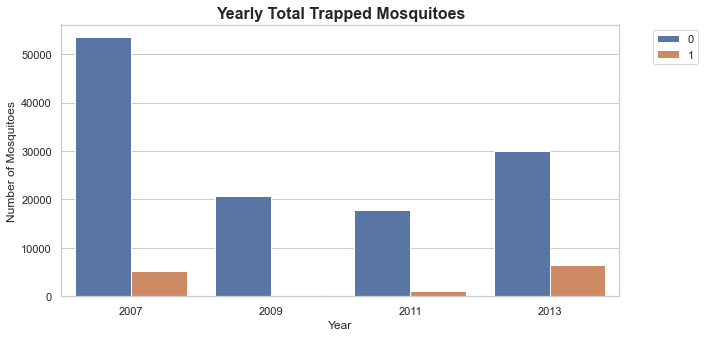

In [81]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=df_train['Year'], y='TotMosquitos', hue='WnvPresent', data=df_train, estimator=sum, ci=None)
ax.set_title('Yearly Total Trapped Mosquitoes', fontsize=16, fontweight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Mosquitoes')
ax.legend(bbox_to_anchor=(1.05,1), loc="upper left")

In [82]:
df_train.head(2)

Date                                            Address  \
0 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   

              AddressNumberAndStreet  Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   

   NumMosquitos  WnvPresent  TotMosquitos  Station  Year  Month  Week  \
0             1           0             1      1.0  2007      5    22   
1             1           0             1      1.0  2007      5    22   

  Year Month  
0    2007 05  
1    2007 05

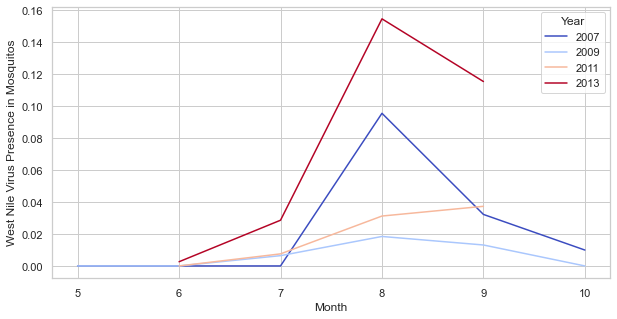

In [83]:
# Plot the presence of the WNV across the month for each year
plt.subplots(figsize=(10,5))
sns.lineplot(x='Month', y='WnvPresent', hue='Year', data=df_train, ci = None, palette = 'coolwarm')
plt.ylabel("West Nile Virus Presence in Mosquitos")
plt.show()

- We observed a rise in the West Nile Virus among the trapped mosquitos in the month of August every year. 
- The number of mosquitos with virus dropped in the month of September and October with the exception of 2011.

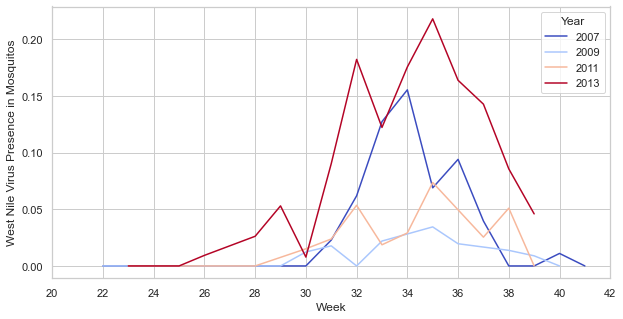

In [84]:
# Plot the presence of the WNV across the month for each year
plt.subplots(figsize=(10,5))
sns.lineplot(x='Week', y='WnvPresent', hue='Year', data=df_train, ci = None, palette = 'coolwarm')
plt.ylabel("West Nile Virus Presence in Mosquitos")
plt.xticks(range(20, 43, 2))
plt.show()

- We observed a rise in the West Nile Virus in week 32 (2nd week of Aug) and 35 (1st week of Sep). 
- The life cycle of a mosquito typically takes 7 to 10 days ([*source*](https://www.cdc.gov/westnile/resources/pdfs/FS_MosquitoLifeCycle-508.pdf)). This explained the trend observed for the rise of the WNV in about 1 to 2 weeks.
- August wk no 31 to 34

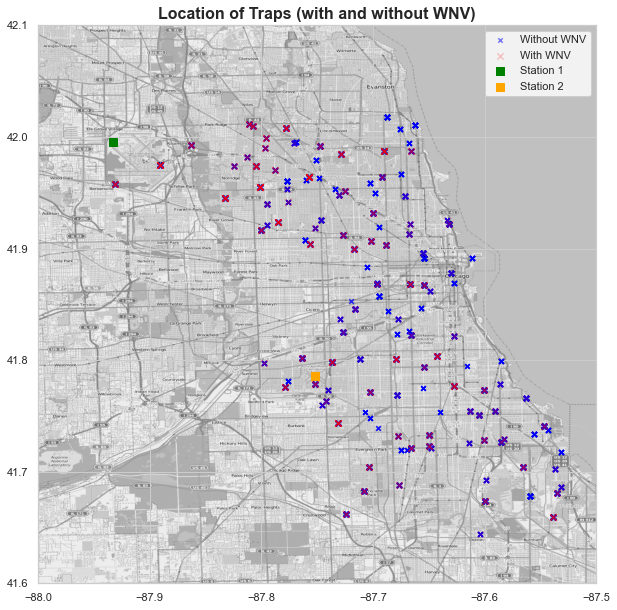

In [85]:
# Plot the traps and stations location
origin = [41.6, -88.0]              # lat/long of origin (lower left corner)
upperRight = [42.1, -87.5]          # lat/long of upper right corner

mapdata = np.loadtxt('../data/mapdata_copyright_openstreetmap_contributors.txt')

# generate data to overlay
trap_wnv = df_train.loc[df_train['WnvPresent']==1]
trap_wo_wnv = df_train.loc[df_train['WnvPresent']==0]

station_1 = [41.995, -87.933]
station_2 = [41.786, -87.752]

# generate map plot
plt.figure(figsize=(10,14))
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])

# Location of traps
plt.scatter(trap_wo_wnv['Longitude'], trap_wo_wnv['Latitude'], c='blue', marker='x', s=20, alpha=0.5, label='Without WNV')
plt.scatter(trap_wnv['Longitude'], trap_wnv['Latitude'], c='red', marker='x', s=40, alpha=0.2, label='With WNV')

# Location of station 1 and 2
plt.scatter(x=station_1[1], y=station_1[0], c='green', s=60, marker='s', label='Station 1')
plt.scatter(x=station_2[1], y=station_2[0], c='orange', s=60, marker='s', label='Station 2')

plt.title('Location of Traps (with and without WNV)', fontsize=16, fontweight='bold')
plt.legend()

#plt.savefig('map.png')

- From the map, we observed there are 2 clusters of West Nile Virus within Chicago. 
- The 2 clusters are quite near to the 2 weather stations.

In [86]:
df_train['Trap'].unique()

array(['T002', 'T007', 'T015', 'T045', 'T046', 'T048', 'T049', 'T050',
       'T054', 'T086', 'T091', 'T094', 'T096', 'T129', 'T143', 'T148',
       'T153', 'T159', 'T009', 'T011', 'T016', 'T019', 'T025', 'T028',
       'T031', 'T033', 'T089', 'T090', 'T092', 'T135', 'T141', 'T142',
       'T145', 'T146', 'T147', 'T149', 'T150', 'T151', 'T152', 'T154',
       'T158', 'T162', 'T218', 'T220', 'T001', 'T003', 'T006', 'T008',
       'T012', 'T034', 'T037', 'T040', 'T043', 'T047', 'T051', 'T085',
       'T088', 'T161', 'T219', 'T013', 'T014', 'T018', 'T030', 'T084',
       'T144', 'T160', 'T005', 'T017', 'T044', 'T095', 'T004', 'T035',
       'T036', 'T039', 'T060', 'T061', 'T062', 'T065', 'T066', 'T067',
       'T069', 'T070', 'T071', 'T073', 'T074', 'T075', 'T076', 'T077',
       'T079', 'T080', 'T081', 'T082', 'T083', 'T114', 'T155', 'T063',
       'T115', 'T138', 'T200', 'T206', 'T209', 'T212', 'T215', 'T107',
       'T128', 'T072', 'T078', 'T097', 'T099', 'T100', 'T102', 'T103',
      

In [87]:
# Subset trap location
trap_location = df_train[['Trap', 'TotMosquitos', 'WnvPresent']].groupby('Trap').sum()
trap_location

TotMosquitos  WnvPresent
Trap                          
T001            25           0
T002          3710          13
T003          1346          13
T004            59           0
T005            50           2
...            ...         ...
T236           375           1
T237            18           0
T238            34           0
T900         15386          10
T903          2327           7

[136 rows x 2 columns]

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135]),
 [Text(0, 0, 'T001'),
  Text(1, 0, 'T002'),
  Text(2, 0, 'T003'),
  Text(3, 0, 'T004'),
  Text(4, 0, 'T005'),
  Text(5, 0, 'T006'),
  Text(6, 0, 'T007'),
  Text(7, 0, 'T008'),
  Text(8, 0, 'T009'),
  Text(9, 0, 'T011'),
  Text(10,

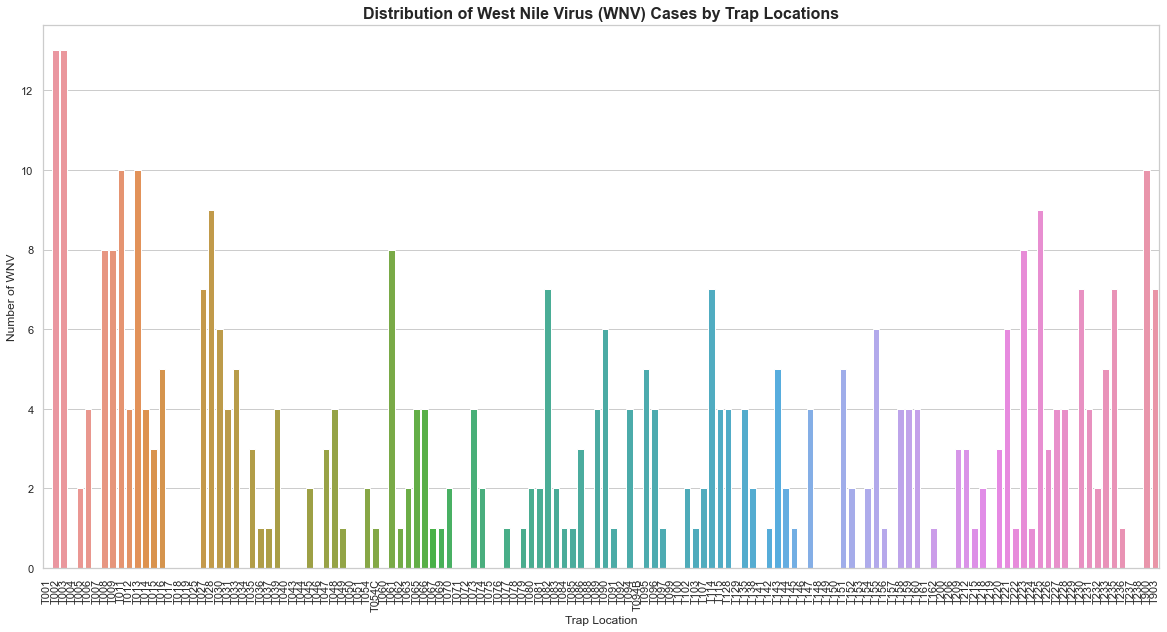

In [88]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x=trap_location.index, y='WnvPresent', data=trap_location, estimator=sum, ci=None)
ax.set_title('Distribution of West Nile Virus (WNV) Cases by Trap Locations', fontsize=16, fontweight='bold')
ax.set_xlabel('Trap Location')
ax.set_ylabel('Number of WNV')
plt.xticks(rotation=90)

In [89]:
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(x=df_train['Block'], y='TotMosquitos', hue='WnvPresent', data=df_train, estimator=sum, ci=None)
ax.set_title('Distribution of Trapped Mosquitoes by Blocks', fontsize=16, fontweight='bold')
ax.set_xlabel('Block')
ax.set_ylabel('Number of Mosquitoes')
#ax.legend(bbox_to_anchor=(1.05,1), loc="upper left")

Text(0, 0.5, 'Number of Mosquitoes')

- Block 10, 11, 12 have a significant numbers of mosquitos as compared to other blocks.

In [90]:
# Count number of species
print(f'Number of species: {df_train["Species"].nunique()}')
df_train["Species"].value_counts(normalize=True)

Number of species: 7


CULEX PIPIENS/RESTUANS    0.451445
CULEX RESTUANS            0.282360
CULEX PIPIENS             0.230088
CULEX TERRITANS           0.025487
CULEX SALINARIUS          0.009794
CULEX TARSALIS            0.000708
CULEX ERRATICUS           0.000118
Name: Species, dtype: float64

Text(0.5, 1.0, 'Total Number of Species')

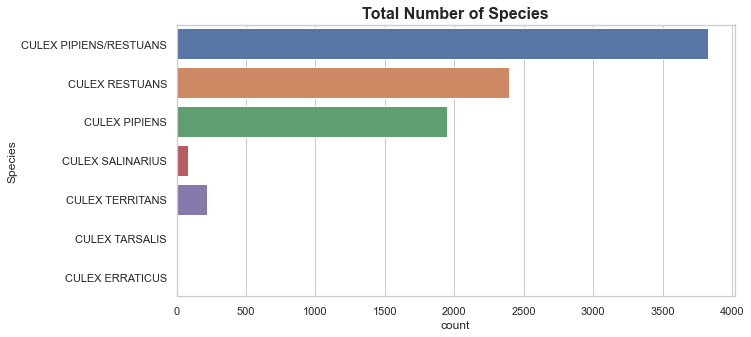

In [91]:
# Visualize the total number of species
plt.figure(figsize=(10,5))
sns.countplot(y = df_train['Species'], data = df_train)
plt.title('Total Number of Species', fontsize=16, fontweight='bold')

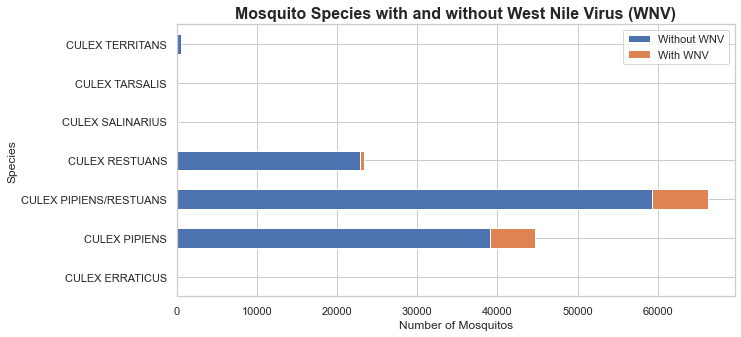

In [92]:
# Check and which species has the west nile virus
wnv_species = df_train.pivot_table(values=['TotMosquitos'], index='Species', columns='WnvPresent', aggfunc='sum')
#wnv_species = wnv_species.sort_values(by=wnv_species'TotMosquitos', ascending=True)
wnv_species.plot(kind='barh', stacked=True, figsize=(10,5))
plt.title('Mosquito Species with and without West Nile Virus (WNV)', fontsize=16, fontweight='bold')
plt.xlabel('Number of Mosquitos')
plt.legend(labels=['Without WNV', 'With WNV'])

- West Nile virus is spread by the Culex species of mosquito. The main vector species in the U.S. are Culex pipiens, Culex tarsalis, and Culex quinquefasciatus ([*source*](https://www.vdci.net/vector-borne-diseases/west-nile-virus-education-and-mosquito-management-to-protect-public-health/))
- From the train dataset, most of the mosquito species caught are 'CULEX PIPIENS / RESTUANS', 'CULEX PIPIENS', and 'CULEX RESTUANS'. 
- A percentage of species caught were detected with the West Nile Virus.
- 'CULEX PIPIENS / RESTUANS' a combination of 'CULEX PIPIENS' and 'CULEX RESTUANS'?


### Weather Dataset

In [93]:
df_weather.describe().T

count         mean        std      min      25%      50%  \
Station      2944.0     1.500000   0.500085     1.00     1.00     1.50   
Tmax         2944.0    76.166101  11.461970    41.00    69.00    78.00   
Tmin         2944.0    57.810462  10.381939    29.00    50.00    59.00   
Tavg         2944.0    67.239300  10.538784    36.00    60.00    69.00   
DewPoint     2944.0    53.457880  10.675181    22.00    46.00    54.00   
WetBulb      2944.0    59.325747   9.289555    32.00    53.00    61.00   
Heat         2944.0     3.417799   5.955153     0.00     0.00     0.00   
Cool         2944.0     5.641304   6.104849     0.00     0.00     4.00   
Sunrise      2944.0   480.646739  65.333626   416.00   424.75   446.50   
Sunset       2944.0  1847.347826  87.035824  1647.00  1792.25  1859.50   
PrecipTotal  2944.0     0.131240   0.393208     0.00     0.00     0.00   
StnPressure  2944.0    29.284446   0.158468    28.55    29.19    29.28   
SeaLevel     2944.0    29.968356   0.158512    29.23    29.87    29.97   
ResultSpeed  2944.0     6.960666   3.587527     0.10     4.30     6.40   
ResultDir    2944.0    17.494905  10.063609     1.00     7.00    19.00   
AvgSpeed     2944.0     8.579076   3.146201     1.70     6.30     8.10   
CsFU         2944.0     0.003057   0.055216     0.00     0.00     0.00   
CsDZ         2944.0     0.045177   0.207727     0.00     0.00     0.00   
CsFG+        2944.0     0.009171   0.095342     0.00     0.00     0.00   
CsTS         2944.0     0.119905   0.324905     0.00     0.00     0.00   
CsSQ         2944.0     0.001019   0.031911     0.00     0.00     0.00   
CsMIFG       2944.0     0.001019   0.031911     0.00     0.00     0.00   
CsHZ         2944.0     0.089334   0.285274     0.00     0.00     0.00   
CsSN         2944.0     0.002038   0.045106     0.00     0.00     0.00   
CsVCFG       2944.0     0.001359   0.036842     0.00     0.00     0.00   
CsRA         2944.0     0.351562   0.477539     0.00     0.00     0.00   
CsVCTS       2944.0     0.006454   0.080090     0.00     0.00     0.00   
CsNA         2944.0     0.546535   0.497914     0.00     0.00     1.00   
CsFG         2944.0     0.013927   0.117206     0.00     0.00     0.00   
CsBCFG       2944.0     0.001698   0.041183     0.00     0.00     0.00   
CsGR         2944.0     0.000340   0.018430     0.00     0.00     0.00   
CsTSRA       2944.0     0.103601   0.304793     0.00     0.00     0.00   
CsBR         2944.0     0.276155   0.447170     0.00     0.00     0.00   

                 75%      max  
Station         2.00     2.00  
Tmax           85.00   104.00  
Tmin           66.00    83.00  
Tavg           75.00    94.00  
DewPoint       62.00    75.00  
WetBulb        67.00    78.00  
Heat            5.00    29.00  
Cool           10.00    29.00  
Sunrise       531.25   623.00  
Sunset       1922.25  1931.00  
PrecipTotal     0.06     6.86  
StnPressure    29.39    29.86  
SeaLevel       30.06    30.53  
ResultSpeed     9.20    24.10  
ResultDir      25.00    36.00  
AvgSpeed       10.40    26.30  
CsFU            0.00     1.00  
CsDZ            0.00     1.00  
CsFG+           0.00     1.00  
CsTS            0.00     1.00  
CsSQ            0.00     1.00  
CsMIFG          0.00     1.00  
CsHZ            0.00     1.00  
CsSN            0.00     1.00  
CsVCFG          0.00     1.00  
CsRA            1.00     1.00  
CsVCTS          0.00     1.00  
CsNA            1.00     1.00  
CsFG            0.00     1.00  
CsBCFG          0.00     1.00  
CsGR            0.00     1.00  
CsTSRA          0.00     1.00  
CsBR            1.00     1.00

In [94]:
# Check number of data for each station
df_weather['Station'].value_counts()

1    1472
2    1472
Name: Station, dtype: int64

In [95]:
def subplot_histograms(df, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=2, sharex=False, sharey=True, squeeze=True, figsize=(15,25))
    plt.subplots_adjust(hspace = 0.5)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        #ax[i].hist(df[column], bins=50)
        ax[i].hist(df[df['Station']==1][column], bins = 20, alpha = 0.5, label = 'Station 1')
        ax[i].hist(df[df['Station']==2][column], bins = 20, alpha = 0.5, label = 'Station 2')
        ax[i].set_title(list_of_titles[i], fontweight = 'bold') 
        ax[i].set_xlabel(list_of_xlabels[i]) # Set titles, labels, etc here for each subplot
        ax[i].axvline(df[column].median(), color='r', linestyle='dashed', linewidth=3, label='Median')
        ax[i].axvline(df[column].mean(), color='k', linestyle='dashed', linewidth=3, label = 'Mean')
        ax[i].legend()

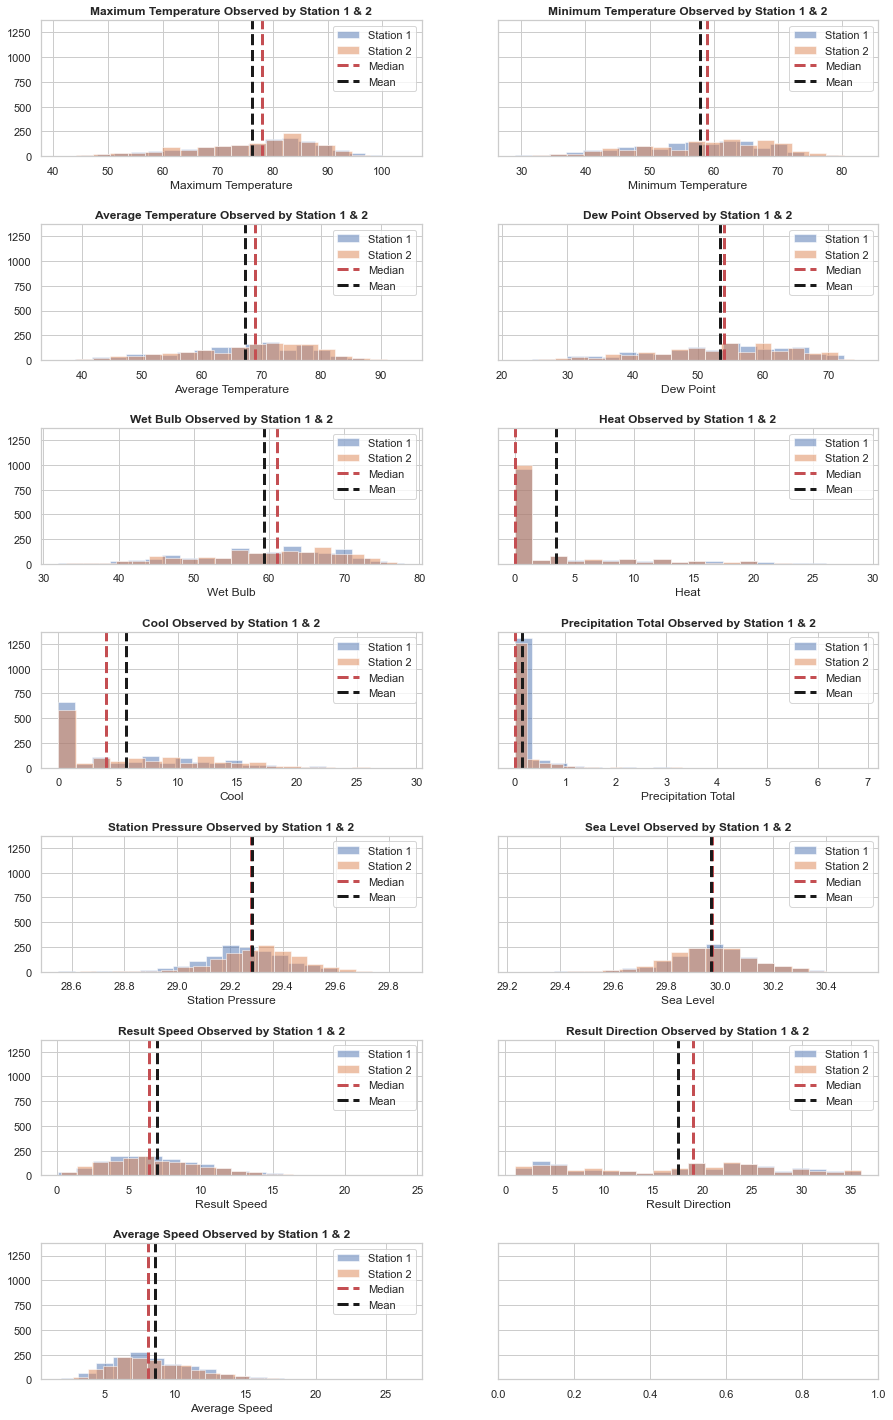

In [96]:
list_of_columns = ['Tmax', 'Tmin', 'Tavg', 'DewPoint', 'WetBulb', 'Heat', 'Cool', 'PrecipTotal','StnPressure',
                   'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed']

list_of_titles = ['Maximum Temperature Observed by Station 1 & 2', 'Minimum Temperature Observed by Station 1 & 2',
                  'Average Temperature Observed by Station 1 & 2', 'Dew Point Observed by Station 1 & 2',
                  'Wet Bulb Observed by Station 1 & 2','Heat Observed by Station 1 & 2', 
                  'Cool Observed by Station 1 & 2', 'Precipitation Total Observed by Station 1 & 2', 
                  'Station Pressure Observed by Station 1 & 2','Sea Level Observed by Station 1 & 2', 
                  'Result Speed Observed by Station 1 & 2','Result Direction Observed by Station 1 & 2',
                  'Average Speed Observed by Station 1 & 2']

list_of_xlabels= ['Maximum Temperature', 'Minimum Temperature', 'Average Temperature', 'Dew Point',
                  'Wet Bulb', 'Heat', 'Cool', 'Precipitation Total', 'Station Pressure', 'Sea Level', 'Result Speed',
                  'Result Direction', 'Average Speed']

subplot_histograms(df_weather, list_of_columns, list_of_titles, list_of_xlabels)

We observed the distribution and spread for each variable is similar for both stations.

We will merge the train and weather datasets for EDA analysis.

In [97]:
# Merge df_train and df_weather
df_merged = pd.merge(df_train, df_weather, on=['Date', 'Station'], how='left')
df_merged.head()

Date                                            Address  \
0 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2 2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
3 2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
4 2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2          CULEX RESTUANS     62    N MANDELL AVE  T007   
3  CULEX PIPIENS/RESTUANS     79     W FOSTER AVE  T015   
4          CULEX RESTUANS     79     W FOSTER AVE  T015   

              AddressNumberAndStreet   Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
2   6200  N MANDELL AVE, Chicago, IL  41.994991 -87.769279                9   
3    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   
4    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   

   NumMosquitos  WnvPresent  TotMosquitos  Station  Year  Month  Week  \
0             1           0             1      1.0  2007      5    22   
1             1           0             1      1.0  2007      5    22   
2             1           0             1      1.0  2007      5    22   
3             1           0             1      1.0  2007      5    22   
4             4           0             4      1.0  2007      5    22   

  Year Month  Tmax  Tmin  Tavg  DewPoint  WetBulb  Heat  Cool  Sunrise  \
0    2007 05    88    60  74.0        58     65.0   0.0   9.0    421.0   
1    2007 05    88    60  74.0        58     65.0   0.0   9.0    421.0   
2    2007 05    88    60  74.0        58     65.0   0.0   9.0    421.0   
3    2007 05    88    60  74.0        58     65.0   0.0   9.0    421.0   
4    2007 05    88    60  74.0        58     65.0   0.0   9.0    421.0   

   Sunset  PrecipTotal  StnPressure  SeaLevel  ResultSpeed  ResultDir  \
0  1917.0          0.0        29.39     30.11          5.8         18   
1  1917.0          0.0        29.39     30.11          5.8         18   
2  1917.0          0.0        29.39     30.11          5.8         18   
3  1917.0          0.0        29.39     30.11          5.8         18   
4  1917.0          0.0        29.39     30.11          5.8         18   

   AvgSpeed  CsFU  CsDZ  CsFG+  CsTS  CsSQ  CsMIFG  CsHZ  CsSN  CsVCFG  CsRA  \
0       6.5     0     0      0     0     0       0     1     0       0     0   
1       6.5     0     0      0     0     0       0     1     0       0     0   
2       6.5     0     0      0     0     0       0     1     0       0     0   
3       6.5     0     0      0     0     0       0     1     0       0     0   
4       6.5     0     0      0     0     0       0     1     0       0     0   

   CsVCTS  CsNA  CsFG  CsBCFG  CsGR  CsTSRA  CsBR  
0       0     0     0       0     0       0     1  
1       0     0     0       0     0       0     1  
2       0     0     0       0     0       0     1  
3       0     0     0       0     0       0     1  
4       0     0     0       0     0       0     1

In [98]:
df_merged.describe().T

count         mean        std          min          25%  \
Block            8475.0    38.949381  24.117693    10.000000    14.000000   
Latitude         8475.0    41.844618   0.106609    41.644612    41.750498   
Longitude        8475.0   -87.694788   0.084063   -87.930995   -87.752329   
AddressAccuracy  8475.0     7.941239   1.321681     3.000000     8.000000   
NumMosquitos     8475.0     8.364602  11.183355     1.000000     1.000000   
WnvPresent       8475.0     0.043658   0.204345     0.000000     0.000000   
TotMosquitos     8475.0    15.933805  75.084707     1.000000     2.000000   
Station          8475.0     1.709381   0.454075     1.000000     1.000000   
Year             8475.0  2009.713156   2.331751  2007.000000  2007.000000   
Month            8475.0     7.700531   1.108677     5.000000     7.000000   
Week             8475.0    31.739469   4.717594    22.000000    28.000000   
Tmax             8475.0    81.357758   8.428245    57.000000    78.000000   
Tmin             8475.0    63.474808   7.719484    41.000000    58.000000   
Tavg             8475.0    72.648496   7.636167    50.000000    70.000000   
DewPoint         8475.0    59.203776   7.994652    38.000000    54.000000   
WetBulb          8475.0    64.428791   6.835449    46.000000    60.000000   
Heat             8475.0     0.971445   2.808646     0.000000     0.000000   
Cool             8475.0     8.619941   5.802842     0.000000     5.000000   
Sunrise          8475.0   469.561298  46.743331   416.000000   427.000000   
Sunset           8475.0  1868.153156  65.357949  1720.000000  1826.000000   
PrecipTotal      8475.0     0.142179   0.355452     0.000000     0.000000   
StnPressure      8475.0    29.293264   0.120127    28.890000    29.210000   
SeaLevel         8475.0    29.959196   0.120675    29.590000    29.870000   
ResultSpeed      8475.0     5.991835   2.872008     0.100000     4.000000   
ResultDir        8475.0    17.911268   9.135859     1.000000     9.000000   
AvgSpeed         8475.0     7.519056   2.503846     2.100000     5.900000   
CsFU             8475.0     0.000000   0.000000     0.000000     0.000000   
CsDZ             8475.0     0.014867   0.121029     0.000000     0.000000   
CsFG+            8475.0     0.000000   0.000000     0.000000     0.000000   
CsTS             8475.0     0.183245   0.386890     0.000000     0.000000   
CsSQ             8475.0     0.000000   0.000000     0.000000     0.000000   
CsMIFG           8475.0     0.000000   0.000000     0.000000     0.000000   
CsHZ             8475.0     0.107021   0.309158     0.000000     0.000000   
CsSN             8475.0     0.000000   0.000000     0.000000     0.000000   
CsVCFG           8475.0     0.000000   0.000000     0.000000     0.000000   
CsRA             8475.0     0.322478   0.467452     0.000000     0.000000   
CsVCTS           8475.0     0.040236   0.196524     0.000000     0.000000   
CsNA             8475.0     0.561652   0.496214     0.000000     0.000000   
CsFG             8475.0     0.012153   0.109577     0.000000     0.000000   
CsBCFG           8475.0     0.000000   0.000000     0.000000     0.000000   
CsGR             8475.0     0.000000   0.000000     0.000000     0.000000   
CsTSRA           8475.0     0.153156   0.360159     0.000000     0.000000   
CsBR             8475.0     0.287080   0.452426     0.000000     0.000000   

                         50%          75%          max  
Block              37.000000    58.000000    98.000000  
Latitude           41.857402    41.944869    42.017430  
Longitude         -87.694991   -87.642984   -87.531635  
AddressAccuracy     8.000000     9.000000     9.000000  
NumMosquitos        4.000000    10.000000    50.000000  
WnvPresent          0.000000     0.000000     1.000000  
TotMosquitos        4.000000    11.000000  2532.000000  
Station             2.000000     2.000000     2.000000  
Year             2009.000000  2011.000000  2013.000000  
Month               8.000000     9.000000    10.000000  
We

Some of the weather conditions for CodeSum is 0. We will drop these columns

In [99]:
# List the columns to drop
columns_to_drop = ['CsVCFG', 'CsSN', 'CsFG+', 'CsBCFG', 'CsMIFG', 'CsGR', 'CsSQ', 'CsFU']
drop_columns(df_merged, columns_to_drop)
df_merged.head(2)

Date                                            Address  \
0 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   

              AddressNumberAndStreet  Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   

   NumMosquitos  WnvPresent  TotMosquitos  Station  Year  Month  Week  \
0             1           0             1      1.0  2007      5    22   
1             1           0             1      1.0  2007      5    22   

  Year Month  Tmax  Tmin  Tavg  DewPoint  WetBulb  Heat  Cool  Sunrise  \
0    2007 05    88    60  74.0        58     65.0   0.0   9.0    421.0   
1    2007 05    88    60  74.0        58     65.0   0.0   9.0    421.0   

   Sunset  PrecipTotal  StnPressure  SeaLevel  ResultSpeed  ResultDir  \
0  1917.0          0.0        29.39     30.11          5.8         18   
1  1917.0          0.0        29.39     30.11          5.8         18   

   AvgSpeed  CsDZ  CsTS  CsHZ  CsRA  CsVCTS  CsNA  CsFG  CsTSRA  CsBR  
0       6.5     0     0     1     0       0     0     0       0     1  
1       6.5     0     0     1     0       0     0     0       0     1

In [100]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8475 entries, 0 to 8474
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    8475 non-null   datetime64[ns]
 1   Address                 8475 non-null   object        
 2   Species                 8475 non-null   object        
 3   Block                   8475 non-null   int64         
 4   Street                  8475 non-null   object        
 5   Trap                    8475 non-null   object        
 6   AddressNumberAndStreet  8475 non-null   object        
 7   Latitude                8475 non-null   float64       
 8   Longitude               8475 non-null   float64       
 9   AddressAccuracy         8475 non-null   int64         
 10  NumMosquitos            8475 non-null   int64         
 11  WnvPresent              8475 non-null   int64         
 12  TotMosquitos            8475 non-null   int64   

In [101]:
df_merged.describe().T

count         mean        std          min          25%  \
Block            8475.0    38.949381  24.117693    10.000000    14.000000   
Latitude         8475.0    41.844618   0.106609    41.644612    41.750498   
Longitude        8475.0   -87.694788   0.084063   -87.930995   -87.752329   
AddressAccuracy  8475.0     7.941239   1.321681     3.000000     8.000000   
NumMosquitos     8475.0     8.364602  11.183355     1.000000     1.000000   
WnvPresent       8475.0     0.043658   0.204345     0.000000     0.000000   
TotMosquitos     8475.0    15.933805  75.084707     1.000000     2.000000   
Station          8475.0     1.709381   0.454075     1.000000     1.000000   
Year             8475.0  2009.713156   2.331751  2007.000000  2007.000000   
Month            8475.0     7.700531   1.108677     5.000000     7.000000   
Week             8475.0    31.739469   4.717594    22.000000    28.000000   
Tmax             8475.0    81.357758   8.428245    57.000000    78.000000   
Tmin             8475.0    63.474808   7.719484    41.000000    58.000000   
Tavg             8475.0    72.648496   7.636167    50.000000    70.000000   
DewPoint         8475.0    59.203776   7.994652    38.000000    54.000000   
WetBulb          8475.0    64.428791   6.835449    46.000000    60.000000   
Heat             8475.0     0.971445   2.808646     0.000000     0.000000   
Cool             8475.0     8.619941   5.802842     0.000000     5.000000   
Sunrise          8475.0   469.561298  46.743331   416.000000   427.000000   
Sunset           8475.0  1868.153156  65.357949  1720.000000  1826.000000   
PrecipTotal      8475.0     0.142179   0.355452     0.000000     0.000000   
StnPressure      8475.0    29.293264   0.120127    28.890000    29.210000   
SeaLevel         8475.0    29.959196   0.120675    29.590000    29.870000   
ResultSpeed      8475.0     5.991835   2.872008     0.100000     4.000000   
ResultDir        8475.0    17.911268   9.135859     1.000000     9.000000   
AvgSpeed         8475.0     7.519056   2.503846     2.100000     5.900000   
CsDZ             8475.0     0.014867   0.121029     0.000000     0.000000   
CsTS             8475.0     0.183245   0.386890     0.000000     0.000000   
CsHZ             8475.0     0.107021   0.309158     0.000000     0.000000   
CsRA             8475.0     0.322478   0.467452     0.000000     0.000000   
CsVCTS           8475.0     0.040236   0.196524     0.000000     0.000000   
CsNA             8475.0     0.561652   0.496214     0.000000     0.000000   
CsFG             8475.0     0.012153   0.109577     0.000000     0.000000   
CsTSRA           8475.0     0.153156   0.360159     0.000000     0.000000   
CsBR             8475.0     0.287080   0.452426     0.000000     0.000000   

                         50%          75%          max  
Block              37.000000    58.000000    98.000000  
Latitude           41.857402    41.944869    42.017430  
Longitude         -87.694991   -87.642984   -87.531635  
AddressAccuracy     8.000000     9.000000     9.000000  
NumMosquitos        4.000000    10.000000    50.000000  
WnvPresent          0.000000     0.000000     1.000000  
TotMosquitos        4.000000    11.000000  2532.000000  
Station             2.000000     2.000000     2.000000  
Year             2009.000000  2011.000000  2013.000000  
Month               8.000000     9.000000    10.000000  
Week               32.000000    35.000000    41.000000  
Tmax               83.000000    87.000000    97.000000  
Tmin               65.000000    69.000000    79.000000  
Tavg               74.000000    78.000000    87.000000  
DewPoint           59.000000    66.000000    73.000000  
WetBulb            65.000000    70.000000    76.000000  
Heat                0.000000     0.000000    15.000000  
Cool                9.000000    13.000000    22.000000  
Sunrise           451.000000   518.000000   557.000000  
Sunset           1904.000000  1924.000000  1931.000000  
PrecipTotal         0.000000     0.110000     3.

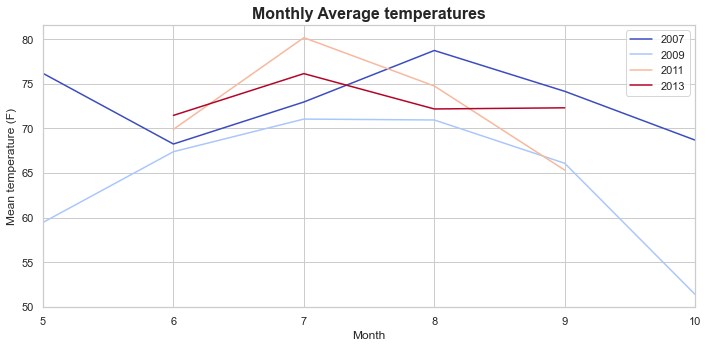

In [102]:
# Plot temperature by month and year
plt.figure(figsize=(10,5))
sns.lineplot(x = 'Month',y = 'Tavg', data = df_merged, hue = 'Year', ci = None, palette = 'coolwarm')
plt.title('Monthly Average temperatures', fontsize=16, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Mean temperature (F)')
plt.xlim(df_merged['Month'].min(), df_merged['Month'].max())
plt.legend()
plt.tight_layout()

Generally, the temperature increase from May to August and peak in July (with the exception of 2007 where the peak is in August) before starting to decrease from August.

In [103]:
# Create a function to plot line graph
def subplot_line(df, title_list, xlabel):
    plt.subplots(figsize=(15,6))

    plt.subplot(121)
    sns.lineplot(x=df.index, y='TotMosquitos', data=df, ci = None)
    plt.xlabel(xlabel)
    plt.ylabel('Total Mosquitos Trapped')
    plt.title(title_list[0], fontsize=14, fontweight='bold')

    plt.subplot(122)
    sns.lineplot(x=df.index, y='WnvPresent', data=df, ci = None)
    plt.xlabel(xlabel)
    plt.ylabel('West Nile Virus Presence in Mosquitos')
    plt.title(title_list[1], fontsize=14, fontweight='bold')

In [104]:
# Subset average temperature data
ave_temp = df_merged[['Tavg', 'TotMosquitos', 'WnvPresent']].groupby('Tavg').sum()
ave_temp

TotMosquitos  WnvPresent
Tavg                          
50.0            80           0
51.0           127           0
52.0           853           0
53.0            57           0
54.0           723           2
55.0           728           5
56.0          1512           3
57.0           196           2
58.0            70           0
60.0           674           0
61.0          1210           0
62.0           517           0
63.0           726           2
64.0          3414           0
65.0          1743           8
66.0          1521          13
67.0          2337           0
68.0           162           0
69.0          1381           0
70.0          4785           3
71.0          8914          17
72.0         12114          48
73.0          8091          38
74.0          5737          29
75.0          4290          29
76.0          6031          27
77.0         12236          42
78.0          6407          36
79.0          9558           6
80.0         17966          21
81.0          7886           4
82.0          7105          22
83.0          1046           3
84.0          1768           5
86.0          2818           4
87.0           256           1

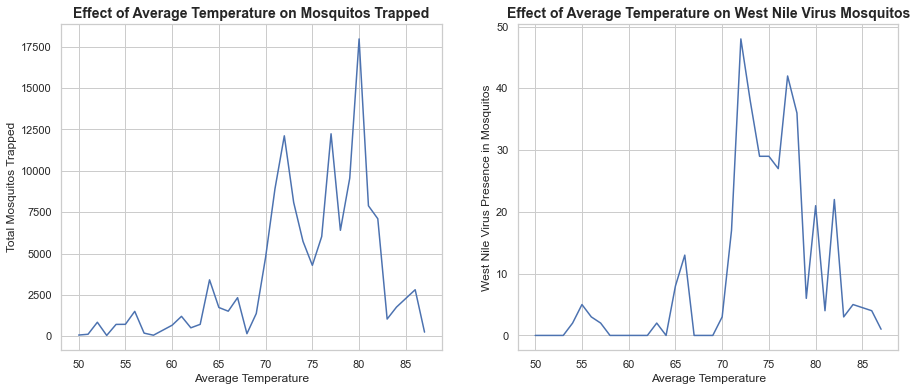

In [105]:
# Plot the effect of average temperature on mosquitos
title_list = ['Effect of Average Temperature on Mosquitos Trapped', 'Effect of Average Temperature on West Nile Virus Mosquitos']
subplot_line(ave_temp, title_list, 'Average Temperature')

- Increase in the number of mosquitos trapped and WNV is observed when the average tempature is above 65 degree Fahrenheit.

In [106]:
# Subset maximum temperature data
max_temp = df_merged[['Tmax', 'TotMosquitos', 'WnvPresent']].groupby('Tmax').sum()
max_temp

TotMosquitos  WnvPresent
Tmax                          
57             127           0
58             430           0
59             660           2
60             275           0
61             736           0
62             798           5
63              69           0
64             178           0
66            1066           3
67             302           2
68            1206           0
69             337           0
70            2634           1
71             643           0
72             975           0
74            2659          12
75            1266          10
76             658           0
77            7037           0
78            5648          38
79            2131          17
80            3896          28
81            9442          34
82            8787          27
83           12587          24
84            7428          15
85            5197          27
86            7910          21
87            8051          28
88            4475           0
89            4930          16
90           12240          20
91           13235          20
92            2283           8
93             196           4
94             379           1
96            1350           3
97            2818           4

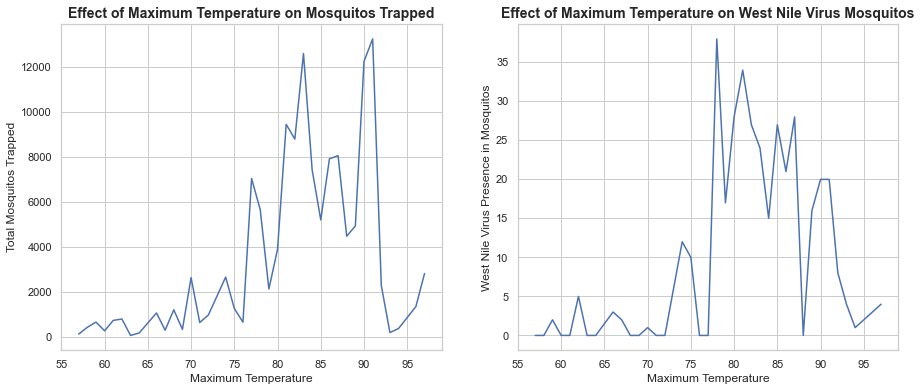

In [107]:
# Plot the effect of maximum temperature on mosquitos
title_list = ['Effect of Maximum Temperature on Mosquitos Trapped', 'Effect of Maximum Temperature on West Nile Virus Mosquitos']
subplot_line(max_temp, title_list, 'Maximum Temperature')

- Increase in the number of mosquitos trapped and WNV is observed when the maximum tempature is above 75 degree Fahrenheit.

In [108]:
# Subset minimum temperature data
min_temp = df_merged[['Tmin', 'TotMosquitos', 'WnvPresent']].groupby('Tmin').sum()
min_temp

TotMosquitos  WnvPresent
Tmin                          
41              80           0
43             348           0
44             182           0
45             127           0
46            1566           5
47             322           0
48            1451           7
49             468           0
50            1876           2
51             971           0
52             217           0
53             272           0
54             718           0
55            1076           7
56            2038           3
57            5014          23
58            5020           5
59            1148           5
60            6953           7
61            4136          18
62            3866          19
63            5336          17
64            2794           5
65            4031          17
66            5140          12
67            7805          18
68            6307          12
69           19966          96
70           13976          20
71            8457          25
72            6445          30
73            7221           7
74            6343           3
75            2818           4
76             295           2
79             256           1

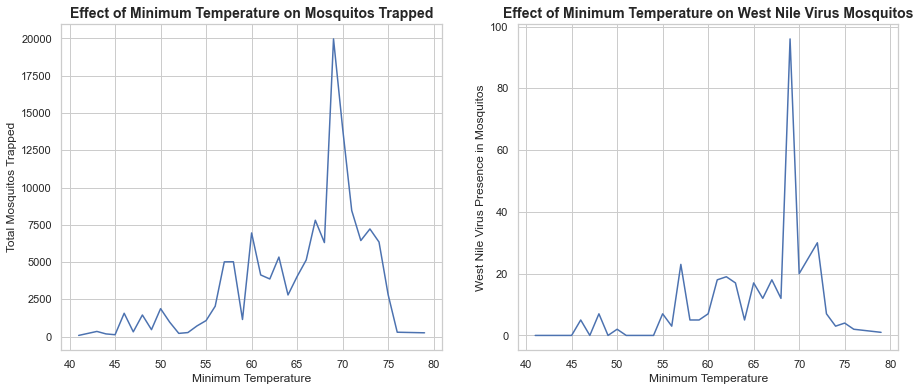

In [109]:
# Plot the effect of minimum temperature on mosquitos
title_list = ['Effect of Minimum Temperature on Mosquitos Trapped', 'Effect of Minimum Temperature on West Nile Virus Mosquitos']
subplot_line(min_temp, title_list, 'Minimum Temperature')

- Increase in the number of mosquitos trapped and WNV is observed when the minimum tempature is above 55 degree Fahrenheit.

In [110]:
# Subset dewpoint data
dewpoint = df_merged[['DewPoint', 'TotMosquitos', 'WnvPresent']].groupby('DewPoint').sum()
dewpoint

TotMosquitos  WnvPresent
DewPoint                          
38                 448           2
39                 348           0
40                 373           0
41                 127           0
42                 184           2
43                1273           3
44                 965           5
45                 217           0
46                 988           0
47                 457           0
48                1215           0
49                1549           0
50                2211          12
51                3673           0
52                2934           5
53                2555           8
54                8816          16
55                5209          30
56                3983          16
57                3127           8
58                3389          23
59                5545          17
60                9553           8
61                3633           6
62                6173          11
63                7592           4
64                1921          10
65               11628          16
66                7894          23
67                8533          51
68                2148           7
69                8133          23
70                9546          47
71                2733           5
72                4186           1
73                1780          11

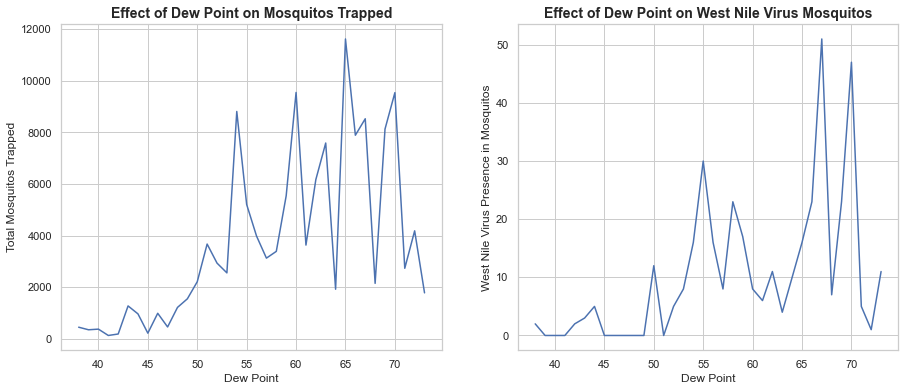

In [111]:
# Plot the effect of wet bulb on mosquitos
title_list = ['Effect of Dew Point on Mosquitos Trapped', 'Effect of Dew Point on West Nile Virus Mosquitos']
subplot_line(dewpoint, title_list, 'Dew Point')

- Increase in the number of mosquitos trapped and WNV is observed when the dew point temperature is above 50 degree Fahrenheit.

In [112]:
# Subset wetbulb data
wet_bulb = df_merged[['WetBulb', 'TotMosquitos', 'WnvPresent']].groupby('WetBulb').sum()
wet_bulb

TotMosquitos  WnvPresent
WetBulb                          
46.0              348           0
47.0             1005           2
49.0              778           7
50.0             1341           3
51.0              735           0
52.0              429           0
53.0              333           0
54.0              447           0
55.0             1204           0
56.0             1100           0
57.0             3755           0
58.0             2966          21
59.0             3347           1
60.0             1997           2
61.0             4947           4
62.0            13064          53
63.0             3546          12
64.0             5419          36
65.0             5382          10
66.0             6916           6
67.0             6364           4
68.0             7635          17
69.0            10584          71
70.0            14959          26
71.0            10739          21
72.0             6660          32
73.0             5019          16
74.0             7753           4
75.0             4487          11
76.0             1780          11

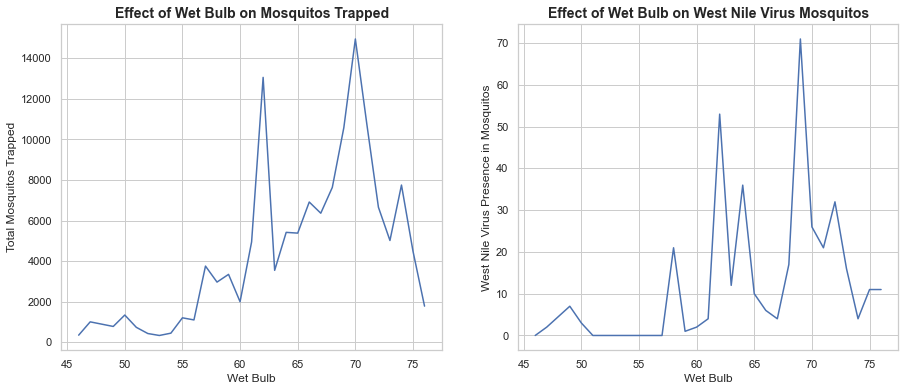

In [113]:
# Plot the effect of wet bulb on mosquitos
title_list = ['Effect of Wet Bulb on Mosquitos Trapped', 'Effect of Wet Bulb on West Nile Virus Mosquitos']
subplot_line(wet_bulb, title_list, 'Wet Bulb')

- Increase in the number of mosquitos trapped and WNV is observed when the wet bulb temperature is above 55 degree Fahrenheit.

In [114]:
# Subset heat data
heat = df_merged[['Heat', 'TotMosquitos', 'WnvPresent']].groupby('Heat').sum()
heat

TotMosquitos  WnvPresent
Heat                          
0.0         124152         356
1.0           3414           0
2.0            726           2
3.0            517           0
4.0           1210           0
5.0            674           0
7.0             70           0
8.0            196           2
9.0           1512           3
10.0           728           5
11.0           723           2
12.0            57           0
13.0           853           0
14.0           127           0
15.0            80           0

In [115]:
# Plot the effect of heat on mosquitos
title_list = ['Effect of Heat on Mosquitos Trapped', 'Effect of Heat on West Nile Virus Mosquitos']
subplot_line(heat, title_list, 'Heat')

- No trend observed for Heat variable.

In [116]:
# Subset cool data
cool = df_merged[['Cool', 'TotMosquitos', 'WnvPresent']].groupby('Cool').sum()
cool

TotMosquitos  WnvPresent
Cool                          
0.0          12630          22
1.0           1521          13
2.0           2337           0
3.0            162           0
4.0           1381           0
5.0           4785           3
6.0           8914          17
7.0          12114          48
8.0           8091          38
9.0           5737          29
10.0          4290          29
11.0          6031          27
12.0         12236          42
13.0          6407          36
14.0          9558           6
15.0         17966          21
16.0          7886           4
17.0          7105          22
18.0          1046           3
19.0          1768           5
21.0          2818           4
22.0           256           1

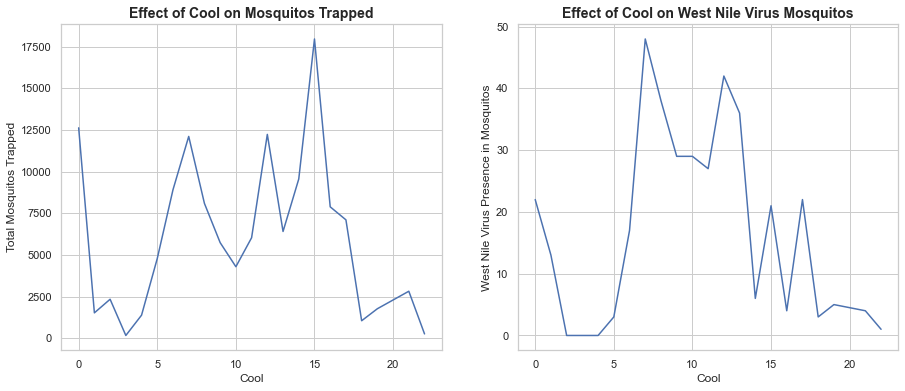

In [117]:
# Plot the effect of cool on mosquitos
title_list = ['Effect of Cool on Mosquitos Trapped', 'Effect of Cool on West Nile Virus Mosquitos']
subplot_line(cool, title_list, 'Cool')

- No significant trend observed for Cool variable.

In [118]:
# Subset preciptotal data
precip_total = df_merged[['PrecipTotal', 'TotMosquitos', 'WnvPresent']].groupby('PrecipTotal').sum()
precip_total 

TotMosquitos  WnvPresent
PrecipTotal                          
0.00                87889         221
0.01                 3339          18
0.02                 1366           0
0.03                 1676           2
0.04                  124           0
0.05                   24           0
0.06                 2813          12
0.08                 1929           1
0.09                 6429           1
0.11                  898           0
0.12                  853           0
0.13                  986           0
0.14                  592           0
0.16                 1102           2
0.17                  180           0
0.19                  623           1
0.20                 1049          11
0.23                 2728          27
0.24                  429          10
0.27                   69           0
0.33                  416           0
0.36                 1665          16
0.39                 1105           0
0.42                   58           0
0.44                   92           0
0.46                  483           1
0.50                  925           0
0.52                  337           0
0.58                 1350           3
0.59                  316           0
0.70                  885           2
0.79                  421           0
0.83                 3316          15
0.84                 1262           4
0.87                  462           0
0.88                 4512          15
0.89                   80           0
0.92                  964           0
0.95                   90           0
1.19                   85           0
1.31                  734           8
1.55                  144           0
3.97                  239           0

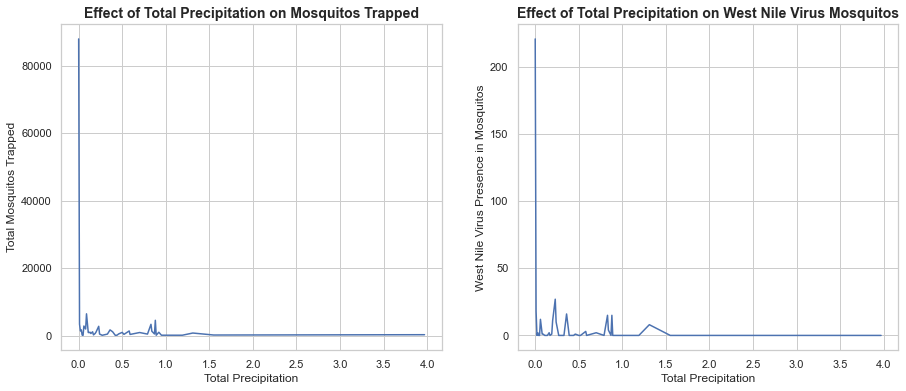

In [119]:
# Plot the effect of preciptotal on mosquitos
title_list = ['Effect of Total Precipitation on Mosquitos Trapped', 'Effect of Total Precipitation on West Nile Virus Mosquitos' ]
subplot_line(precip_total, title_list, 'Total Precipitation')

- Total Precipitation below 0.5 seems to have an influence in the number of mosquitos trapped and WNV presence.

In [120]:
# Subset station pressure data
station_pressure = df_merged[['StnPressure', 'TotMosquitos', 'WnvPresent']].groupby('StnPressure').sum()
station_pressure

TotMosquitos  WnvPresent
StnPressure                          
28.89                 885           0
28.91                 177           0
28.95                  18           0
28.97                 985           1
29.01                 255           0
29.03                 462           0
29.06                 804           8
29.08                1170           0
29.09                2116           0
29.10                1408           3
29.11                1862          13
29.12                1105           0
29.13                1610           0
29.14                1322           5
29.15                1365           0
29.16                1242          11
29.17                4163          20
29.18                7412           6
29.19                 483           1
29.20                2471           4
29.21                3917          22
29.22                 395           3
29.23                6425          20
29.24                2063           3
29.25                1115           1
29.26                4354          30
29.27                3242           1
29.28                4588          19
29.29                8876          39
29.30                 737           0
29.31                5827           9
29.32                 393           2
29.33                9627          24
29.34               18084          20
29.35                4069           0
29.36                3260          25
29.37                  57           0
29.38                3625          14
29.39                3433           6
29.40                2084          11
29.41                2482           0
29.42                1918          16
29.44                5025          14
29.45                 379           0
29.46                2981           5
29.47                3113          12
29.48                  89           0
29.49                  78           0
29.51                 505           0
29.55                 162           0
29.59                 373           0
29.65                 448           2

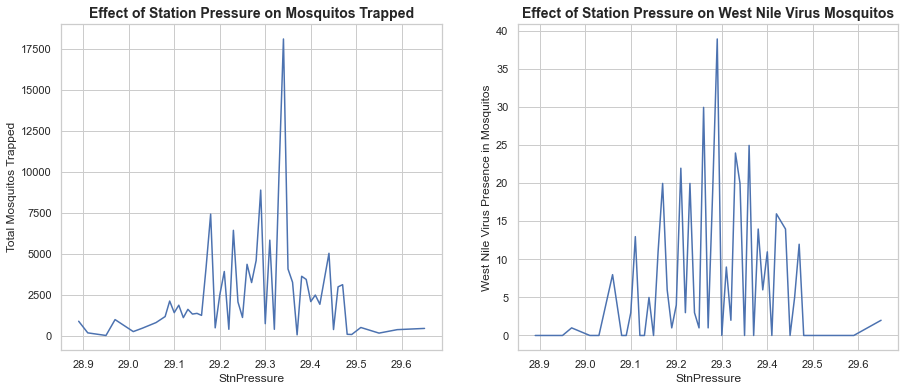

In [121]:
# Plot the effect of station pressure on mosquitos
title_list = ['Effect of Station Pressure on Mosquitos Trapped', 'Effect of Station Pressure on West Nile Virus Mosquitos' ]
subplot_line(station_pressure, title_list, 'StnPressure')

- Station pressure between 29.1 to 29.4 seems to have an influence in the number of mosquitos trapped and WNV presence.

In [122]:
# Subset sea level data
sea_level = df_merged[['SeaLevel', 'TotMosquitos', 'WnvPresent']].groupby('SeaLevel').sum()
sea_level

TotMosquitos  WnvPresent
SeaLevel                          
29.59               18           0
29.60              885           0
29.62              746           1
29.63              177           0
29.68              462           0
29.70              239           0
29.71              184           0
29.73              255           0
29.74             1046           3
29.75              120           0
29.76             1650           8
29.77               55           0
29.78               69           0
29.79             2174           0
29.80              124           0
29.81             6651          12
29.82             5581          16
29.83             3401           3
29.84              542           0
29.85             1276           2
29.86             2030           0
29.87             5748          26
29.88              685           0
29.89             4389          37
29.90              629           2
29.91             4562          19
29.92             1934           1
29.93             6442          21
29.94             3279          10
29.95            13355          16
29.96             3762          18
29.97             1590          11
29.98            16446          28
29.99             5692           2
30.00             3616          23
30.01             1824          10
30.03              900           2
30.04             3643           6
30.05             7578          31
30.06             1091           5
30.07              904           1
30.08             2467           2
30.09             5804           5
30.10             2209           3
30.11             4133          23
30.12              406           3
30.13             1985          17
30.14               89           0
30.15              348           0
30.16               40           1
30.17              505           0
30.18              238           0
30.21              162           0
30.22               78           0
30.33              821           2

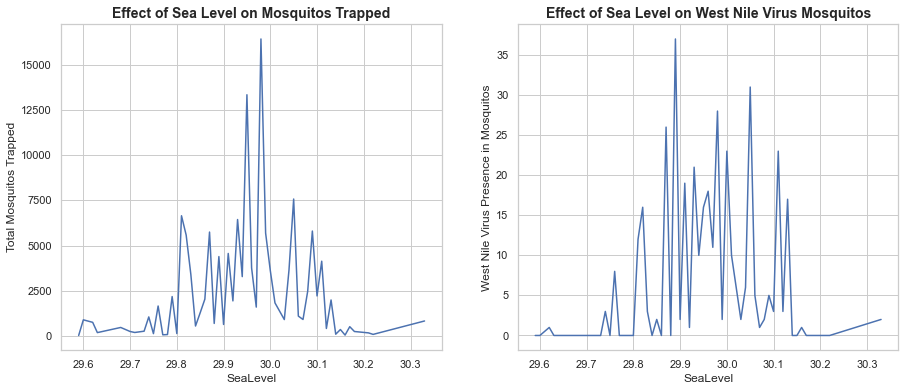

In [123]:
# Plot the effect of sea level on mosquitos
title_list = ['Effect of Sea Level on Mosquitos Trapped', 'Effect of Sea Level on West Nile Virus Mosquitos']
subplot_line(sea_level, title_list, 'SeaLevel')

- Sea level between 29.8 to 30.1 seems to have an influence in the number of mosquitos trapped and WNV presence.

In [124]:
# Subset result speed data
result_speed = df_merged[['ResultSpeed', 'TotMosquitos', 'WnvPresent']].groupby('ResultSpeed').sum()
result_speed

TotMosquitos  WnvPresent
ResultSpeed                          
0.1                   219           1
1.1                   344           2
1.2                   390           2
1.4                   373           0
1.5                  5393          12
1.8                   127           2
1.9                  1290           4
2.0                   316           2
2.1                  7152           4
2.2                   274           2
2.5                  1166          15
2.6                   448           2
2.7                  1160           1
2.8                   250           6
3.0                   123           0
3.1                   483           1
3.3                   509           1
3.4                  2917          16
3.5                  8904          21
3.6                   578           0
3.8                   642          14
3.9                  1976          10
4.0                  4876           7
4.1                  4300           5
4.2                  2148          19
4.3                  2268          11
4.4                   885           0
4.5                  1819          12
4.6                   900           2
4.7                  1451          13
4.8                   212           0
4.9                  3611          17
5.0                   740           0
5.1                  4512          15
5.2                   827           4
5.3                  1471           0
5.4                  1751           1
5.5                  2348          11
5.8                  2199          10
5.9                  1151           6
6.0                   657           0
6.1                  2266           2
6.2                  3803          18
6.3                  1715           3
6.4                  7687           7
6.5                  2898           2
6.6                  1013           0
6.8                  1514           9
7.0                   888           8
7.2                   494           0
7.3                   890           0
7.4                  1055           0
7.5                   345           0
7.6                  2775           4
7.7                   685           0
7.8                  6349           7
8.2                  1525           3
8.3                  1248           9
8.5                   452           0
8.6                  1397          12
8.7                   623           1
8.8                   530           0
8.9                   592           0
9.0                   746           1
9.1                  1742           2
9.2                  2091           4
9.3                   654           0
9.4                   394           0
9.5                   217           0
10.0                 2128           0
10.1                 1031           0
10.3                  709           0
10.5                 2635          19
10.6                  862           0
10.7                   85           0
11.4                  350           0
11.5                    1           0
12.1                  332           0
12.2                  885           0
12.5                  158           0
12.8                 1511           1
12.9                  234           0
13.3                 1350           3
13.4                 2836           4
14.6                  127           0
15.4                   57           0

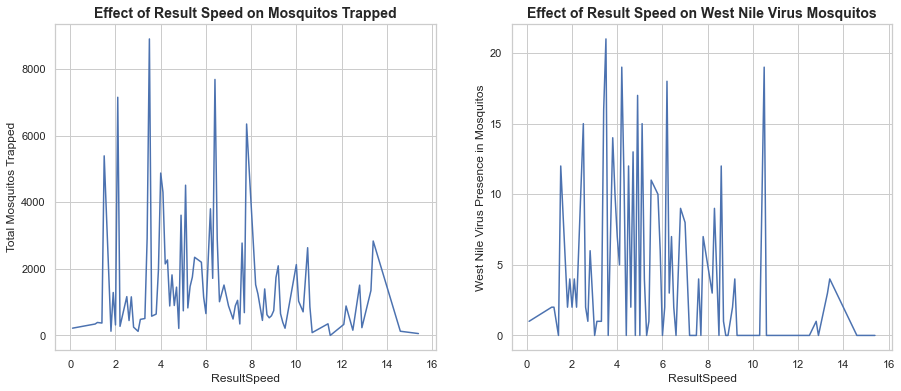

In [125]:
# Plot the effect of result speed on mosquitos
title_list = ['Effect of Result Speed on Mosquitos Trapped', 'Effect of Result Speed on West Nile Virus Mosquitos']
subplot_line(result_speed, title_list, 'ResultSpeed')

- Result speed between 3 to 8 seems to have an influence in the number of mosquitos trapped and WNV presence.

In [126]:
# Subset result direction data
result_direction = df_merged[['ResultDir', 'TotMosquitos', 'WnvPresent']].groupby('ResultDir').sum()
result_direction

TotMosquitos  WnvPresent
ResultDir                          
1                  4649           0
2                   228           0
3                  1536           2
4                  6740           4
5                  5828          36
6                  5759          15
7                  4185          16
8                  5940           8
9                  2585           5
10                 4093          24
11                 2818           1
12                  217           0
13                 7325           8
14                  669           1
15                  878           0
16                 2224          11
17                 5058          28
18                 1172          12
19                 6126          13
20                 3160          15
21                11407          25
22                 2842          20
23                14551          21
24                 7751          29
25                 6627          32
26                  802           1
27                 1117           2
28                  333           0
29                 4233          11
30                 5150           4
31                 2437           2
32                 1334           0
33                  219           1
34                 1508           9
35                 2001           9
36                 1537           5

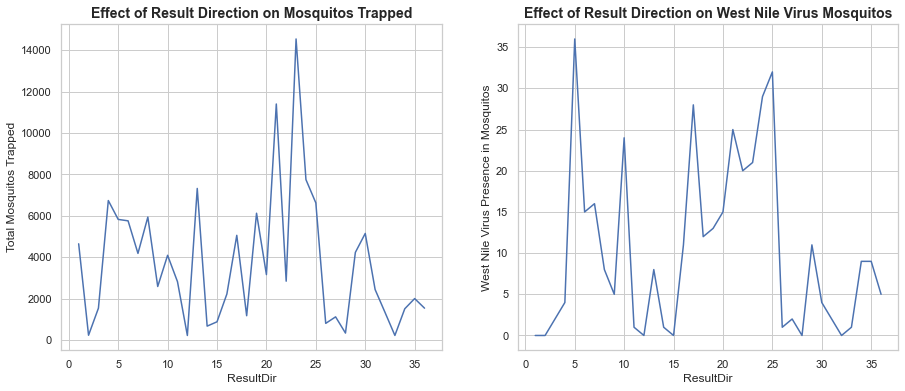

In [127]:
# Plot the effect of result direction on mosquitos
title_list = ['Effect of Result Direction on Mosquitos Trapped', 'Effect of Result Direction on West Nile Virus Mosquitos']
subplot_line(result_direction, title_list, 'ResultDir')

- Result direction between 5 to 10 and 19 to 25 seems to have an influence in the number of mosquitos trapped and WNV presence.

In [128]:
# Subset average speed data
ave_speed = df_merged[['AvgSpeed', 'TotMosquitos', 'WnvPresent']].groupby('AvgSpeed').sum()
ave_speed

TotMosquitos  WnvPresent
AvgSpeed                          
2.1                219           1
2.7                344           2
3.3                597           1
3.4                266           2
3.7               6485           5
3.8                286           0
3.9               1160           1
4.0                316           2
4.1                867           3
4.2                419           2
4.3                250           6
4.6               2517          16
4.7               1503          10
4.8               1923           3
4.9               1050           5
5.0               1588          14
5.1                814           0
5.2                305           1
5.4               3378           3
5.5                955           3
5.6               2766           3
5.7               4555           0
5.8               2512          17
5.9               2070           8
6.0               5791          53
6.1               1115           1
6.2                430           0
6.3               1029           1
6.4               4669           1
6.5               1344           0
6.6                656           1
6.7               4491           8
6.8               1632           0
7.0               6571          31
7.1               4847          35
7.2               3877           2
7.3               1853          12
7.4               3397           4
7.5                 92           0
7.6                 58           0
7.7                151           0
7.8               3256           4
7.9               1136           0
8.0               1948           0
8.1                482           0
8.2                494           0
8.3               4907           2
8.4               5866          18
8.5               1662           3
8.6                111           2
8.7                584           0
8.8               1046           3
9.0               2487           8
9.2               1111           2
9.3               1812          14
9.4               2315           8
9.5                501           0
9.6               2743           3
9.7                 93           0
9.8               2662          10
9.9                217           0
10.0               676           5
10.1               798           0
10.4              1031           0
10.5              2590           0
10.6              1911           4
10.7               348           0
10.8              2653          17
10.9               751           2
11.0                85           0
11.2               848           0
11.6               239           0
11.9               352           0
12.7               885           0
12.8               159           0
13.0              1511           1
13.1               234           0
13.3               332           0
13.9              2818           4
14.0              1350           3
14.1                18           0
14.4               685           0
15.0               127           0
16.3                57           0

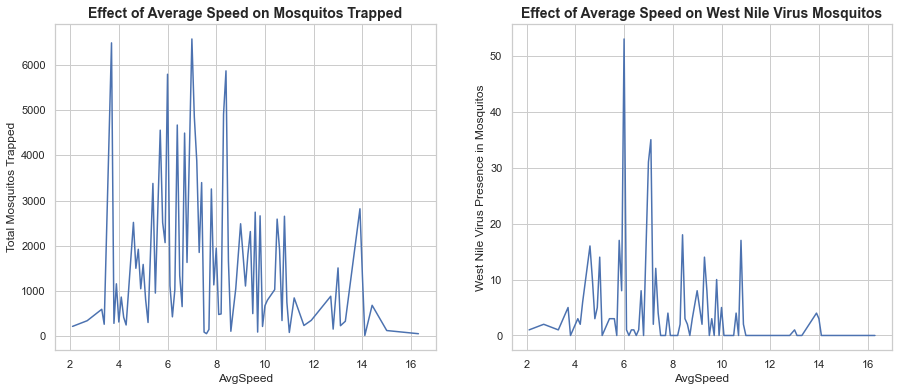

In [129]:
# Plot the effect of average speed on mosquitos
title_list = ['Effect of Average Speed on Mosquitos Trapped', 'Effect of Average Speed on West Nile Virus Mosquitos']
subplot_line(ave_speed, title_list, 'AvgSpeed')

- Result direction between 4 to 10 seems to have an influence in the number of mosquitos trapped and WNV presence.

In [130]:
df_merged.columns

Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent', 'TotMosquitos', 'Station', 'Year',
       'Month', 'Week', 'Year Month', 'Tmax', 'Tmin', 'Tavg', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'PrecipTotal',
       'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed',
       'CsDZ', 'CsTS', 'CsHZ', 'CsRA', 'CsVCTS', 'CsNA', 'CsFG', 'CsTSRA',
       'CsBR'],
      dtype='object')

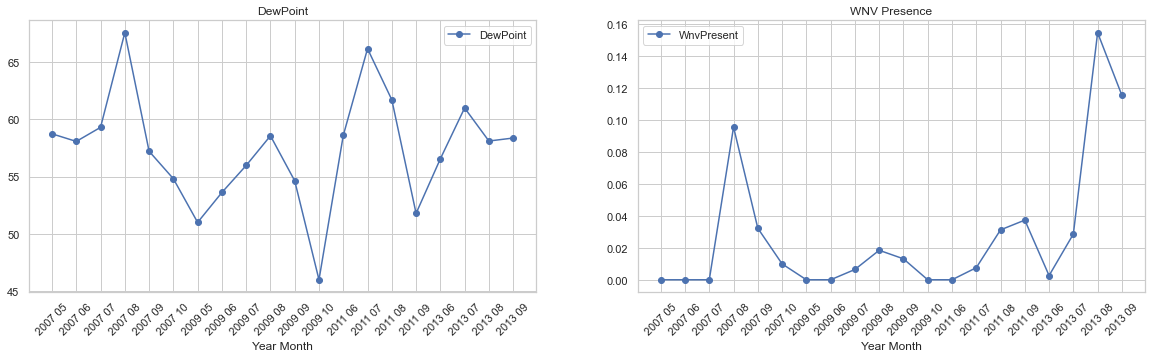

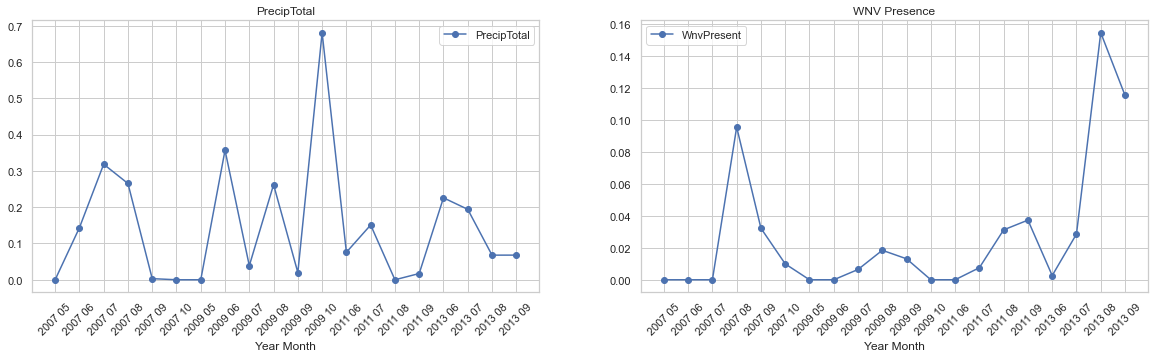

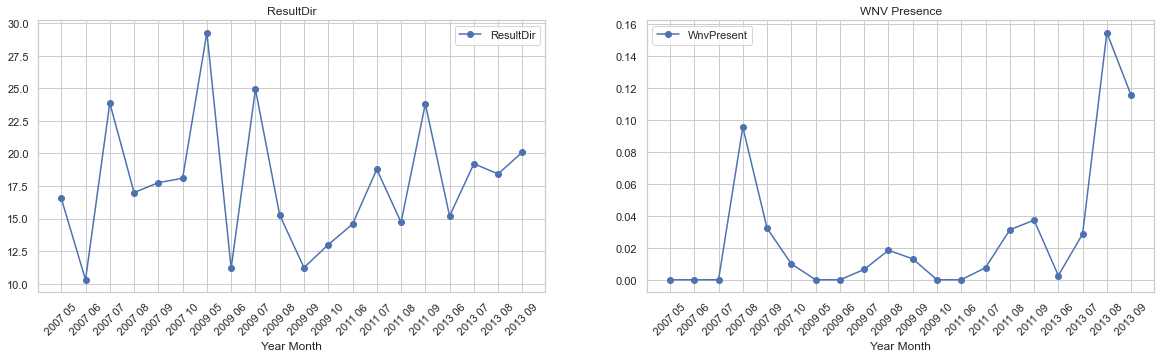

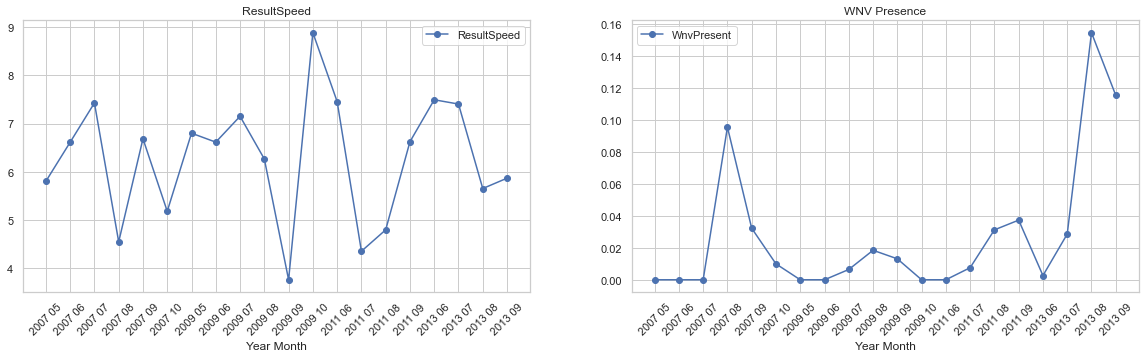

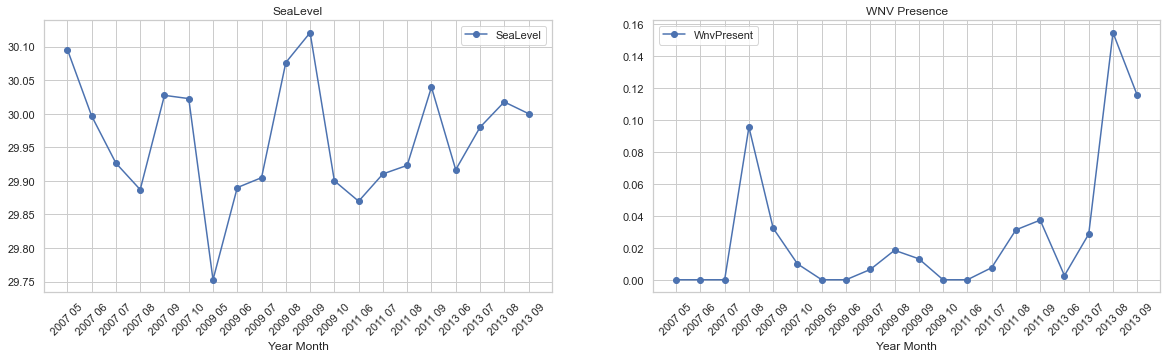

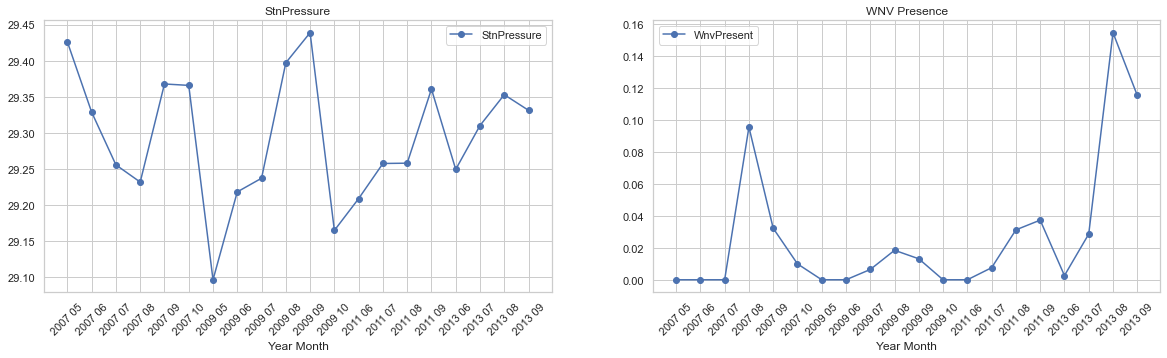

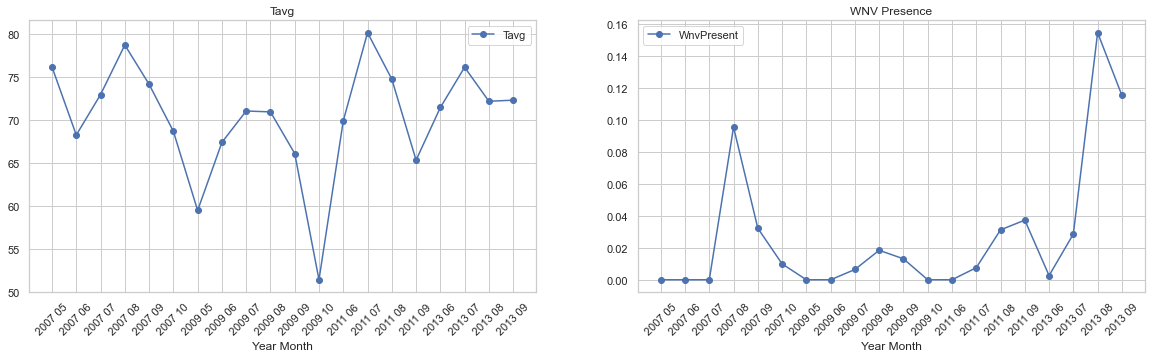

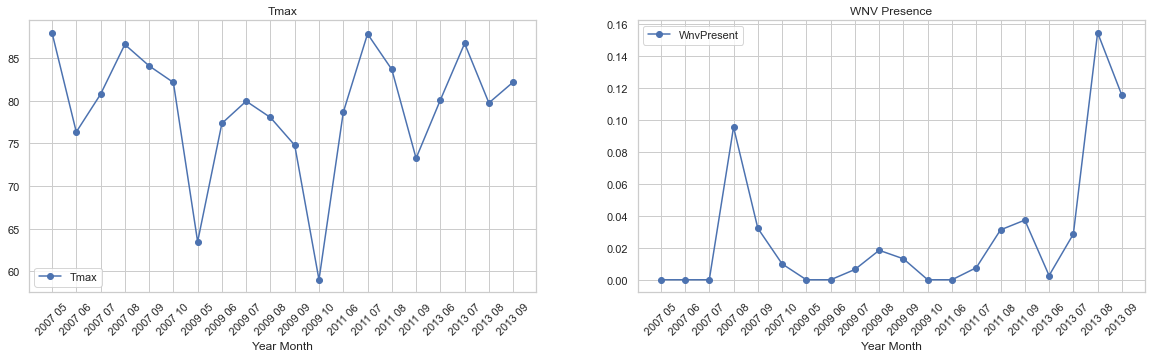

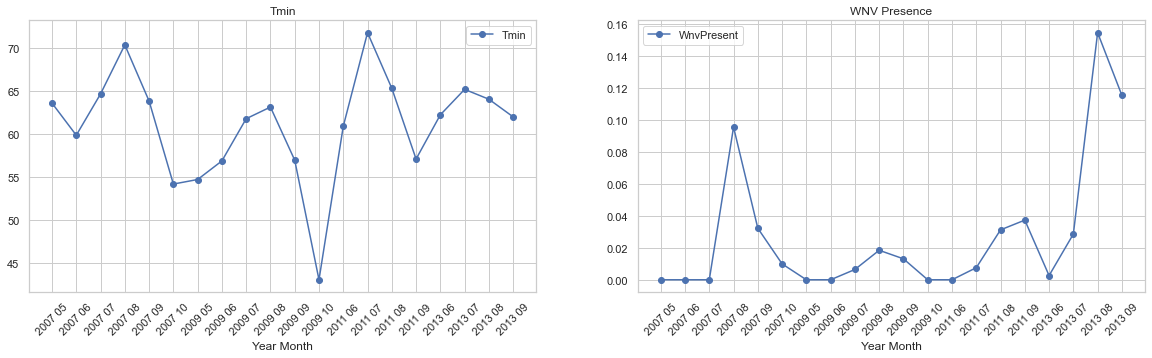

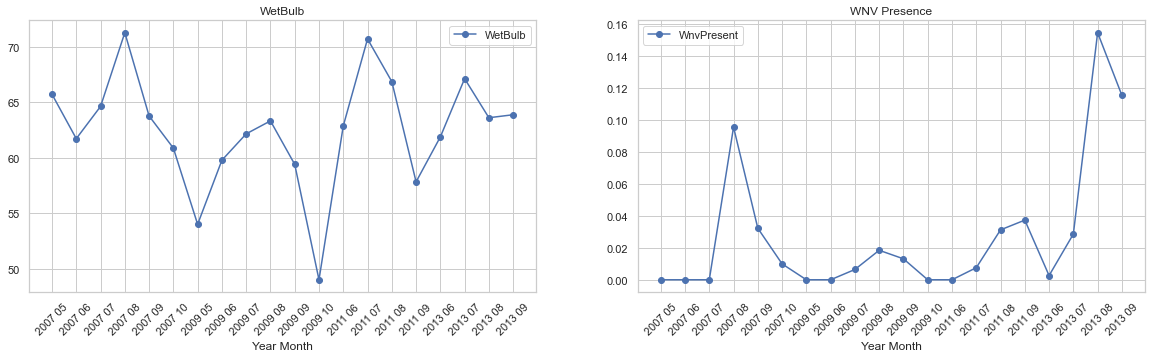

In [131]:
# Subset the features for trend plotting
df = pd.DataFrame(pd.pivot_table(data=df_merged, index='Year Month', values=['WnvPresent', 'Tmin', 'Tmax', 'Tavg', 
                                                                             'DewPoint', 'WetBulb', 'PrecipTotal', 
                                                                             'StnPressure', 'SeaLevel', 'ResultSpeed',
                                                                             'ResultDir', 'AvgSpeed'], aggfunc=np.mean).to_records())

# Plot the trends for each feature for comparison
features = df.drop(['Year Month', 'WnvPresent'],axis='columns').columns.tolist()
for feature in features:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5), sharex=True)
    df.plot(x='Year Month', y= feature, marker='o', title=feature, ax=axes[0])
    groupby_list = df['Year Month'].unique().tolist()
    axes[0].set_xticks(np.arange(len(groupby_list)), labels = groupby_list, rotation=45)
    df.plot(x='Year Month', y='WnvPresent', marker='o', title='WNV Presence', ax=axes[1])
    axes[1].set_xticks(np.arange(len(groupby_list)), labels = groupby_list, rotation=45)

- There may be a lag effect in how weather variables could lead to a higher incidence of virus. For example, in 2009 and 2011, the number of cases of West Nile Virus (WNV) peaked in August when the average temperatures peaked in July. 




In [132]:
# create a temporary dataframe and drop categorical data and variables that are not present in test set
df = df_merged.drop(['Date', 'Address', 'Block', 'Street', 'AddressNumberAndStreet', 'AddressAccuracy', 'TotMosquitos', 
                     'NumMosquitos', 'Year', 'Month', 'Week', 'Year Month', 'Station', 'Latitude', 'Longitude'], axis=1)
df.head()

Species  Trap  WnvPresent  Tmax  Tmin  Tavg  DewPoint  \
0  CULEX PIPIENS/RESTUANS  T002           0    88    60  74.0        58   
1          CULEX RESTUANS  T002           0    88    60  74.0        58   
2          CULEX RESTUANS  T007           0    88    60  74.0        58   
3  CULEX PIPIENS/RESTUANS  T015           0    88    60  74.0        58   
4          CULEX RESTUANS  T015           0    88    60  74.0        58   

   WetBulb  Heat  Cool  Sunrise  Sunset  PrecipTotal  StnPressure  SeaLevel  \
0     65.0   0.0   9.0    421.0  1917.0          0.0        29.39     30.11   
1     65.0   0.0   9.0    421.0  1917.0          0.0        29.39     30.11   
2     65.0   0.0   9.0    421.0  1917.0          0.0        29.39     30.11   
3     65.0   0.0   9.0    421.0  1917.0          0.0        29.39     30.11   
4     65.0   0.0   9.0    421.0  1917.0          0.0        29.39     30.11   

   ResultSpeed  ResultDir  AvgSpeed  CsDZ  CsTS  CsHZ  CsRA  CsVCTS  CsNA  \
0          5.8         18       6.5     0     0     1     0       0     0   
1          5.8         18       6.5     0     0     1     0       0     0   
2          5.8         18       6.5     0     0     1     0       0     0   
3          5.8         18       6.5     0     0     1     0       0     0   
4          5.8         18       6.5     0     0     1     0       0     0   

   CsFG  CsTSRA  CsBR  
0     0       0     1  
1     0       0     1  
2     0       0     1  
3     0       0     1  
4     0       0     1

In [133]:
# Generate correlation matrix
df_corr = df.corr()
df_corr

WnvPresent      Tmax      Tmin      Tavg  DewPoint   WetBulb  \
WnvPresent     1.000000  0.040538  0.064211  0.055438  0.077191  0.071335   
Tmax           0.040538  1.000000  0.787675  0.950285  0.748658  0.870088   
Tmin           0.064211  0.787675  1.000000  0.939300  0.883809  0.928839   
Tavg           0.055438  0.950285  0.939300  1.000000  0.858377  0.948964   
DewPoint       0.077191  0.748658  0.883809  0.858377  1.000000  0.969030   
WetBulb        0.071335  0.870088  0.928839  0.948964  0.969030  1.000000   
Heat          -0.049437 -0.746801 -0.683241 -0.758291 -0.611135 -0.700402   
Cool           0.049025  0.889053  0.905362  0.948914  0.833772  0.909773   
Sunrise        0.094998 -0.116246 -0.176050 -0.154125 -0.095782 -0.125966   
Sunset        -0.062255  0.209131  0.268936  0.251262  0.190602  0.226476   
PrecipTotal    0.014124  0.048423  0.173225  0.116177  0.339267  0.247061   
StnPressure   -0.007296 -0.292762 -0.342969 -0.333021 -0.452148 -0.408770   
SeaLevel       0.006017 -0.340883 -0.432423 -0.404415 -0.497703 -0.465771   
ResultSpeed   -0.051089 -0.028215  0.055078  0.009037 -0.020352 -0.025368   
ResultDir      0.001822  0.183500  0.111872  0.157375  0.116789  0.132989   
AvgSpeed      -0.037906  0.008484  0.145891  0.075892  0.094645  0.068361   
CsDZ          -0.016705 -0.138950 -0.033324 -0.096495 -0.010449 -0.053924   
CsTS           0.027166  0.224862  0.341493  0.297217  0.463346  0.402903   
CsHZ           0.025035  0.171624  0.158892  0.175795  0.253966  0.214049   
CsRA           0.013198 -0.186239  0.118265 -0.043584  0.278483  0.128603   
CsVCTS        -0.034931  0.186023  0.170750  0.190367  0.241592  0.228736   
CsNA          -0.046332 -0.015009 -0.242426 -0.130798 -0.463963 -0.321372   
CsFG           0.071165  0.063141  0.079394  0.073647  0.092142  0.078750   
CsTSRA         0.030998  0.111792  0.258648  0.192111  0.373715  0.297695   
CsBR           0.040566 -0.010040  0.211816  0.099167  0.415467  0.279238   

                 Heat      Cool   Sunrise    Sunset  PrecipTotal  StnPressure  \
WnvPresent  -0.049437  0.049025  0.094998 -0.062255     0.014124    -0.007296   
Tmax        -0.746801  0.889053 -0.116246  0.209131     0.048423    -0.292762   
Tmin        -0.683241  0.905362 -0.176050  0.268936     0.173225    -0.342969   
Tavg        -0.758291  0.948914 -0.154125  0.251262     0.116177    -0.333021   
DewPoint    -0.611135  0.833772 -0.095782  0.190602     0.339267    -0.452148   
WetBulb     -0.700402  0.909773 -0.125966  0.226476     0.247061    -0.408770   
Heat         1.000000 -0.513850  0.187821 -0.263869    -0.015478     0.192527   
Cool        -0.513850  1.000000 -0.111910  0.202928     0.145390    -0.345049   
Sunrise      0.187821 -0.111910  1.000000 -0.961202    -0.132969     0.346180   
Sunset      -0.263869  0.202928 -0.961202  1.000000     0.117900    -0.371188   
PrecipTotal -0.015478  0.145390 -0.132969  0.117900     1.000000    -0.342029   
StnPressure  0.192527 -0.345049  0.346180 -0.371188    -0.342029     1.000000   
SeaLevel     0.243231 -0.414458  0.357123 -0.390192    -0.298077     0.956556   
ResultSpeed  0.016982  0.020112 -0.139710  0.088535     0.129145    -0.302665   
ResultDir   -0.131755  0.143325  0.048424 -0.003070    -0.018672    -0.277509   
AvgSpeed     0.013876  0.106586 -0.128251  0.090215     0.231200    -0.362862   
CsDZ        -0.042493 -0.147548  0.163315 -0.199569    -0.024563     0.105589   
CsTS        -0.092163  0.346510 -0.146323  0.137482     0.431222    -0.385663   
CsHZ        -0.092157  0.186729 -0.021641  0.028373     0.045976    -0.099712   
CsRA         0.115683 -0.001362 -0.085883  0.061165     0.494564    -0.238501   
CsVCTS      -0.070823  0.216231 -0.152131  0.158988     0.172627    -0.162522   
CsNA        -0.031759 -0.187493  0.083521 -0.090691    -0.448697     0.320287   
CsFG        -0.038366  0.078346  0.120155 -0.098153     0.029436     0.004427   
CsTSRA      -0.070105  0.218875 -0.107350  0.089287     0.470597  

Text(0.5, 1.0, 'Correlation Matrix')

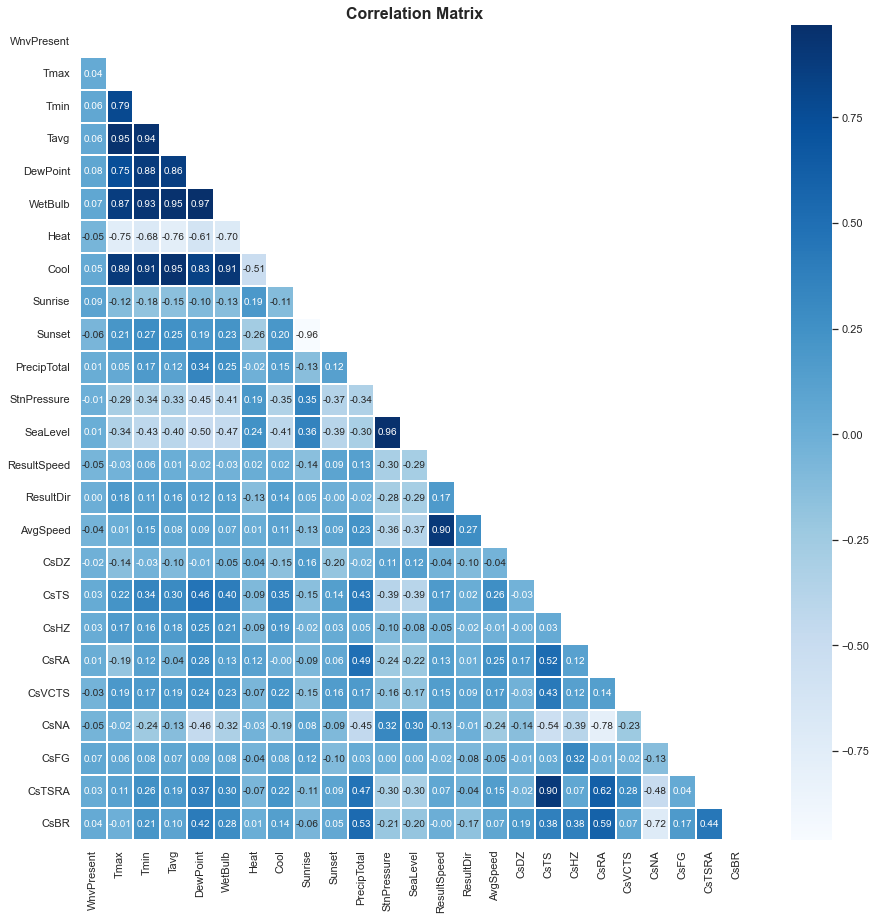

In [134]:
# Plot heatmap
plt.figure(figsize=(15,15))

# Create the matrix to mask the correlation matrix
matrix = np.triu(df_corr)
sns.heatmap(df_corr, annot=True, cmap='Blues', fmt='.2f', linewidths=2, mask=matrix, annot_kws={'fontsize':10})

# Set the label
plt.title('Correlation Matrix', loc='center', fontsize=16, fontweight='bold')

<AxesSubplot:title={'center':'Heatmap showing correlation of features with target'}>

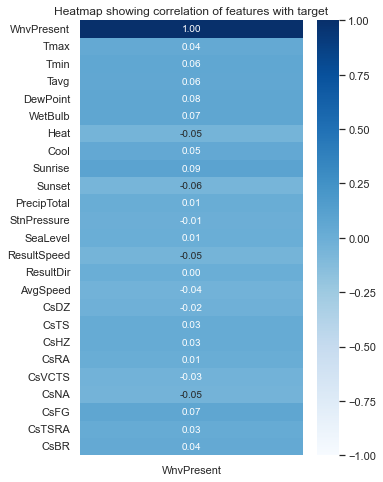

In [135]:
plt.figure(figsize=(5,8))
plt.title('Heatmap showing correlation of features with target')
sns.heatmap(df.corr()[['WnvPresent']], annot=True, cmap='Blues', fmt='.2f', annot_kws={'fontsize':10}, vmin=-1, vmax=1)

No significant correlation to the target as the target dataset is highly imbalanced.

### Spray Dataset

In [136]:
# Check the unique dates
df_spray['Date'].value_counts()

2013-08-15    2668
2013-08-29    2302
2013-07-17    2202
2011-09-07    2114
2013-07-25    1607
2013-08-22    1587
2013-08-08    1195
2013-09-05     924
2013-08-16     141
2011-08-29      95
Name: Date, dtype: int64

In [137]:
df_spray.describe()

Latitude     Longitude
count  14835.000000  14835.000000
mean      41.904828    -87.736690
std        0.104381      0.067292
min       41.713925    -88.096468
25%       41.785001    -87.794225
50%       41.940075    -87.727853
75%       41.980978    -87.694108
max       42.395983    -87.586727

In [138]:
# Create year, month, week and year month for spray dataset
date_creation(df_spray, 'Date')

In [139]:
df_spray['Spray'] = np.ones((len(df_spray),), dtype = 'int')

In [140]:
df_spray.head()

Date        Time   Latitude  Longitude  Year  Month  Week Year Month  \
0 2011-08-29  6:56:58 PM  42.391623 -88.089163  2011      8    35    2011 08   
1 2011-08-29  6:57:08 PM  42.391348 -88.089163  2011      8    35    2011 08   
2 2011-08-29  6:57:18 PM  42.391022 -88.089157  2011      8    35    2011 08   
3 2011-08-29  6:57:28 PM  42.390637 -88.089158  2011      8    35    2011 08   
4 2011-08-29  6:57:38 PM  42.390410 -88.088858  2011      8    35    2011 08   

   Spray  
0      1  
1      1  
2      1  
3      1  
4      1

Location with 42.395983 and -88.096468 seems a bit far off from the others. We plot the spray locations to confirm.

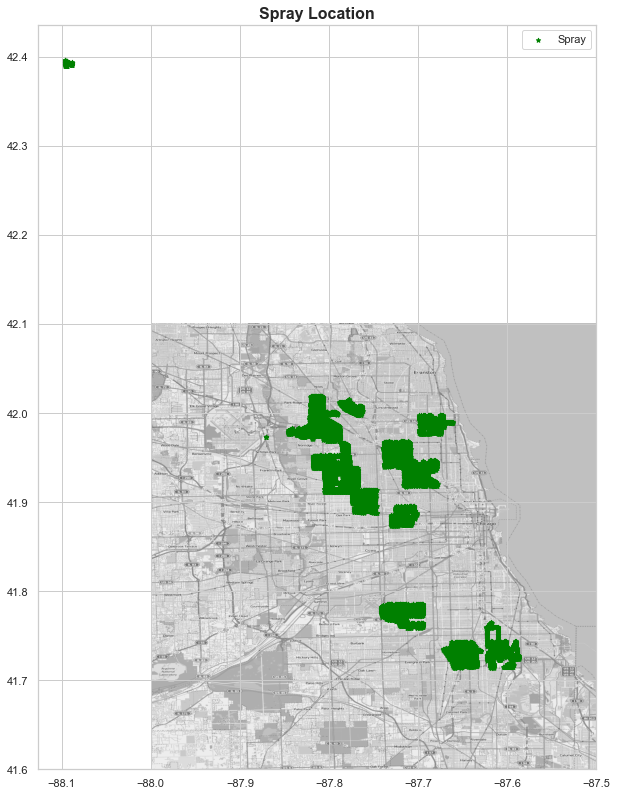

In [141]:
# Plot the spray location
origin = [41.6, -88.0]              # lat/long of origin (lower left corner)
upperRight = [42.1, -87.5]          # lat/long of upper right corner

mapdata = np.loadtxt("../data/mapdata_copyright_openstreetmap_contributors.txt")

# generate map plot
plt.figure(figsize=(10,14))
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])

# Spray location
plt.scatter(df_spray['Longitude'], df_spray['Latitude'], c='green', marker='*', s=20, label='Spray')

plt.title('Spray Location', fontsize=16, fontweight='bold')
plt.legend()

In [142]:
df_spray[df_spray['Latitude']>42.3]

Date        Time   Latitude  Longitude  Year  Month  Week Year Month  \
0  2011-08-29  6:56:58 PM  42.391623 -88.089163  2011      8    35    2011 08   
1  2011-08-29  6:57:08 PM  42.391348 -88.089163  2011      8    35    2011 08   
2  2011-08-29  6:57:18 PM  42.391022 -88.089157  2011      8    35    2011 08   
3  2011-08-29  6:57:28 PM  42.390637 -88.089158  2011      8    35    2011 08   
4  2011-08-29  6:57:38 PM  42.390410 -88.088858  2011      8    35    2011 08   
5  2011-08-29  6:57:48 PM  42.390395 -88.088315  2011      8    35    2011 08   
6  2011-08-29  6:57:58 PM  42.390673 -88.088002  2011      8    35    2011 08   
7  2011-08-29  6:58:08 PM  42.391027 -88.088002  2011      8    35    2011 08   
8  2011-08-29  6:58:18 PM  42.391403 -88.088003  2011      8    35    2011 08   
9  2011-08-29  6:58:28 PM  42.391718 -88.087995  2011      8    35    2011 08   
10 2011-08-29  6:58:38 PM  42.392038 -88.087988  2011      8    35    2011 08   
11 2011-08-29  6:58:48 PM  42.392410 -88.088078  2011      8    35    2011 08   
12 2011-08-29  6:58:58 PM  42.392800 -88.088332  2011      8    35    2011 08   
13 2011-08-29  6:59:08 PM  42.393257 -88.088370  2011      8    35    2011 08   
14 2011-08-29  6:59:18 PM  42.393600 -88.088232  2011      8    35    2011 08   
15 2011-08-29  7:00:08 PM  42.393203 -88.088417  2011      8    35    2011 08   
16 2011-08-29  7:00:18 PM  42.392792 -88.088312  2011      8    35    2011 08   
17 2011-08-29  7:00:28 PM  42.392477 -88.088210  2011      8    35    2011 08   
18 2011-08-29  7:00:38 PM  42.392385 -88.088697  2011      8    35    2011 08   
19 2011-08-29  7:00:48 PM  42.392098 -88.089113  2011      8    35    2011 08   
20 2011-08-29  7:00:58 PM  42.392180 -88.089498  2011      8    35    2011 08   
21 2011-08-29  7:01:08 PM  42.392428 -88.089790  2011      8    35    2011 08   
22 2011-08-29  7:01:18 PM  42.392722 -88.090042  2011      8    35    2011 08   
23 2011-08-29  7:01:28 PM  42.392958 -88.090300  2011      8    35    2011 08   
24 2011-08-29  7:01:38 PM  42.392990 -88.090895  2011      8    35    2011 08   
25 2011-08-29  7:01:48 PM  42.393002 -88.091612  2011      8    35    2011 08   
26 2011-08-29  7:01:58 PM  42.393008 -88.092010  2011      8    35    2011 08   
27 2011-08-29  7:02:08 PM  42.393020 -88.092548  2011      8    35    2011 08   
28 2011-08-29  7:02:18 PM  42.393103 -88.093182  2011      8    35    2011 08   
29 2011-08-29  7:02:28 PM  42.393118 -88.093737  2011      8    35    2011 08   
30 2011-08-29  7:02:38 PM  42.393423 -88.093895  2011      8    35    2011 08   
31 2011-08-29  7:02:48 PM  42.393743 -88.094075  2011      8    35    2011 08   
32 2011-08-29  7:02:58 PM  42.394105 -88.094250  2011      8    35    2011 08   
33 2011-08-29  7:03:08 PM  42.394478 -88.094223  2011      8    35    2011 08   
34 2011-08-29  7:03:18 PM  42.394860 -88.094198  2011      8    35    2011 08   
35 2011-08-29  7:03:28 PM  42.395085 -88.094515  2011      8    35    2011 08   
36 2011-08-29  7:03:38 PM  42.395095 -88.095027  2011      8    35    2011 08   
37 2011-08-29  7:03:48 PM  42.395078 -88.095520  2011      8    35    2011 08   
38 2011-08-29  7:03:58 PM  42.395352 -88.095772  2011      8    35    2011 08   
39 2011-08-29  7:04:08 PM  42.395697 -88.095833  2011      8    35    2011 08   
40 2011-08-29  7:04:18 PM  42.395983 -88.095757  2011      8    35    2011 08   
41 2011-08-29  7:04:48 PM  42.395218 -88.095685  2011      8    35    2011 08   
42 2011-08-29  7:04:58 PM  42.394932 -88.095555  2011      8    35    2011 08   
43 2011-08-29  7:05:08 PM  42.394617 -88.095597  2011      8    35    2011 08   
44 2011-08-29  7:05:18 PM  42.394290 -88.095600  2011      8    35    2011 08   
45 2011-08-29  7:05:28 PM  42.393957 -88.095485  2011      8    35    2011 08   
46 2011-08-29  7:05:38 PM  42.393673 -88.095372  2011      8    35    2011 08   
47 2011-08-29  7:05:48 PM  42.393332 -88.095222  2011      8    35    2011 08   
48 2011-08-29  7:05:58 PM  42.393037 -88

One of the spray locations were found to be far off the other locations and they were recorded on 29 Aug 2011. The location data could be an error and we will exclude them from the visualization.

In [143]:
# Exclude out 2011-08-29 spray data for these plots
df_spray = df_spray[df_spray['Date']!='2011-08-29']

In [144]:
df_spray[df_spray['Latitude']>42.3]

Empty DataFrame
Columns: [Date, Time, Latitude, Longitude, Year, Month, Week, Year Month, Spray]
Index: []

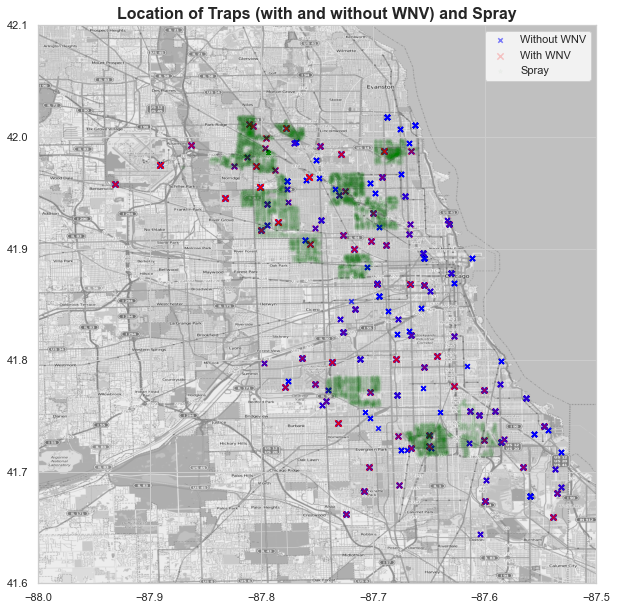

In [145]:
# Re-plot the spray location together with the traps
origin = [41.6, -88.0]              # lat/long of origin (lower left corner)
upperRight = [42.1, -87.5]          # lat/long of upper right corner

mapdata = np.loadtxt('../data/mapdata_copyright_openstreetmap_contributors.txt')

# generate data to overlay
trap_wnv = df_train.loc[df_train['WnvPresent']==1]
trap_wo_wnv = df_train.loc[df_train['WnvPresent']==0]

station_1 = [41.995, -87.933]
station_2 = [41.786, -87.752]

# generate map plot
plt.figure(figsize=(10,14))
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])

# Location of traps
plt.scatter(trap_wo_wnv['Longitude'], trap_wo_wnv['Latitude'], c='blue', marker='x', s=20, alpha=0.5, label='Without WNV')
plt.scatter(trap_wnv['Longitude'], trap_wnv['Latitude'], c='red', marker='x', s=40, alpha=0.2, label='With WNV')

# Spray location
plt.scatter(df_spray['Longitude'], df_spray['Latitude'], c='green', marker='*', s=20, alpha=0.02, label='Spray')

plt.title('Location of Traps (with and without WNV) and Spray', fontsize=16, fontweight='bold')
plt.legend()

The spray locations are near the 2 clusters locations.

In [146]:
virus_7 = df_train[df_train['Month'] == 7].groupby(['Latitude','Longitude']).sum()
virus_8 = df_train[df_train['Month'] == 8].groupby(['Latitude','Longitude']).sum()
virus_9 = df_train[df_train['Month'] == 9].groupby(['Latitude','Longitude']).sum()

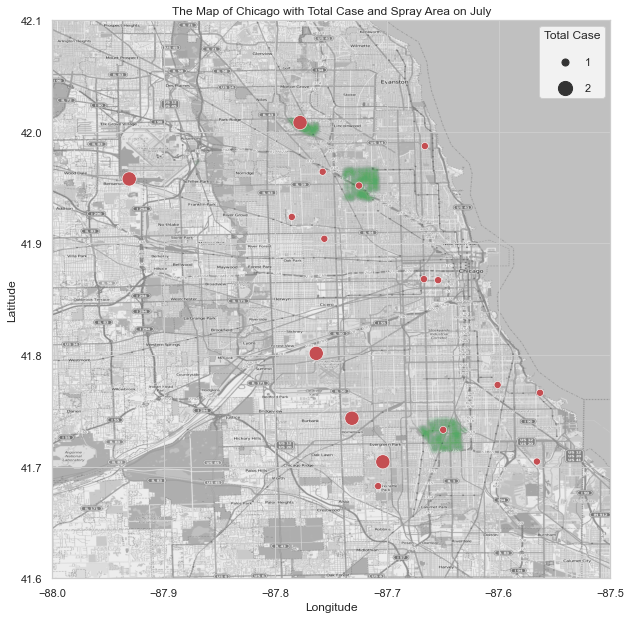

In [147]:
origin = [41.6, -88.0]              # lat/long of origin (lower left corner)
upperRight = [42.1, -87.5]          # lat/long of upper right corner

mapdata = np.loadtxt('../data/mapdata_copyright_openstreetmap_contributors.txt')

# Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level
# Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level
station1 = (41.995, -87.933)
station2 = (41.786, -87.752)

# generate plot
plt.figure(figsize=(10,14))
plt.imshow(mapdata, cmap = plt.get_cmap('gray'), extent = [origin[1], upperRight[1], origin[0], upperRight[0]])
sns.scatterplot(x = 'Longitude', y = 'Latitude', data = df_spray[df_spray['Month'] == 7], ec = None, 
                color = 'g', linewidth = 0, alpha=0.02)
sns.scatterplot(x = 'Longitude', y = 'Latitude', data = virus_7[virus_7['WnvPresent'] > 0], ec = None, 
                color = 'r', size = 'WnvPresent', sizes = (50, 200))

plt.title('The Map of Chicago with Total Case and Spray Area on July')

plt.legend(title = 'Total Case', labelspacing = 1.5)

In July, we can see that the spray control has been done in 3 different areas. Meanwhile, cases are popping all over the city. 

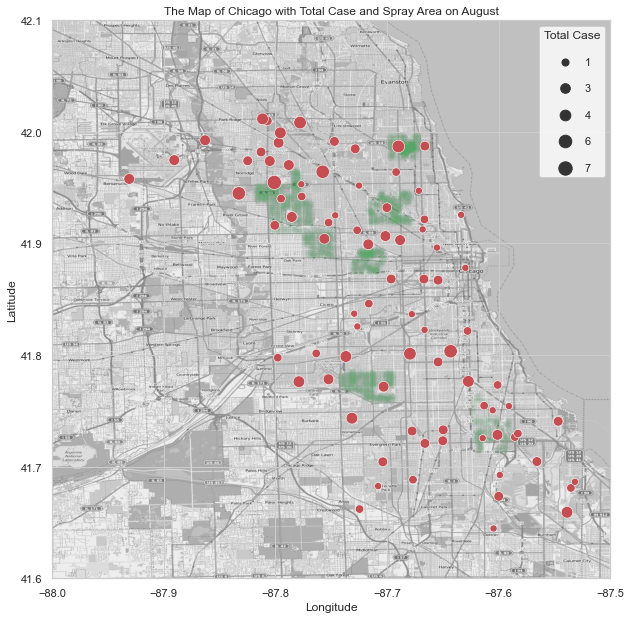

In [148]:
origin = [41.6, -88.0]              # lat/long of origin (lower left corner)
upperRight = [42.1, -87.5]          # lat/long of upper right corner

mapdata = np.loadtxt('../data/mapdata_copyright_openstreetmap_contributors.txt')

# Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level
# Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level
station1 = (41.995, -87.933)
station2 = (41.786, -87.752)

# generate plot
plt.figure(figsize=(10,14))
plt.imshow(mapdata, cmap = plt.get_cmap('gray'), extent = [origin[1], upperRight[1], origin[0], upperRight[0]])
sns.scatterplot(x = 'Longitude', y = 'Latitude', data = df_spray[df_spray['Month'] == 8], ec = None, 
                color = 'g', linewidth = 0, alpha=0.02)
sns.scatterplot(x = 'Longitude', y = 'Latitude', data = virus_8[virus_8['WnvPresent'] > 0], ec = None, 
                color = 'r', size = 'WnvPresent', sizes = (50, 200))

plt.title('The Map of Chicago with Total Case and Spray Area on August')

plt.legend(title = 'Total Case', labelspacing = 1.5)

In August, the similar trend of July continues. Less spray control over the cases found in the areas.

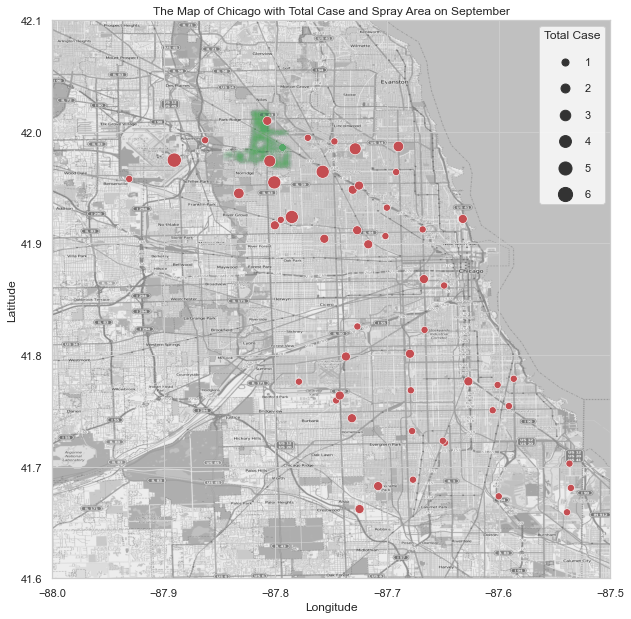

In [149]:
origin = [41.6, -88.0]              # lat/long of origin (lower left corner)
upperRight = [42.1, -87.5]          # lat/long of upper right corner

mapdata = np.loadtxt('../data/mapdata_copyright_openstreetmap_contributors.txt')

# Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level
# Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level
station1 = (41.995, -87.933)
station2 = (41.786, -87.752)

# generate plot
plt.figure(figsize=(10,14))
plt.imshow(mapdata, cmap = plt.get_cmap('gray'), extent = [origin[1], upperRight[1], origin[0], upperRight[0]])
sns.scatterplot(x = 'Longitude', y = 'Latitude', data = df_spray[df_spray['Month'] == 9], ec = None, 
                color = 'g', linewidth = 0, alpha=0.02)
sns.scatterplot(x = 'Longitude', y = 'Latitude', data = virus_9[virus_9['WnvPresent'] > 0], ec = None, 
                color = 'r', size = 'WnvPresent', sizes = (50, 200))

plt.title('The Map of Chicago with Total Case and Spray Area on September')

plt.legend(title = 'Total Case', labelspacing = 1.5)

**Remarks:**  
- During the month of September which is the peak of the case emergence, the government only done the mosquito control on one part of neighbourhood, while there are multiple sightings in other areas as well . 
- Based on the observation, it suggests that the government initate the mosquito control after there is initial sighting or report of virus case around the area instead of the initial sighting of mosquitoes. This may allow for mosquitoes to spread to different parts of the city and start new breeding. This resulted in more mosquitoes in different areas, thus reflecting the increase in cases as well. 

## Feature Engineering

### Relative Humidity

Relative humidity is one of the factors that influence the breed of the mosquitos. We will add this as a new feature to the dataset. 

https://www.omnicalculator.com/physics/relative-humidity

In [150]:
# Create a function to convert farenheit to celcius
def convert_farenheit_to_celcius(x):
    temp = (x - 32) / 1.8
    return temp

In [151]:
# Create a function to calculate relative humidity
def relative_humidity(avg_temp, dew_point):
    avg_temp = convert_farenheit_to_celcius(avg_temp)
    dew_point = convert_farenheit_to_celcius(dew_point)
    e0 = np.exp((17.625 * dew_point) / (243.04 + dew_point))
    e1 = np.exp((17.625 * avg_temp) / (243.04 + avg_temp))
    return 100 * (e0 / e1)

In [152]:
# Create a column for relative humidity
df_merged['RelativeHumidity']= df_merged.apply(lambda x: relative_humidity(x['Tavg'], x['DewPoint']), axis=1)

In [153]:
df_merged.head()

Date                                            Address  \
0 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2 2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
3 2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
4 2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2          CULEX RESTUANS     62    N MANDELL AVE  T007   
3  CULEX PIPIENS/RESTUANS     79     W FOSTER AVE  T015   
4          CULEX RESTUANS     79     W FOSTER AVE  T015   

              AddressNumberAndStreet   Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
2   6200  N MANDELL AVE, Chicago, IL  41.994991 -87.769279                9   
3    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   
4    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   

   NumMosquitos  WnvPresent  TotMosquitos  Station  Year  Month  Week  \
0             1           0             1      1.0  2007      5    22   
1             1           0             1      1.0  2007      5    22   
2             1           0             1      1.0  2007      5    22   
3             1           0             1      1.0  2007      5    22   
4             4           0             4      1.0  2007      5    22   

  Year Month  Tmax  Tmin  Tavg  DewPoint  WetBulb  Heat  Cool  Sunrise  \
0    2007 05    88    60  74.0        58     65.0   0.0   9.0    421.0   
1    2007 05    88    60  74.0        58     65.0   0.0   9.0    421.0   
2    2007 05    88    60  74.0        58     65.0   0.0   9.0    421.0   
3    2007 05    88    60  74.0        58     65.0   0.0   9.0    421.0   
4    2007 05    88    60  74.0        58     65.0   0.0   9.0    421.0   

   Sunset  PrecipTotal  StnPressure  SeaLevel  ResultSpeed  ResultDir  \
0  1917.0          0.0        29.39     30.11          5.8         18   
1  1917.0          0.0        29.39     30.11          5.8         18   
2  1917.0          0.0        29.39     30.11          5.8         18   
3  1917.0          0.0        29.39     30.11          5.8         18   
4  1917.0          0.0        29.39     30.11          5.8         18   

   AvgSpeed  CsDZ  CsTS  CsHZ  CsRA  CsVCTS  CsNA  CsFG  CsTSRA  CsBR  \
0       6.5     0     0     1     0       0     0     0       0     1   
1       6.5     0     0     1     0       0     0     0       0     1   
2       6.5     0     0     1     0       0     0     0       0     1   
3       6.5     0     0     1     0       0     0     0       0     1   
4       6.5     0     0     1     0       0     0     0       0     1   

   RelativeHumidity  
0         57.398449  
1         57.398449  
2         57.398449  
3         57.398449  
4         57.398449

In [154]:
# Subset relative humidity data
relative_humidity = df_merged[['RelativeHumidity', 'TotMosquitos', 'WnvPresent']].groupby('RelativeHumidity').sum()
relative_humidity

TotMosquitos  WnvPresent
RelativeHumidity                          
42.229347                  212           0
42.542876                 1157           0
45.541365                  204           0
46.345390                  207           0
48.152483                  332           0
...                        ...         ...
83.602820                   92           0
86.072117                   80           0
86.624963                  337           0
86.837168                   90           0
86.889451                   85           0

[147 rows x 2 columns]

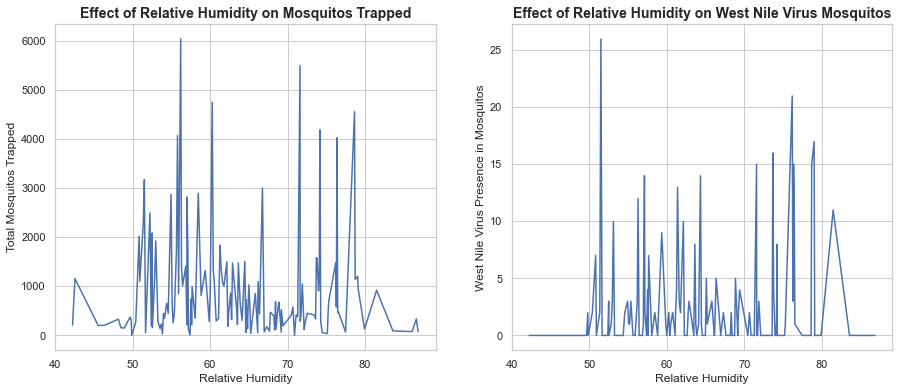

In [155]:
# Plot the effect of relative humidity on mosquitos
title_list = ['Effect of Relative Humidity on Mosquitos Trapped', 'Effect of Relative Humidity on West Nile Virus Mosquitos' ]
subplot_line(relative_humidity, title_list, 'Relative Humidity')

### Night Time

Mosquitos are active at night. We will add in a new feature night time. Night time is calculated based on 24 hours minus the difference between for sunrise and sunset hours.
https://www.terminix.com/mosquitoes/facts/when-are-mosquitoes-active/

In [156]:
# Function to covert time to float
def conv_hour(time):
    # Extract the last two digits (as minutes)
    time = time / 100
    minutes = (time % 1) * 100

    # Convert minute to decimal representation
    conv_min = minutes / 60
    
    # Extract the first two digits (as hours)
    hour = round(time - conv_min, 0)

    # Return time in float
    return hour + conv_min

In [157]:
df_merged['SunsetHour'] = df_merged['Sunset'].apply(lambda x: conv_hour(x))
df_merged['SunriseHour'] = df_merged['Sunrise'].apply(lambda x: conv_hour(x))

df_merged['NightTime'] = 24 - (df_merged['SunsetHour'] - df_merged['SunriseHour'])
df_merged.head(2)

Date                                            Address  \
0 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   

              AddressNumberAndStreet  Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   

   NumMosquitos  WnvPresent  TotMosquitos  Station  Year  Month  Week  \
0             1           0             1      1.0  2007      5    22   
1             1           0             1      1.0  2007      5    22   

  Year Month  Tmax  Tmin  Tavg  DewPoint  WetBulb  Heat  Cool  Sunrise  \
0    2007 05    88    60  74.0        58     65.0   0.0   9.0    421.0   
1    2007 05    88    60  74.0        58     65.0   0.0   9.0    421.0   

   Sunset  PrecipTotal  StnPressure  SeaLevel  ResultSpeed  ResultDir  \
0  1917.0          0.0        29.39     30.11          5.8         18   
1  1917.0          0.0        29.39     30.11          5.8         18   

   AvgSpeed  CsDZ  CsTS  CsHZ  CsRA  CsVCTS  CsNA  CsFG  CsTSRA  CsBR  \
0       6.5     0     0     1     0       0     0     0       0     1   
1       6.5     0     0     1     0       0     0     0       0     1   

   RelativeHumidity  SunsetHour  SunriseHour  NightTime  
0         57.398449   19.283333         4.35   9.066667  
1         57.398449   19.283333         4.35   9.066667

In [158]:
# Subset night time data
night_time = df_merged[['NightTime', 'TotMosquitos', 'WnvPresent']].groupby('NightTime').sum()
night_time

TotMosquitos  WnvPresent
NightTime                          
8.766667           2020           0
8.766667           3017           0
8.783333           2283           0
8.800000           2015           0
8.800000           3855           1
8.816667           1204           0
8.816667            240           0
8.833333            429           0
8.883333            719           0
8.883333            360           0
8.900000            384           0
8.916667           1833           0
8.933333            996           0
8.950000            348           0
8.966667           3194           0
8.983333           4796           6
8.983333            663           0
9.016667           1369           0
9.050000           2497           0
9.066667             40           0
9.083333            190           0
9.100000           1893           0
9.133333            853           0
9.166667           4855           7
9.300000           1215           1
9.333333           8492           2
9.383333           1729           2
9.450000           1408           3
9.516667           1159           1
9.566667           9769          20
9.600000           2898           2
9.633333            204           0
9.700000           1065           3
9.783333           2658          11
9.816667           7374          30
9.850000            507           1
9.966667            824           6
10.016667           602           2
10.083333          6607          48
10.133333          4555           0
10.166667          1915           2
10.250000           589           2
10.333333          1667          29
10.383333          6575          41
10.483333          1478          21
10.516667           691           4
10.566667           490           3
10.616667           175           0
10.650000          4748           2
10.700000          2645          24
10.833333           319           4
10.866667           551           3
10.916667           129           1
10.966667           524           8
11.000000          2021           7
11.050000          4021          21
11.316667          4137          26
11.416667           563           3
11.533333           821           2
11.583333           743           0
11.650000           392           0
11.683333          2786           9
11.866667           728           5
11.916667          1570           0
11.966667          1035           1
12.016667           505           4
12.200000           184           0
12.233333           212           0
12.383333          1373           2
12.616667           333           0

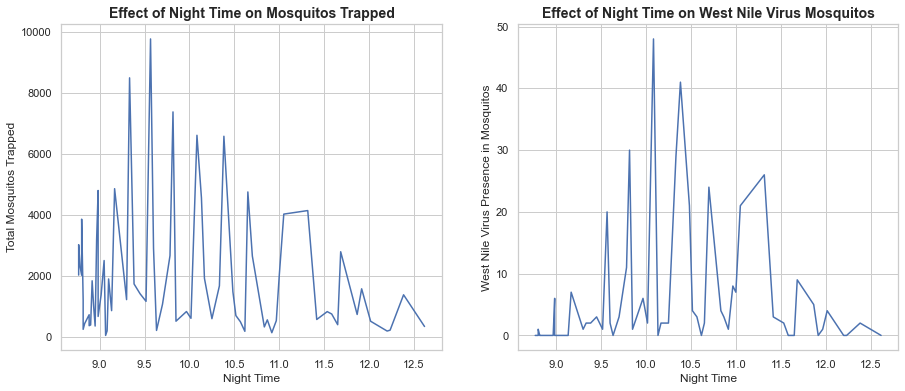

In [159]:
# Plot the effect of night time on mosquitos
title_list = ['Effect of Night Time on Mosquitos Trapped', 'Effect of Night Time on West Nile Virus Mosquitos' ]
subplot_line(night_time, title_list, 'Night Time')

### Day Time

Day time is also another factor that influence the breed of the mosquito ([*source*](https://parasitesandvectors.biomedcentral.com/track/pdf/10.1186/1756-3305-6-129.pdf)). We will add in a new feature day time. Day time is calculated based the difference between for sunrise and sunset hours


In [160]:
df_merged['DayTime'] = df_merged['SunsetHour'] - df_merged['SunriseHour']
df_merged.head(2)

Date                                            Address  \
0 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   

              AddressNumberAndStreet  Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   

   NumMosquitos  WnvPresent  TotMosquitos  Station  Year  Month  Week  \
0             1           0             1      1.0  2007      5    22   
1             1           0             1      1.0  2007      5    22   

  Year Month  Tmax  Tmin  Tavg  DewPoint  WetBulb  Heat  Cool  Sunrise  \
0    2007 05    88    60  74.0        58     65.0   0.0   9.0    421.0   
1    2007 05    88    60  74.0        58     65.0   0.0   9.0    421.0   

   Sunset  PrecipTotal  StnPressure  SeaLevel  ResultSpeed  ResultDir  \
0  1917.0          0.0        29.39     30.11          5.8         18   
1  1917.0          0.0        29.39     30.11          5.8         18   

   AvgSpeed  CsDZ  CsTS  CsHZ  CsRA  CsVCTS  CsNA  CsFG  CsTSRA  CsBR  \
0       6.5     0     0     1     0       0     0     0       0     1   
1       6.5     0     0     1     0       0     0     0       0     1   

   RelativeHumidity  SunsetHour  SunriseHour  NightTime    DayTime  
0         57.398449   19.283333         4.35   9.066667  14.933333  
1         57.398449   19.283333         4.35   9.066667  14.933333

In [161]:
# Subset day time data
day_time = df_merged[['DayTime', 'TotMosquitos', 'WnvPresent']].groupby('DayTime').sum()
day_time

TotMosquitos  WnvPresent
DayTime                            
11.383333           333           0
11.616667          1373           2
11.766667           212           0
11.800000           184           0
11.983333           505           4
12.033333          1035           1
12.083333          1570           0
12.133333           728           5
12.316667          2786           9
12.350000           392           0
12.416667           743           0
12.466667           821           2
12.583333           563           3
12.683333          4137          26
12.950000          4021          21
13.000000          2021           7
13.033333           524           8
13.083333           129           1
13.133333           551           3
13.166667           319           4
13.300000          2645          24
13.350000          4748           2
13.383333           175           0
13.433333           490           3
13.483333           691           4
13.516667          1478          21
13.616667          6575          41
13.666667          1667          29
13.750000           589           2
13.833333          1915           2
13.866667          4555           0
13.916667          6607          48
13.983333           602           2
14.033333           824           6
14.150000           507           1
14.183333          7374          30
14.216667          2658          11
14.300000          1065           3
14.366667           204           0
14.400000          2898           2
14.433333          9769          20
14.483333          1159           1
14.550000          1408           3
14.616667          1729           2
14.666667          8492           2
14.700000          1215           1
14.833333          4855           7
14.866667           853           0
14.900000          1893           0
14.916667           190           0
14.933333            40           0
14.950000          2497           0
14.983333          1369           0
15.016667           663           0
15.016667          4796           6
15.033333          3194           0
15.050000           348           0
15.066667           996           0
15.083333          1833           0
15.100000           384           0
15.116667           360           0
15.116667           719           0
15.166667           429           0
15.183333           240           0
15.183333          1204           0
15.200000          3855           1
15.200000          2015           0
15.216667          2283           0
15.233333          3017           0
15.233333          2020           0

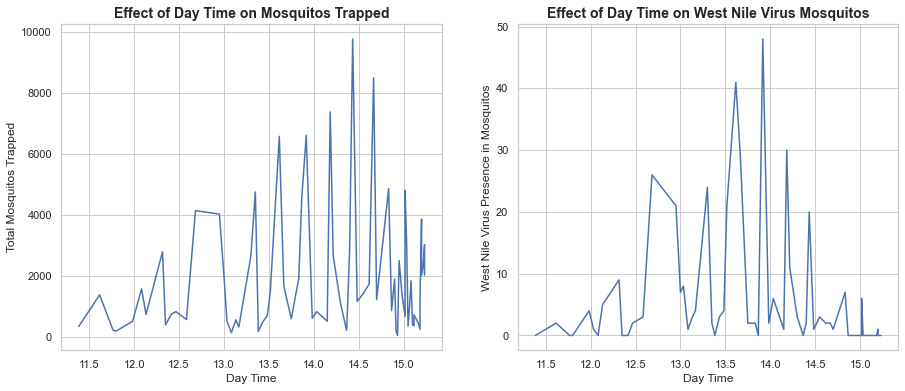

In [162]:
# Plot the effect of day time on mosquitos
title_list = ['Effect of Day Time on Mosquitos Trapped', 'Effect of Day Time on West Nile Virus Mosquitos' ]
subplot_line(day_time, title_list, 'Day Time')

### Temperature Difference

In [163]:
df_merged['Tdiff'] = df_merged['Tmax'] - df_merged['Tmin']
df_merged.head(2)

Date                                            Address  \
0 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   

              AddressNumberAndStreet  Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   

   NumMosquitos  WnvPresent  TotMosquitos  Station  Year  Month  Week  \
0             1           0             1      1.0  2007      5    22   
1             1           0             1      1.0  2007      5    22   

  Year Month  Tmax  Tmin  Tavg  DewPoint  WetBulb  Heat  Cool  Sunrise  \
0    2007 05    88    60  74.0        58     65.0   0.0   9.0    421.0   
1    2007 05    88    60  74.0        58     65.0   0.0   9.0    421.0   

   Sunset  PrecipTotal  StnPressure  SeaLevel  ResultSpeed  ResultDir  \
0  1917.0          0.0        29.39     30.11          5.8         18   
1  1917.0          0.0        29.39     30.11          5.8         18   

   AvgSpeed  CsDZ  CsTS  CsHZ  CsRA  CsVCTS  CsNA  CsFG  CsTSRA  CsBR  \
0       6.5     0     0     1     0       0     0     0       0     1   
1       6.5     0     0     1     0       0     0     0       0     1   

   RelativeHumidity  SunsetHour  SunriseHour  NightTime    DayTime  Tdiff  
0         57.398449   19.283333         4.35   9.066667  14.933333     28  
1         57.398449   19.283333         4.35   9.066667  14.933333     28

In [164]:
# Subset temperature difference data
temp_diff = df_merged[['Tdiff', 'TotMosquitos', 'WnvPresent']].groupby('Tdiff').sum()
temp_diff

TotMosquitos  WnvPresent
Tdiff                          
5                85           0
6                90           0
7               462           0
8               916           0
9              4781          31
10             9896          30
11             2464          27
12             5111          13
13            10779          13
14             5155          13
15             8473          10
16             6667          19
17             6601          16
18             6966          30
19             6105          20
20            14293          47
21             9386          20
22            17165          20
23             7369          28
24             1769           3
25             4683          10
26             1433           7
27             1233           2
28             1300           0
29             1127          11
31              473           0
33              207           0
35               50           0

In [165]:
# Plot the effect of temperature difference on mosquitos
title_list = ['Effect of Temperature Difference on Mosquitos Trapped', 'Effect of Temperature Difference on West Nile Virus Mosquitos']
subplot_line(temp_diff, title_list, 'Temperature Difference')

### West Nile Virus Risk

Based on EDA analysis, location seems to be a good predictor to detect West Nile Virus. We will create a WNV risk feature 
- Low: Less than 2 cases
- Medium: From 2 to 5 cases
- High: More than 5 cases

In [166]:
# Create a pivot table to sum the number of WNV cases detected at each location using the address
wnv_risk = df_train.pivot_table(values=['WnvPresent'], index='AddressNumberAndStreet', aggfunc='sum')
wnv_risk.describe().T

count      mean       std  min  25%  50%  75%   max
WnvPresent  138.0  2.681159  2.874467  0.0  0.0  2.0  4.0  13.0

In [167]:
# Plot histogram to show the spread in number of WNV cases detected
plt.figure(figsize=(10,5))
plt.hist(wnv_risk, bins=20)
plt.title('West Nile Virus (WNV) Distribution Per Location')
plt.xlabel('Number of WNV detected')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

In [168]:
# Create feature to assign risk of WNV for the locations
wnv_risk['WnvRisk'] = pd.cut(wnv_risk["WnvPresent"], bins=[0, 2, 5, 20], right=False, labels=['low', 'medium', 'high'],
                             ordered=True)
wnv_risk

WnvPresent WnvRisk
AddressNumberAndStreet                                              
1000  E 67TH ST, Chicago, IL                               4  medium
1000  N CENTRAL PARK DR, Chicago, IL                       6    high
1000  S CALIFORNIA AVE, Chicago, IL                        0     low
1000  S COTTAGE GROVE, Chicago, IL                         2  medium
1000  S STONY ISLAND AVE, Chicago, IL                      2  medium
...                                                      ...     ...
9100  W HIGGINS RD, Chicago, IL                            5    high
9300  S DR MARTIN LUTHER KING JR DR, Chicago, IL           1     low
9600  S HOYNE AVE, Chicago, IL                             0     low
9600  S LONGWOOD DR, Chicago, IL                           0     low
9800  S AVENUE G, Chicago, IL                              0     low

[138 rows x 2 columns]

In [169]:
# Merge risk data with train data
df_merged = df_merged.merge(wnv_risk[["WnvRisk"]], how="left", on="AddressNumberAndStreet")
df_merged.head()

Date                                            Address  \
0 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2 2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
3 2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
4 2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2          CULEX RESTUANS     62    N MANDELL AVE  T007   
3  CULEX PIPIENS/RESTUANS     79     W FOSTER AVE  T015   
4          CULEX RESTUANS     79     W FOSTER AVE  T015   

              AddressNumberAndStreet   Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
2   6200  N MANDELL AVE, Chicago, IL  41.994991 -87.769279                9   
3    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   
4    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   

   NumMosquitos  WnvPresent  TotMosquitos  Station  Year  Month  Week  \
0             1           0             1      1.0  2007      5    22   
1             1           0             1      1.0  2007      5    22   
2             1           0             1      1.0  2007      5    22   
3             1           0             1      1.0  2007      5    22   
4             4           0             4      1.0  2007      5    22   

  Year Month  Tmax  Tmin  Tavg  DewPoint  WetBulb  Heat  Cool  Sunrise  \
0    2007 05    88    60  74.0        58     65.0   0.0   9.0    421.0   
1    2007 05    88    60  74.0        58     65.0   0.0   9.0    421.0   
2    2007 05    88    60  74.0        58     65.0   0.0   9.0    421.0   
3    2007 05    88    60  74.0        58     65.0   0.0   9.0    421.0   
4    2007 05    88    60  74.0        58     65.0   0.0   9.0    421.0   

   Sunset  PrecipTotal  StnPressure  SeaLevel  ResultSpeed  ResultDir  \
0  1917.0          0.0        29.39     30.11          5.8         18   
1  1917.0          0.0        29.39     30.11          5.8         18   
2  1917.0          0.0        29.39     30.11          5.8         18   
3  1917.0          0.0        29.39     30.11          5.8         18   
4  1917.0          0.0        29.39     30.11          5.8         18   

   AvgSpeed  CsDZ  CsTS  CsHZ  CsRA  CsVCTS  CsNA  CsFG  CsTSRA  CsBR  \
0       6.5     0     0     1     0       0     0     0       0     1   
1       6.5     0     0     1     0       0     0     0       0     1   
2       6.5     0     0     1     0       0     0     0       0     1   
3       6.5     0     0     1     0       0     0     0       0     1   
4       6.5     0     0     1     0       0     0     0       0     1   

   RelativeHumidity  SunsetHour  SunriseHour  NightTime    DayTime  Tdiff  \
0         57.398449   19.283333         4.35   9.066667  14.933333     28   
1         57.398449   19.283333         4.35   9.066667  14.933333     28   
2         57.398449   19.283333         4.35   9.066667  14.933333     28   
3         57.398449   19.283333         4.35   9.066667  14.933333     28   
4         57.398449   19.283333         4.35   9.066667  14.933333     28   

  WnvRisk  
0    high  
1    high  
2     low  
3  medium  
4  medium

### Time Lag

In [170]:
df_merged['Tavg_7daysbf'] = df_merged['Tavg'].shift(periods=7, fill_value=0)
df_merged['DewPoint_7daysbf'] = df_merged['DewPoint'].shift(periods=7, fill_value=0)
df_merged['PrecipTotal_7daysbf'] = df_merged['PrecipTotal'].shift(periods=7, fill_value=0)

In [171]:
df_merged.head()

Date                                            Address  \
0 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2 2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
3 2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
4 2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2          CULEX RESTUANS     62    N MANDELL AVE  T007   
3  CULEX PIPIENS/RESTUANS     79     W FOSTER AVE  T015   
4          CULEX RESTUANS     79     W FOSTER AVE  T015   

              AddressNumberAndStreet   Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
2   6200  N MANDELL AVE, Chicago, IL  41.994991 -87.769279                9   
3    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   
4    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   

   NumMosquitos  WnvPresent  TotMosquitos  Station  Year  Month  Week  \
0             1           0             1      1.0  2007      5    22   
1             1           0             1      1.0  2007      5    22   
2             1           0             1      1.0  2007      5    22   
3             1           0             1      1.0  2007      5    22   
4             4           0             4      1.0  2007      5    22   

  Year Month  Tmax  Tmin  Tavg  DewPoint  WetBulb  Heat  Cool  Sunrise  \
0    2007 05    88    60  74.0        58     65.0   0.0   9.0    421.0   
1    2007 05    88    60  74.0        58     65.0   0.0   9.0    421.0   
2    2007 05    88    60  74.0        58     65.0   0.0   9.0    421.0   
3    2007 05    88    60  74.0        58     65.0   0.0   9.0    421.0   
4    2007 05    88    60  74.0        58     65.0   0.0   9.0    421.0   

   Sunset  PrecipTotal  StnPressure  SeaLevel  ResultSpeed  ResultDir  \
0  1917.0          0.0        29.39     30.11          5.8         18   
1  1917.0          0.0        29.39     30.11          5.8         18   
2  1917.0          0.0        29.39     30.11          5.8         18   
3  1917.0          0.0        29.39     30.11          5.8         18   
4  1917.0          0.0        29.39     30.11          5.8         18   

   AvgSpeed  CsDZ  CsTS  CsHZ  CsRA  CsVCTS  CsNA  CsFG  CsTSRA  CsBR  \
0       6.5     0     0     1     0       0     0     0       0     1   
1       6.5     0     0     1     0       0     0     0       0     1   
2       6.5     0     0     1     0       0     0     0       0     1   
3       6.5     0     0     1     0       0     0     0       0     1   
4       6.5     0     0     1     0       0     0     0       0     1   

   RelativeHumidity  SunsetHour  SunriseHour  NightTime    DayTime  Tdiff  \
0         57.398449   19.283333         4.35   9.066667  14.933333     28   
1         57.398449   19.283333         4.35   9.066667  14.933333     28   
2         57.398449   19.283333         4.35   9.066667  14.933333     28   
3         57.398449   19.283333         4.35   9.066667  14.933333     28   
4         57.398449   19.283333         4.35   9.066667  14.933333     28   

  WnvRisk  Tavg_7daysbf  DewPoint_7daysbf  PrecipTotal_7daysbf  
0    high           0.0                 0                  0.0  
1    high           0.0                 0                  0.0  
2     low           0.0                 0                  0.0  
3  medium           0.0                 0                  0.0  
4  medium           0.0                 0                  0.0

## Preprocessing datasets for modeling

###  Train Dataset

In [172]:
# Create a new dataframe for train dataset for modeling
df_train_model = df_merged.copy()
df_train_model.head()

Date                                            Address  \
0 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2 2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
3 2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
4 2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2          CULEX RESTUANS     62    N MANDELL AVE  T007   
3  CULEX PIPIENS/RESTUANS     79     W FOSTER AVE  T015   
4          CULEX RESTUANS     79     W FOSTER AVE  T015   

              AddressNumberAndStreet   Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
2   6200  N MANDELL AVE, Chicago, IL  41.994991 -87.769279                9   
3    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   
4    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   

   NumMosquitos  WnvPresent  TotMosquitos  Station  Year  Month  Week  \
0             1           0             1      1.0  2007      5    22   
1             1           0             1      1.0  2007      5    22   
2             1           0             1      1.0  2007      5    22   
3             1           0             1      1.0  2007      5    22   
4             4           0             4      1.0  2007      5    22   

  Year Month  Tmax  Tmin  Tavg  DewPoint  WetBulb  Heat  Cool  Sunrise  \
0    2007 05    88    60  74.0        58     65.0   0.0   9.0    421.0   
1    2007 05    88    60  74.0        58     65.0   0.0   9.0    421.0   
2    2007 05    88    60  74.0        58     65.0   0.0   9.0    421.0   
3    2007 05    88    60  74.0        58     65.0   0.0   9.0    421.0   
4    2007 05    88    60  74.0        58     65.0   0.0   9.0    421.0   

   Sunset  PrecipTotal  StnPressure  SeaLevel  ResultSpeed  ResultDir  \
0  1917.0          0.0        29.39     30.11          5.8         18   
1  1917.0          0.0        29.39     30.11          5.8         18   
2  1917.0          0.0        29.39     30.11          5.8         18   
3  1917.0          0.0        29.39     30.11          5.8         18   
4  1917.0          0.0        29.39     30.11          5.8         18   

   AvgSpeed  CsDZ  CsTS  CsHZ  CsRA  CsVCTS  CsNA  CsFG  CsTSRA  CsBR  \
0       6.5     0     0     1     0       0     0     0       0     1   
1       6.5     0     0     1     0       0     0     0       0     1   
2       6.5     0     0     1     0       0     0     0       0     1   
3       6.5     0     0     1     0       0     0     0       0     1   
4       6.5     0     0     1     0       0     0     0       0     1   

   RelativeHumidity  SunsetHour  SunriseHour  NightTime    DayTime  Tdiff  \
0         57.398449   19.283333         4.35   9.066667  14.933333     28   
1         57.398449   19.283333         4.35   9.066667  14.933333     28   
2         57.398449   19.283333         4.35   9.066667  14.933333     28   
3         57.398449   19.283333         4.35   9.066667  14.933333     28   
4         57.398449   19.283333         4.35   9.066667  14.933333     28   

  WnvRisk  Tavg_7daysbf  DewPoint_7daysbf  PrecipTotal_7daysbf  
0    high           0.0                 0                  0.0  
1    high           0.0                 0                  0.0  
2     low           0.0                 0                  0.0  
3  medium           0.0                 0                  0.0  
4  medium           0.0                 0                  0.0

In [173]:
df_train_model.columns

Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent', 'TotMosquitos', 'Station', 'Year',
       'Month', 'Week', 'Year Month', 'Tmax', 'Tmin', 'Tavg', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'PrecipTotal',
       'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed',
       'CsDZ', 'CsTS', 'CsHZ', 'CsRA', 'CsVCTS', 'CsNA', 'CsFG', 'CsTSRA',
       'CsBR', 'RelativeHumidity', 'SunsetHour', 'SunriseHour', 'NightTime',
       'DayTime', 'Tdiff', 'WnvRisk', 'Tavg_7daysbf', 'DewPoint_7daysbf',
       'PrecipTotal_7daysbf'],
      dtype='object')

In [174]:
# List the columns to drop
columns_to_drop = ['Date', 'Address', 'Street', 'Trap', 'AddressNumberAndStreet', 'Block', 
                   'AddressAccuracy', 'NumMosquitos', 'TotMosquitos', 'Year', 'Month', 'Year Month', 'Station', 
                   'Tmax', 'Tmin', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'SunsetHour', 'SunriseHour', 'Tdiff',
                   'CsHZ', 'CsVCTS', 'CsNA', 'CsDZ', 'CsFG']
drop_columns(df_train_model, columns_to_drop)
df_train_model.head(2)

Species  Latitude  Longitude  WnvPresent  Week  Tavg  \
0  CULEX PIPIENS/RESTUANS  41.95469 -87.800991           0    22  74.0   
1          CULEX RESTUANS  41.95469 -87.800991           0    22  74.0   

   DewPoint  WetBulb  PrecipTotal  StnPressure  SeaLevel  ResultSpeed  \
0        58     65.0          0.0        29.39     30.11          5.8   
1        58     65.0          0.0        29.39     30.11          5.8   

   ResultDir  AvgSpeed  CsTS  CsRA  CsTSRA  CsBR  RelativeHumidity  NightTime  \
0         18       6.5     0     0       0     1         57.398449   9.066667   
1         18       6.5     0     0       0     1         57.398449   9.066667   

     DayTime WnvRisk  Tavg_7daysbf  DewPoint_7daysbf  PrecipTotal_7daysbf  
0  14.933333    high           0.0                 0                  0.0  
1  14.933333    high           0.0                 0                  0.0

In [175]:
df_train_model.shape

(8475, 25)

In [176]:
# Dummify the categorical feature Species
df_train_model = pd.get_dummies(df_train_model, columns=['Species', 'WnvRisk'])
df_train_model.shape

(8475, 33)

In [177]:
# List the columns to drop
columns_to_drop = ['Species_CULEX ERRATICUS', 'Species_CULEX SALINARIUS', 'Species_CULEX TARSALIS', 
                   'Species_CULEX TERRITANS']
drop_columns(df_train_model, columns_to_drop)
df_train_model.head(2)

Latitude  Longitude  WnvPresent  Week  Tavg  DewPoint  WetBulb  \
0  41.95469 -87.800991           0    22  74.0        58     65.0   
1  41.95469 -87.800991           0    22  74.0        58     65.0   

   PrecipTotal  StnPressure  SeaLevel  ResultSpeed  ResultDir  AvgSpeed  CsTS  \
0          0.0        29.39     30.11          5.8         18       6.5     0   
1          0.0        29.39     30.11          5.8         18       6.5     0   

   CsRA  CsTSRA  CsBR  RelativeHumidity  NightTime    DayTime  Tavg_7daysbf  \
0     0       0     1         57.398449   9.066667  14.933333           0.0   
1     0       0     1         57.398449   9.066667  14.933333           0.0   

   DewPoint_7daysbf  PrecipTotal_7daysbf  Species_CULEX PIPIENS  \
0                 0                  0.0                      0   
1                 0                  0.0                      0   

   Species_CULEX PIPIENS/RESTUANS  Species_CULEX RESTUANS  WnvRisk_low  \
0                               1                       0            0   
1                               0                       1            0   

   WnvRisk_medium  WnvRisk_high  
0               0             1  
1               0             1

In [178]:
df_train_model.shape

(8475, 29)

In [179]:
df_train_model.head()

Latitude  Longitude  WnvPresent  Week  Tavg  DewPoint  WetBulb  \
0  41.954690 -87.800991           0    22  74.0        58     65.0   
1  41.954690 -87.800991           0    22  74.0        58     65.0   
2  41.994991 -87.769279           0    22  74.0        58     65.0   
3  41.974089 -87.824812           0    22  74.0        58     65.0   
4  41.974089 -87.824812           0    22  74.0        58     65.0   

   PrecipTotal  StnPressure  SeaLevel  ResultSpeed  ResultDir  AvgSpeed  CsTS  \
0          0.0        29.39     30.11          5.8         18       6.5     0   
1          0.0        29.39     30.11          5.8         18       6.5     0   
2          0.0        29.39     30.11          5.8         18       6.5     0   
3          0.0        29.39     30.11          5.8         18       6.5     0   
4          0.0        29.39     30.11          5.8         18       6.5     0   

   CsRA  CsTSRA  CsBR  RelativeHumidity  NightTime    DayTime  Tavg_7daysbf  \
0     0       0     1         57.398449   9.066667  14.933333           0.0   
1     0       0     1         57.398449   9.066667  14.933333           0.0   
2     0       0     1         57.398449   9.066667  14.933333           0.0   
3     0       0     1         57.398449   9.066667  14.933333           0.0   
4     0       0     1         57.398449   9.066667  14.933333           0.0   

   DewPoint_7daysbf  PrecipTotal_7daysbf  Species_CULEX PIPIENS  \
0                 0                  0.0                      0   
1                 0                  0.0                      0   
2                 0                  0.0                      0   
3                 0                  0.0                      0   
4                 0                  0.0                      0   

   Species_CULEX PIPIENS/RESTUANS  Species_CULEX RESTUANS  WnvRisk_low  \
0                               1                       0            0   
1                               0                       1            0   
2                               0                       1            1   
3                               1                       0            0   
4                               0                       1            0   

   WnvRisk_medium  WnvRisk_high  
0               0             1  
1               0             1  
2               0             0  
3               1             0  
4               1             0

### Test Dataset

In [180]:
df_test.head()

Id       Date                                            Address  \
0   1 2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1   2 2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2   3 2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
3   4 2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
4   5 2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2           CULEX PIPIENS     41   N OAK PARK AVE  T002   
3        CULEX SALINARIUS     41   N OAK PARK AVE  T002   
4         CULEX TERRITANS     41   N OAK PARK AVE  T002   

              AddressNumberAndStreet  Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
2  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
3  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
4  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   

   Station  
0      1.0  
1      1.0  
2      1.0  
3      1.0  
4      1.0

In [181]:
# Create year, month, week and year month for test dataset
date_creation(df_test, 'Date')
df_test.head()

Id       Date                                            Address  \
0   1 2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1   2 2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2   3 2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
3   4 2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
4   5 2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2           CULEX PIPIENS     41   N OAK PARK AVE  T002   
3        CULEX SALINARIUS     41   N OAK PARK AVE  T002   
4         CULEX TERRITANS     41   N OAK PARK AVE  T002   

              AddressNumberAndStreet  Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
2  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
3  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
4  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   

   Station  Year  Month  Week Year Month  
0      1.0  2008      6    24    2008 06  
1      1.0  2008      6    24    2008 06  
2      1.0  2008      6    24    2008 06  
3      1.0  2008      6    24    2008 06  
4      1.0  2008      6    24    2008 06

In [182]:
# Merge df_test and df_weather_stn1
df_test_model = pd.merge(df_test, df_weather, on=['Date', 'Station'], how='left')
df_test_model.head(2)

Id       Date                                            Address  \
0   1 2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1   2 2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   

              AddressNumberAndStreet  Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   

   Station  Year  Month  Week Year Month  Tmax  Tmin  Tavg  DewPoint  WetBulb  \
0      1.0  2008      6    24    2008 06    86    61  74.0        56     64.0   
1      1.0  2008      6    24    2008 06    86    61  74.0        56     64.0   

   Heat  Cool  Sunrise  Sunset  PrecipTotal  StnPressure  SeaLevel  \
0   0.0   9.0    416.0  1926.0          0.0        29.28     29.99   
1   0.0   9.0    416.0  1926.0          0.0        29.28     29.99   

   ResultSpeed  ResultDir  AvgSpeed  CsFU  CsDZ  CsFG+  CsTS  CsSQ  CsMIFG  \
0          8.9         18      10.0     0     0      0     0     0       0   
1          8.9         18      10.0     0     0      0     0     0       0   

   CsHZ  CsSN  CsVCFG  CsRA  CsVCTS  CsNA  CsFG  CsBCFG  CsGR  CsTSRA  CsBR  
0     0     0       0     0       0     1     0       0     0       0     0  
1     0     0       0     0       0     1     0       0     0       0     0

In [183]:
df_test_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116293 entries, 0 to 116292
Data columns (total 48 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Id                      116293 non-null  int64         
 1   Date                    116293 non-null  datetime64[ns]
 2   Address                 116293 non-null  object        
 3   Species                 116293 non-null  object        
 4   Block                   116293 non-null  int64         
 5   Street                  116293 non-null  object        
 6   Trap                    116293 non-null  object        
 7   AddressNumberAndStreet  116293 non-null  object        
 8   Latitude                116293 non-null  float64       
 9   Longitude               116293 non-null  float64       
 10  AddressAccuracy         116293 non-null  int64         
 11  Station                 116293 non-null  float64       
 12  Year                    116293

In [184]:
# Create a column for relative humidity
df_test_model['RelativeHumidity'] = 100 * (np.exp((17.625 * ((df_test_model['DewPoint'] - 32)/1.8)) / (243.04 + ((df_test_model['DewPoint'] - 32)/1.8)))/ 
                                      np.exp((17.625 * ((df_test_model['Tavg'] - 32)/1.8)) / (243.04 + ((df_test_model['Tavg'] - 32)/1.8))))
df_test_model.head(2)

Id       Date                                            Address  \
0   1 2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1   2 2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   

              AddressNumberAndStreet  Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   

   Station  Year  Month  Week Year Month  Tmax  Tmin  Tavg  DewPoint  WetBulb  \
0      1.0  2008      6    24    2008 06    86    61  74.0        56     64.0   
1      1.0  2008      6    24    2008 06    86    61  74.0        56     64.0   

   Heat  Cool  Sunrise  Sunset  PrecipTotal  StnPressure  SeaLevel  \
0   0.0   9.0    416.0  1926.0          0.0        29.28     29.99   
1   0.0   9.0    416.0  1926.0          0.0        29.28     29.99   

   ResultSpeed  ResultDir  AvgSpeed  CsFU  CsDZ  CsFG+  CsTS  CsSQ  CsMIFG  \
0          8.9         18      10.0     0     0      0     0     0       0   
1          8.9         18      10.0     0     0      0     0     0       0   

   CsHZ  CsSN  CsVCFG  CsRA  CsVCTS  CsNA  CsFG  CsBCFG  CsGR  CsTSRA  CsBR  \
0     0     0       0     0       0     1     0       0     0       0     0   
1     0     0       0     0       0     1     0       0     0       0     0   

   RelativeHumidity  
0         53.405643  
1         53.405643

In [185]:
df_test_model['SunsetHour'] = df_test_model['Sunset'].apply(lambda x: conv_hour(x))
df_test_model['SunriseHour'] = df_test_model['Sunrise'].apply(lambda x: conv_hour(x))

df_test_model['NightTime'] = 24 - (df_test_model['SunsetHour'] - df_test_model['SunriseHour'])
df_test_model.head(2)

Id       Date                                            Address  \
0   1 2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1   2 2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   

              AddressNumberAndStreet  Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   

   Station  Year  Month  Week Year Month  Tmax  Tmin  Tavg  DewPoint  WetBulb  \
0      1.0  2008      6    24    2008 06    86    61  74.0        56     64.0   
1      1.0  2008      6    24    2008 06    86    61  74.0        56     64.0   

   Heat  Cool  Sunrise  Sunset  PrecipTotal  StnPressure  SeaLevel  \
0   0.0   9.0    416.0  1926.0          0.0        29.28     29.99   
1   0.0   9.0    416.0  1926.0          0.0        29.28     29.99   

   ResultSpeed  ResultDir  AvgSpeed  CsFU  CsDZ  CsFG+  CsTS  CsSQ  CsMIFG  \
0          8.9         18      10.0     0     0      0     0     0       0   
1          8.9         18      10.0     0     0      0     0     0       0   

   CsHZ  CsSN  CsVCFG  CsRA  CsVCTS  CsNA  CsFG  CsBCFG  CsGR  CsTSRA  CsBR  \
0     0     0       0     0       0     1     0       0     0       0     0   
1     0     0       0     0       0     1     0       0     0       0     0   

   RelativeHumidity  SunsetHour  SunriseHour  NightTime  
0         53.405643   19.433333     4.266667   8.833333  
1         53.405643   19.433333     4.266667   8.833333

In [186]:
df_test_model['DayTime'] = df_test_model['SunsetHour'] - df_test_model['SunriseHour']
df_test_model.head(2)

Id       Date                                            Address  \
0   1 2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1   2 2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   

              AddressNumberAndStreet  Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   

   Station  Year  Month  Week Year Month  Tmax  Tmin  Tavg  DewPoint  WetBulb  \
0      1.0  2008      6    24    2008 06    86    61  74.0        56     64.0   
1      1.0  2008      6    24    2008 06    86    61  74.0        56     64.0   

   Heat  Cool  Sunrise  Sunset  PrecipTotal  StnPressure  SeaLevel  \
0   0.0   9.0    416.0  1926.0          0.0        29.28     29.99   
1   0.0   9.0    416.0  1926.0          0.0        29.28     29.99   

   ResultSpeed  ResultDir  AvgSpeed  CsFU  CsDZ  CsFG+  CsTS  CsSQ  CsMIFG  \
0          8.9         18      10.0     0     0      0     0     0       0   
1          8.9         18      10.0     0     0      0     0     0       0   

   CsHZ  CsSN  CsVCFG  CsRA  CsVCTS  CsNA  CsFG  CsBCFG  CsGR  CsTSRA  CsBR  \
0     0     0       0     0       0     1     0       0     0       0     0   
1     0     0       0     0       0     1     0       0     0       0     0   

   RelativeHumidity  SunsetHour  SunriseHour  NightTime    DayTime  
0         53.405643   19.433333     4.266667   8.833333  15.166667  
1         53.405643   19.433333     4.266667   8.833333  15.166667

In [187]:
df_test_model['Tavg_7daysbf'] = df_test_model['Tavg'].shift(periods=7, fill_value=0)
df_test_model['DewPoint_7daysbf'] = df_test_model['DewPoint'].shift(periods=7, fill_value=0)
df_test_model['PrecipTotal_7daysbf'] = df_test_model['PrecipTotal'].shift(periods=7, fill_value=0)

In [188]:
df_test_model.shape

(116293, 56)

In [189]:
# Add WNV risk feature to test dataset
df_test_model = df_test_model.merge(wnv_risk[["WnvRisk"]], how='left', on='AddressNumberAndStreet')
df_test_model.head(10)

Id       Date                                            Address  \
0   1 2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1   2 2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2   3 2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
3   4 2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
4   5 2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
5   6 2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
6   7 2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
7   8 2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
8   9 2008-06-11  6200 North Mandell Avenue, Chicago, IL 60646, USA   
9  10 2008-06-11  6200 North Mandell Avenue, Chicago, IL 60646, USA   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2           CULEX PIPIENS     41   N OAK PARK AVE  T002   
3        CULEX SALINARIUS     41   N OAK PARK AVE  T002   
4         CULEX TERRITANS     41   N OAK PARK AVE  T002   
5          CULEX TARSALIS     41   N OAK PARK AVE  T002   
6       UNSPECIFIED CULEX     41   N OAK PARK AVE  T002   
7         CULEX ERRATICUS     41   N OAK PARK AVE  T002   
8  CULEX PIPIENS/RESTUANS     62    N MANDELL AVE  T007   
9          CULEX RESTUANS     62    N MANDELL AVE  T007   

              AddressNumberAndStreet   Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
2  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
3  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
4  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
5  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
6  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
7  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
8   6200  N MANDELL AVE, Chicago, IL  41.994991 -87.769279                9   
9   6200  N MANDELL AVE, Chicago, IL  41.994991 -87.769279                9   

   Station  Year  Month  Week Year Month  Tmax  Tmin  Tavg  DewPoint  WetBulb  \
0      1.0  2008      6    24    2008 06    86    61  74.0        56     64.0   
1      1.0  2008      6    24    2008 06    86    61  74.0        56     64.0   
2      1.0  2008      6    24    2008 06    86    61  74.0        56     64.0   
3      1.0  2008      6    24    2008 06    86    61  74.0        56     64.0   
4      1.0  2008      6    24    2008 06    86    61  74.0        56     64.0   
5      1.0  2008      6    24    2008 06    86    61  74.0        56     64.0   
6      1.0  2008      6    24    2008 06    86    61  74.0        56     64.0   
7      1.0  2008      6    24    2008 06    86    61  74.0        56     64.0   
8      1.0  2008      6    24    2008 06    86    61  74.0        56     64.0   
9      1.0  2008      6    24    2008 06    86    61  74.0        56     64.0   

   Heat  Cool  Sunrise  Sunset  PrecipTotal  StnPressure  SeaLevel  \
0   0.0   9.0    416.0  1926.0          0.0        29.28     29.99   
1   0.0   9.0    416.0  1926.0          0.0        29.28     29.99   
2   0.0   9.0    416.0  1926.0          0.0        29.28     29.99   
3   0.0   9.0    416.0  1926.0          0.0        29.28     29.99   
4   0.0   9.0    416.0  1926.0          0.0        29.28     29.99   
5   0.0   9.0    416.0  1926.0          0.0        29.28     29.99   
6   0.0   9.0    416.0  1926.0          0.0        29.28     29.99   
7   0.0   9.0    416.0  1926.0          0.0        29.28     29.99   
8   0.0   9.0    416.0  1926.0          0.0        29.28     29.99   
9   0.0   9.0    416.0  1926.0          0.0        29.28     29.99   

   ResultSpeed  ResultDir  AvgSpeed  C

In [190]:
# Dummify the categorical feature Species
df_test_model = pd.get_dummies(df_test_model, columns=['Species', 'WnvRisk'])
df_test_model.shape

(116293, 66)

In [191]:
df_test_model.columns

Index(['Id', 'Date', 'Address', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'Station', 'Year', 'Month', 'Week', 'Year Month', 'Tmax', 'Tmin',
       'Tavg', 'DewPoint', 'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset',
       'PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir',
       'AvgSpeed', 'CsFU', 'CsDZ', 'CsFG+', 'CsTS', 'CsSQ', 'CsMIFG', 'CsHZ',
       'CsSN', 'CsVCFG', 'CsRA', 'CsVCTS', 'CsNA', 'CsFG', 'CsBCFG', 'CsGR',
       'CsTSRA', 'CsBR', 'RelativeHumidity', 'SunsetHour', 'SunriseHour',
       'NightTime', 'DayTime', 'Tavg_7daysbf', 'DewPoint_7daysbf',
       'PrecipTotal_7daysbf', 'Species_CULEX ERRATICUS',
       'Species_CULEX PIPIENS', 'Species_CULEX PIPIENS/RESTUANS',
       'Species_CULEX RESTUANS', 'Species_CULEX SALINARIUS',
       'Species_CULEX TARSALIS', 'Species_CULEX TERRITANS',
       'Species_UNSPECIFIED CULEX', 'WnvRisk_low', 'WnvRisk_medium',
       'WnvRisk_high'],
      

In [192]:
# List the columns to drop
columns_to_drop = ['Date', 'Address', 'Block', 'Street', 'Trap', 'AddressNumberAndStreet', 'Year', 'Month', 'Year Month',
                   'AddressAccuracy', 'Station', 'Tmax', 'Tmin', 'Heat', 'Cool', 'Sunrise', 'Sunset', 
                   'SunsetHour', 'SunriseHour', 'Species_CULEX ERRATICUS', 'Species_CULEX SALINARIUS', 
                   'Species_CULEX TARSALIS', 'Species_CULEX TERRITANS', 'Species_UNSPECIFIED CULEX',
                   'CsHZ', 'CsVCTS', 'CsNA', 'CsDZ', 'CsFG', 'CsVCFG', 'CsSN', 'CsFG+', 'CsBCFG', 'CsMIFG', 'CsGR', 'CsSQ', 'CsFU']
drop_columns(df_test_model, columns_to_drop)
df_test_model.head(2)

Id  Latitude  Longitude  Week  Tavg  DewPoint  WetBulb  PrecipTotal  \
0   1  41.95469 -87.800991    24  74.0        56     64.0          0.0   
1   2  41.95469 -87.800991    24  74.0        56     64.0          0.0   

   StnPressure  SeaLevel  ResultSpeed  ResultDir  AvgSpeed  CsTS  CsRA  \
0        29.28     29.99          8.9         18      10.0     0     0   
1        29.28     29.99          8.9         18      10.0     0     0   

   CsTSRA  CsBR  RelativeHumidity  NightTime    DayTime  Tavg_7daysbf  \
0       0     0         53.405643   8.833333  15.166667           0.0   
1       0     0         53.405643   8.833333  15.166667           0.0   

   DewPoint_7daysbf  PrecipTotal_7daysbf  Species_CULEX PIPIENS  \
0                 0                  0.0                      0   
1                 0                  0.0                      0   

   Species_CULEX PIPIENS/RESTUANS  Species_CULEX RESTUANS  WnvRisk_low  \
0                               1                       0            0   
1                               0                       1            0   

   WnvRisk_medium  WnvRisk_high  
0               0             1  
1               0             1

In [193]:
df_test_model.shape

(116293, 29)

In [194]:
df_test_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116293 entries, 0 to 116292
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Id                              116293 non-null  int64  
 1   Latitude                        116293 non-null  float64
 2   Longitude                       116293 non-null  float64
 3   Week                            116293 non-null  UInt32 
 4   Tavg                            116293 non-null  float64
 5   DewPoint                        116293 non-null  int64  
 6   WetBulb                         116293 non-null  float64
 7   PrecipTotal                     116293 non-null  float64
 8   StnPressure                     116293 non-null  float64
 9   SeaLevel                        116293 non-null  float64
 10  ResultSpeed                     116293 non-null  float64
 11  ResultDir                       116293 non-null  int64  
 12  AvgSpeed        

In [195]:
# Check which columns are different for train and test datasets
print(df_train_model.columns.difference(df_test_model.columns))

Index(['WnvPresent'], dtype='object')


In [196]:
# Export datasets
df_train_model.to_csv('../data/df_train_model.csv', index=False)
df_test_model.to_csv('../data/df_test_model.csv', index=False)

Continued in Notebook 2